In [1]:
import threading
import time
import psutil
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier

# Duration in seconds
duration = 3600
duration_training = 600

# Thread
def validation(stop_event):
    global X_train, y_train, result, x
    while not stop_event.is_set():
        print("VALIDATION ", x)
        x += 1
        data = df.sample(random.randint(1, 100))

        nb_pred = textclassifier.predict(data['text'])

        X_train = X_train.append(data['text'])
        y_train = y_train.append(pd.Series(nb_pred))

        result['accuracy'].append(accuracy_score(data['label'], nb_pred))
        result['f1'].append(f1_score(data['label'], nb_pred, average='weighted'))
        result['precision'].append(precision_score(data['label'], nb_pred, average='weighted'))
        result['recall'].append(recall_score(data['label'], nb_pred, average='weighted'))

        time.sleep(1)


def train(stop_event):
    global y, textclassifier, run_classification
    while not stop_event.is_set():
        print("TRAINING ", y)
        y += 1
        tmp_classifier = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('smote', SMOTE(random_state=12)),
            ('extratrees', ExtraTreesClassifier())
        ])

        # Init First Train
        tmp_classifier.fit(X_train, y_train)
        textclassifier = tmp_classifier
        time.sleep(duration_training)


def record_performance(stop_event):
    global performance, z
    while not stop_event.is_set():
        cpu = psutil.cpu_percent(interval=1)
        memory = psutil.virtual_memory().percent
        print(f"PERFORMANCE : {z}  ---- CPU : {cpu} ---- Memory : {memory}", cpu)
        z += 1
        performance['cpu'].append(cpu)
        performance['memory'].append(memory)

        time.sleep(1)


if __name__ == "__main__":
    x = 1
    y = 1
    z = 1
    df = pd.read_csv(r'F:\Koding_Kopmputasi_berbasis_jaringan\sentiment amalysis dataset\movie.csv')
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=0, train_size=0.8)
    data = df.sample(random.randint(1, 100))
    result = {
        'accuracy': [],
        'f1': [],
        'precision': [],
        'recall': []
    }
    
    performance = {
        'cpu': [],
        'memory': [],
    }

    textclassifier = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('smote', SMOTE(random_state=12)),
        ('extratrees', ExtraTreesClassifier())
    ])

    # Init First Train
    textclassifier.fit(X_train, y_train)

    event_stop = threading.Event()
    run_classification = True
    t1 = threading.Thread(target=validation, args=(event_stop,)).start()
    t2 = threading.Thread(target=record_performance, args=(event_stop,)).start()

    time.sleep(duration_training)
    t3 = threading.Thread(target=train, args=(event_stop,)).start()

    time.sleep(duration)
    event_stop.set()
    print("Done!")

    

VALIDATION  1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1  ---- CPU : 29.3 ---- Memory : 58.2 29.3
VALIDATION  2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2  ---- CPU : 54.7 ---- Memory : 58.7 54.7
VALIDATION  4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 3  ---- CPU : 57.2 ---- Memory : 60.2 57.2
VALIDATION  6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 4  ---- CPU : 27.7 ---- Memory : 62.1 27.7
VALIDATION  8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 5  ---- CPU : 30.3 ---- Memory : 64.7 30.3
VALIDATION  10


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  11


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 6  ---- CPU : 28.1 ---- Memory : 67.3 28.1
VALIDATION  12


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  13


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 7  ---- CPU : 29.3 ---- Memory : 69.9 29.3
VALIDATION  14


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  15


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 8  ---- CPU : 34.4 ---- Memory : 65.2 34.4
VALIDATION  16


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  17


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 9  ---- CPU : 40.5 ---- Memory : 58.1 40.5
VALIDATION  18


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  19
PERFORMANCE : 10  ---- CPU : 53.9 ---- Memory : 58.6 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  20


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 11  ---- CPU : 54.7 ---- Memory : 58.9VALIDATION  21
 54.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  22


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 12  ---- CPU : 27.0 ---- Memory : 60.2 27.0
VALIDATION  23


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  24


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 13  ---- CPU : 28.4 ---- Memory : 62.9 28.4
VALIDATION  25


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  26


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 14  ---- CPU : 29.2 ---- Memory : 65.4 29.2
VALIDATION  27


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  28


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 15  ---- CPU : 29.7 ---- Memory : 68.0 29.7
VALIDATION  29


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  30


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 16  ---- CPU : 45.8 ---- Memory : 70.6 45.8
VALIDATION  31


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  32


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 17  ---- CPU : 32.0 ---- Memory : 66.4 32.0
VALIDATION  33


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  34


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 18  ---- CPU : 65.8 ---- Memory : 58.6 65.8
VALIDATION  35


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  36
PERFORMANCE : 19  ---- CPU : 54.8 ---- Memory : 59.1 54.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  37


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  38
PERFORMANCE : 20  ---- CPU : 29.7 ---- Memory : 58.6 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  39


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 21  ---- CPU : 27.6 ---- Memory : 61.2 27.6
VALIDATION  40


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  41


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 22  ---- CPU : 27.7 ---- Memory : 63.6 27.7
VALIDATION  42


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  43


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 23  ---- CPU : 28.5 ---- Memory : 66.2 28.5
VALIDATION  44


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  45


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 24  ---- CPU : 28.8 ---- Memory : 68.6 28.8
VALIDATION  46


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  47


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 25  ---- CPU : 29.6 ---- Memory : 76.0 29.6
VALIDATION  48


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  49


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 26  ---- CPU : 74.6 ---- Memory : 68.4 74.6
VALIDATION  50


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  51


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 27  ---- CPU : 54.6 ---- Memory : 57.2 54.6
VALIDATION  52


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  53


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 28  ---- CPU : 30.9 ---- Memory : 56.4 30.9
VALIDATION  54


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  55


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 29  ---- CPU : 27.0 ---- Memory : 57.5 27.0
VALIDATION  56


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  57
PERFORMANCE : 30  ---- CPU : 28.1 ---- Memory : 60.5 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  58


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 31  ---- CPU : 30.2 ---- Memory : 63.1 30.2
VALIDATION  59


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  60


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 32  ---- CPU : 27.7 ---- Memory : 65.8 27.7
VALIDATION  61


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  62


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 33  ---- CPU : 27.7 ---- Memory : 68.4 27.7
VALIDATION  63


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  64


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 34  ---- CPU : 61.1 ---- Memory : 71.8 61.1
VALIDATION  65


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  66


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 35  ---- CPU : 60.9 ---- Memory : 56.7 60.9
VALIDATION  67


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  68


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 36  ---- CPU : 26.5 ---- Memory : 56.6 26.5
VALIDATION  69


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  70


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 37  ---- CPU : 27.7 ---- Memory : 56.6 27.7
VALIDATION  71


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  72


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 38  ---- CPU : 42.5 ---- Memory : 59.1 42.5
VALIDATION  73


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  74


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 39  ---- CPU : 28.7 ---- Memory : 61.8 28.7
VALIDATION  75


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  76
PERFORMANCE : 40  ---- CPU : 27.0 ---- Memory : 64.4 27.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  77


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  78
PERFORMANCE : 41  ---- CPU : 36.8 ---- Memory : 66.6 36.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  79


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 42  ---- CPU : 55.4 ---- Memory : 69.7 55.4
VALIDATION  80


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  81


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 43  ---- CPU : 64.6 ---- Memory : 64.8 64.6
VALIDATION  82


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  83


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 44  ---- CPU : 39.5 ---- Memory : 56.8 39.5
VALIDATION  84


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  85


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 45  ---- CPU : 28.1 ---- Memory : 56.8 28.1
VALIDATION  86


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  87


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 46  ---- CPU : 34.2 ---- Memory : 57.3 34.2
VALIDATION  88


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  89


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 47  ---- CPU : 28.5 ---- Memory : 59.8 28.5
VALIDATION  90


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  91


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 48  ---- CPU : 28.5 ---- Memory : 62.4 28.5
VALIDATION  92


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  93


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 49  ---- CPU : 32.3 ---- Memory : 65.1 32.3
VALIDATION  94


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  95
PERFORMANCE : 50  ---- CPU : 56.4 ---- Memory : 68.0 56.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  96


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  97
PERFORMANCE : 51  ---- CPU : 55.6 ---- Memory : 72.0 55.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  98


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 52  ---- CPU : 37.0 ---- Memory : 67.9 37.0
VALIDATION  99


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  100


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 53  ---- CPU : 29.3 ---- Memory : 56.9 29.3
VALIDATION  101


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  102


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 54  ---- CPU : 26.2 ---- Memory : 56.7 26.2
VALIDATION  103


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  104


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 55  ---- CPU : 29.2 ---- Memory : 57.8 29.2
VALIDATION  105


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  106


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 56  ---- CPU : 27.6 ---- Memory : 60.2 27.6
VALIDATION  107


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  108


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 57  ---- CPU : 33.1 ---- Memory : 63.0 33.1
VALIDATION  109


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  110


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 58  ---- CPU : 58.1 ---- Memory : 65.8 58.1
VALIDATION  111


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  112


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 59  ---- CPU : 56.2 ---- Memory : 68.9 56.2
VALIDATION  113


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  114
PERFORMANCE : 60  ---- CPU : 32.2 ---- Memory : 64.2 32.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  115


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  116
PERFORMANCE : 61  ---- CPU : 31.1 ---- Memory : 72.6 31.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  117


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 62  ---- CPU : 46.3 ---- Memory : 56.1 46.3
VALIDATION  118


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  119


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 63  ---- CPU : 28.6 ---- Memory : 56.1 28.6
VALIDATION  120


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  121


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 64  ---- CPU : 27.3 ---- Memory : 57.7 27.3
VALIDATION  122


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  123


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 65  ---- CPU : 38.3 ---- Memory : 60.5 38.3
VALIDATION  124


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  125


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 66  ---- CPU : 56.6 ---- Memory : 63.5 56.6
VALIDATION  126


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  127


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 67  ---- CPU : 53.5 ---- Memory : 65.8 53.5
VALIDATION  128


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  129


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 68  ---- CPU : 28.9 ---- Memory : 67.8 28.9
VALIDATION  130


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  131


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 69  ---- CPU : 33.2 ---- Memory : 63.1 33.2
VALIDATION  132


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  133


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 70  ---- CPU : 40.1 ---- Memory : 56.3 40.1
VALIDATION  134


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  135
PERFORMANCE : 71  ---- CPU : 28.8 ---- Memory : 56.0 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  136


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  137
PERFORMANCE : 72  ---- CPU : 28.5 ---- Memory : 56.0 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  138


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 73  ---- CPU : 38.4 ---- Memory : 58.7 38.4
VALIDATION  139


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  140


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 74  ---- CPU : 58.0 ---- Memory : 61.7 58.0
VALIDATION  141


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  142


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 75  ---- CPU : 53.5 ---- Memory : 63.7 53.5
VALIDATION  143


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  144


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 76  ---- CPU : 28.1 ---- Memory : 66.2 28.1
VALIDATION  145


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  146


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 77  ---- CPU : 30.0 ---- Memory : 68.4 30.0
VALIDATION  147


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  148


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 78  ---- CPU : 37.9 ---- Memory : 64.8 37.9
VALIDATION  149


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  150


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 79  ---- CPU : 41.2 ---- Memory : 56.1 41.2
VALIDATION  151


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  152


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 80  ---- CPU : 28.1 ---- Memory : 56.1 28.1
VALIDATION  153


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  154
PERFORMANCE : 81  ---- CPU : 43.1 ---- Memory : 57.0 43.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  155


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 82  ---- CPU : 55.7 ---- Memory : 60.0 55.7
VALIDATION  156


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  157


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 83  ---- CPU : 54.7 ---- Memory : 62.0 54.7
VALIDATION  158


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  159


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 84  ---- CPU : 30.0 ---- Memory : 64.4 30.0
VALIDATION  160


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  161


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 85  ---- CPU : 32.6 ---- Memory : 67.0 32.6
VALIDATION  162


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  163


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 86  ---- CPU : 31.4 ---- Memory : 74.7 31.4
VALIDATION  164


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  165


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 87  ---- CPU : 37.7 ---- Memory : 70.1 37.7
VALIDATION  166


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  167


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 88  ---- CPU : 30.9 ---- Memory : 56.0 30.9
VALIDATION  168


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  169


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 89  ---- CPU : 50.8 ---- Memory : 56.7 50.8
VALIDATION  170


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  171


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 90  ---- CPU : 58.5 ---- Memory : 58.7 58.5
VALIDATION  172


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  173
PERFORMANCE : 91  ---- CPU : 48.0 ---- Memory : 60.6 48.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  174


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  175
PERFORMANCE : 92  ---- CPU : 29.7 ---- Memory : 63.1 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  176


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 93  ---- CPU : 29.4 ---- Memory : 65.7 29.4
VALIDATION  177


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  178


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 94  ---- CPU : 29.6 ---- Memory : 68.3 29.6
VALIDATION  179


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  180


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 95  ---- CPU : 32.4 ---- Memory : 63.6 32.4
VALIDATION  181


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  182


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 96  ---- CPU : 41.8 ---- Memory : 56.9 41.8
VALIDATION  183


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  184


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 97  ---- CPU : 51.2 ---- Memory : 56.7 51.2
VALIDATION  185


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  186


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 98  ---- CPU : 54.9 ---- Memory : 57.2 54.9
VALIDATION  187


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  188


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 99  ---- CPU : 45.9 ---- Memory : 59.2 45.9
VALIDATION  189


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  190


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 100  ---- CPU : 29.1 ---- Memory : 61.6 29.1
VALIDATION  191


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  192
PERFORMANCE : 101  ---- CPU : 28.4 ---- Memory : 64.2 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  193


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  194
PERFORMANCE : 102  ---- CPU : 28.8 ---- Memory : 66.8 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  195


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 103  ---- CPU : 28.9 ---- Memory : 70.8 28.9
VALIDATION  196


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  197


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 104  ---- CPU : 42.1 ---- Memory : 67.3 42.1
VALIDATION  198


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  199


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 105  ---- CPU : 48.6 ---- Memory : 56.7 48.6
VALIDATION  200


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  201


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 106  ---- CPU : 55.7 ---- Memory : 57.2 55.7
VALIDATION  202


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  203


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 107  ---- CPU : 37.9 ---- Memory : 57.5 37.9
VALIDATION  204


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  205


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 108  ---- CPU : 31.2 ---- Memory : 60.0 31.2
VALIDATION  206


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  207


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 109  ---- CPU : 31.1 ---- Memory : 62.6 31.1
VALIDATION  208


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  209


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 110  ---- CPU : 30.7 ---- Memory : 65.1 30.7
VALIDATION  210


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  211


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 111  ---- CPU : 30.6 ---- Memory : 67.6 30.6
VALIDATION  212


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  213
PERFORMANCE : 112  ---- CPU : 31.5 ---- Memory : 63.8 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  214


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  215
PERFORMANCE : 113  ---- CPU : 60.3 ---- Memory : 72.3 60.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  216


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 114  ---- CPU : 54.2 ---- Memory : 57.2 54.2
VALIDATION  217


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  218


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 115  ---- CPU : 32.4 ---- Memory : 56.7 32.4
VALIDATION  219


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  220


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 116  ---- CPU : 36.7 ---- Memory : 57.8 36.7
VALIDATION  221


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  222


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 117  ---- CPU : 58.4 ---- Memory : 56.0 58.4
VALIDATION  223


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  224


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 118  ---- CPU : 30.4 ---- Memory : 58.5 30.4
VALIDATION  225


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  226


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 119  ---- CPU : 36.8 ---- Memory : 61.4 36.8
VALIDATION  227


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  228


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 120  ---- CPU : 30.7 ---- Memory : 63.9 30.7
VALIDATION  229


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  230


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 121  ---- CPU : 62.8 ---- Memory : 59.5 62.8
VALIDATION  231


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  232
PERFORMANCE : 122  ---- CPU : 61.9 ---- Memory : 52.4 61.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  233


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  234
PERFORMANCE : 123  ---- CPU : 36.2 ---- Memory : 52.2 36.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  235


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 124  ---- CPU : 29.8 ---- Memory : 52.2 29.8
VALIDATION  236


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  237


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 125  ---- CPU : 28.1 ---- Memory : 54.2 28.1
VALIDATION  238


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  239


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 126  ---- CPU : 28.4 ---- Memory : 56.8 28.4
VALIDATION  240


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  241


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 127  ---- CPU : 29.3 ---- Memory : 59.3 29.3
VALIDATION  242


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  243


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 128  ---- CPU : 29.6 ---- Memory : 61.9 29.6
VALIDATION  244


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  245


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 129  ---- CPU : 58.1 ---- Memory : 64.8 58.1
VALIDATION  246


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  247


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 130  ---- CPU : 63.3 ---- Memory : 60.2 63.3
VALIDATION  248


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  249
PERFORMANCE : 131  ---- CPU : 51.2 ---- Memory : 52.1 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  250


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  251
PERFORMANCE : 132  ---- CPU : 31.4 ---- Memory : 52.1 31.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  252


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 133  ---- CPU : 29.7 ---- Memory : 52.4VALIDATION  253
 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  254


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 134  ---- CPU : 29.6 ---- Memory : 55.0 29.6
VALIDATION  255


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  256


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 135  ---- CPU : 30.0 ---- Memory : 57.6 30.0
VALIDATION  257


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  258


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 136  ---- CPU : 28.4 ---- Memory : 60.3 28.4
VALIDATION  259


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  260


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 137  ---- CPU : 59.7 ---- Memory : 63.1 59.7
VALIDATION  261


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  262


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 138  ---- CPU : 55.9 ---- Memory : 70.2 55.9
VALIDATION  263


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  264


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 139  ---- CPU : 44.0 ---- Memory : 64.0 44.0
VALIDATION  265


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  266


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 140  ---- CPU : 26.5 ---- Memory : 52.2 26.5
VALIDATION  267


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  268


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 141  ---- CPU : 30.0 ---- Memory : 52.1 30.0
VALIDATION  269


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  270


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 142  ---- CPU : 31.8 ---- Memory : 53.3 31.8
VALIDATION  271


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  272
PERFORMANCE : 143  ---- CPU : 31.8 ---- Memory : 55.8 31.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  273


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 144  ---- CPU : 28.4 ---- Memory : 58.4 28.4
VALIDATION  274


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  275


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 145  ---- CPU : 57.3 ---- Memory : 61.3 57.3
VALIDATION  276


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  277


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 146  ---- CPU : 56.3 ---- Memory : 64.3 56.3
VALIDATION  278


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  279


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 147  ---- CPU : 41.0 ---- Memory : 62.3 41.0
VALIDATION  280


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  281


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 148  ---- CPU : 30.3 ---- Memory : 54.5 30.3
VALIDATION  282


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  283


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 149  ---- CPU : 29.6 ---- Memory : 52.2 29.6
VALIDATION  284


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  285


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 150  ---- CPU : 30.8 ---- Memory : 52.1 30.8
VALIDATION  286


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  287


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 151  ---- CPU : 29.3 ---- Memory : 53.9 29.3
VALIDATION  288


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  289


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 152  ---- CPU : 30.3 ---- Memory : 56.5 30.3
VALIDATION  290


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  291
PERFORMANCE : 153  ---- CPU : 58.1 ---- Memory : 59.4 58.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  292


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  293
PERFORMANCE : 154  ---- CPU : 54.5 ---- Memory : 62.3 54.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  294


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 155  ---- CPU : 29.0 ---- Memory : 64.2 29.0
 295


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  296


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 156  ---- CPU : 39.4 ---- Memory : 59.3 39.4
VALIDATION  297


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  298


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 157  ---- CPU : 46.1 ---- Memory : 52.5 46.1
VALIDATION  299


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  300


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 158  ---- CPU : 28.4 ---- Memory : 52.1 28.4
VALIDATION  301


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  302


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 159  ---- CPU : 29.2 ---- Memory : 52.1 29.2
VALIDATION  303


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  304


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 160  ---- CPU : 30.4 ---- Memory : 54.7 30.4
VALIDATION  305


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  306


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 161  ---- CPU : 53.9 ---- Memory : 57.5 53.9
VALIDATION  307


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  308


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 162  ---- CPU : 54.8 ---- Memory : 60.5 54.8
VALIDATION  309


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  310


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 163  ---- CPU : 31.0 ---- Memory : 62.3 31.0
VALIDATION  311


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  312
PERFORMANCE : 164  ---- CPU : 29.7 ---- Memory : 65.5 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  313


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  314
PERFORMANCE : 165  ---- CPU : 38.1 ---- Memory : 62.4 38.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  315


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 166  ---- CPU : 30.9 ---- Memory : 52.1 30.9
VALIDATION  316


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  317


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 167  ---- CPU : 36.6 ---- Memory : 52.1 36.6
VALIDATION  318


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  319


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 168  ---- CPU : 29.3 ---- Memory : 53.0 29.3
VALIDATION  320


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  321


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 169  ---- CPU : 57.9 ---- Memory : 56.0 57.9
VALIDATION  322


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  323


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 170  ---- CPU : 55.6 ---- Memory : 58.8 55.6
VALIDATION  324


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  325


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 171  ---- CPU : 27.7 ---- Memory : 60.7 27.7
VALIDATION  326


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  327


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 172  ---- CPU : 29.2 ---- Memory : 63.3 29.2
VALIDATION  328


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  329


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 173  ---- CPU : 34.6 ---- Memory : 59.6 34.6
VALIDATION  330


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  331
PERFORMANCE : 174  ---- CPU : 28.7 ---- Memory : 67.4 28.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  332


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  333
PERFORMANCE : 175  ---- CPU : 35.4 ---- Memory : 52.1 35.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  334


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 176  ---- CPU : 29.6 ---- Memory : 52.1 29.6
VALIDATION  335


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  336


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 177  ---- CPU : 55.1 ---- Memory : 54.3 55.1
VALIDATION  337


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  338


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 178  ---- CPU : 54.6 ---- Memory : 57.2 54.6
VALIDATION  339


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  340


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 179  ---- CPU : 29.7 ---- Memory : 59.4 29.7
VALIDATION  341


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  342


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 180  ---- CPU : 29.2 ---- Memory : 62.1 29.2
VALIDATION  343


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  344


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 181  ---- CPU : 29.5 ---- Memory : 64.4 29.5
VALIDATION  345


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  346


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 182  ---- CPU : 35.8 ---- Memory : 59.2 35.8
VALIDATION  347


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  348


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 183  ---- CPU : 37.9 ---- Memory : 52.1 37.9
VALIDATION  349


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  350


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 184  ---- CPU : 28.5 ---- Memory : 52.1 28.5
VALIDATION  351


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  352
PERFORMANCE : 185  ---- CPU : 55.9 ---- Memory : 52.7 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  353


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  354
PERFORMANCE : 186  ---- CPU : 52.7 ---- Memory : 55.6 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  355


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 187  ---- CPU : 30.2 ---- Memory : 57.5 30.2
VALIDATION  356


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  357


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 188  ---- CPU : 30.4 ---- Memory : 60.0 30.4
VALIDATION  358


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  359


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 189  ---- CPU : 28.9 ---- Memory : 62.6 28.9
VALIDATION  360


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  361


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 190  ---- CPU : 28.5 ---- Memory : 66.4 28.5
VALIDATION  362


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  363


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 191  ---- CPU : 38.7 ---- Memory : 62.9 38.7
VALIDATION  364


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  365


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 192  ---- CPU : 28.0 ---- Memory : 52.0 28.0
VALIDATION  366


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  367


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 193  ---- CPU : 57.4 ---- Memory : 52.6 57.4
VALIDATION  368


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  369


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 194  ---- CPU : 55.1 ---- Memory : 53.8 55.1
VALIDATION  370


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  371


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 195  ---- CPU : 29.6 ---- Memory : 55.6 29.6
VALIDATION  372


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  373
PERFORMANCE : 196  ---- CPU : 27.3 ---- Memory : 58.2 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  374


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 197  ---- CPU : 41.9 ---- Memory : 60.8 41.9
 375


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  376


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 198  ---- CPU : 30.0 ---- Memory : 63.3 30.0
VALIDATION  377


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  378


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 199  ---- CPU : 36.3 ---- Memory : 60.3 36.3
VALIDATION  379


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  380


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 200  ---- CPU : 37.1 ---- Memory : 67.5 37.1
VALIDATION  381


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  382


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 201  ---- CPU : 56.2 ---- Memory : 52.6 56.2
VALIDATION  383


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  384


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 202  ---- CPU : 58.2 ---- Memory : 52.7 58.2
VALIDATION  385


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  386


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 203  ---- CPU : 29.1 ---- Memory : 53.9 29.1
VALIDATION  387


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  388


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 204  ---- CPU : 28.7 ---- Memory : 56.4 28.7
VALIDATION  389


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  390


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 205  ---- CPU : 30.1 ---- Memory : 59.0 30.1
VALIDATION  391


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  392
PERFORMANCE : 206  ---- CPU : 30.0 ---- Memory : 61.5 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  393


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  394
PERFORMANCE : 207  ---- CPU : 26.8 ---- Memory : 64.0 26.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  395


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 208  ---- CPU : 35.0 ---- Memory : 59.2 35.0
VALIDATION  396


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  397


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 209  ---- CPU : 67.2 ---- Memory : 52.9 67.2
VALIDATION  398


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  399


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 210  ---- CPU : 54.2 ---- Memory : 53.1 54.2
VALIDATION  400


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  401


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 211  ---- CPU : 29.3 ---- Memory : 52.6 29.3
VALIDATION  402


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  403


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 212  ---- CPU : 31.0 ---- Memory : 54.9 31.0
VALIDATION  404


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  405


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 213  ---- CPU : 30.3 ---- Memory : 57.3 30.3
VALIDATION  406


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  407


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 214  ---- CPU : 30.5 ---- Memory : 60.0 30.5
VALIDATION  408


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  409


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 215  ---- CPU : 28.8 ---- Memory : 62.5 28.8
VALIDATION  410


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  411
PERFORMANCE : 216  ---- CPU : 30.1 ---- Memory : 65.7 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  412


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  413
PERFORMANCE : 217  ---- CPU : 57.9 ---- Memory : 62.4 57.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  414


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  415
PERFORMANCE : 218  ---- CPU : 62.6 ---- Memory : 52.8 62.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  416


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 219  ---- CPU : 27.6 ---- Memory : 52.3 27.6
VALIDATION  417


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  418


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 220  ---- CPU : 29.6 ---- Memory : 53.1 29.6
VALIDATION  419


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  420


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 221  ---- CPU : 29.2 ---- Memory : 55.7 29.2
VALIDATION  421


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  422


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 222  ---- CPU : 29.8 ---- Memory : 58.2 29.8
VALIDATION  423


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  424


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 223  ---- CPU : 30.7 ---- Memory : 60.8 30.7
VALIDATION  425


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  426


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 224  ---- CPU : 32.7 ---- Memory : 63.5 32.7
VALIDATION  427


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  428


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 225  ---- CPU : 57.1 ---- Memory : 70.3 57.1
VALIDATION  429


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  430


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 226  ---- CPU : 55.5 ---- Memory : 66.9 55.5
VALIDATION  431


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  432
PERFORMANCE : 227  ---- CPU : 41.4 ---- Memory : 52.3 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  433


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  434
PERFORMANCE : 228  ---- CPU : 29.1 ---- Memory : 52.3 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  435


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 229  ---- CPU : 26.6 ---- Memory : 53.9 26.6
VALIDATION  436


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  437


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 230  ---- CPU : 29.7 ---- Memory : 56.6 29.7
VALIDATION  438


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  439


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 231  ---- CPU : 31.2 ---- Memory : 59.2 31.2
VALIDATION  440


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  441


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 232  ---- CPU : 35.9 ---- Memory : 61.9 35.9
VALIDATION  442


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  443


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 233  ---- CPU : 58.8 ---- Memory : 64.9 58.8
VALIDATION  444


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  445


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 234  ---- CPU : 65.6 ---- Memory : 59.9 65.6
VALIDATION  446


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  447


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 235  ---- CPU : 39.5 ---- Memory : 52.3 39.5
VALIDATION  448


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  449


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 236  ---- CPU : 27.3 ---- Memory : 52.3 27.3
VALIDATION  450


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  451


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 237  ---- CPU : 28.5 ---- Memory : 52.3 28.5
VALIDATION  452


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  453
PERFORMANCE : 238  ---- CPU : 34.9 ---- Memory : 55.3 34.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  454


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  455
PERFORMANCE : 239  ---- CPU : 28.4 ---- Memory : 57.8 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  456


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 240  ---- CPU : 34.4 ---- Memory : 60.5 34.4
VALIDATION  457


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  458


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 241  ---- CPU : 56.7 ---- Memory : 63.6 56.7
VALIDATION  459


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  460


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 242  ---- CPU : 57.4 ---- Memory : 66.7 57.4
VALIDATION  461


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  462


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 243  ---- CPU : 35.8 ---- Memory : 63.1 35.8
VALIDATION  463


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  464


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 244  ---- CPU : 32.0 ---- Memory : 52.7 32.0
VALIDATION  465


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  466


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 245  ---- CPU : 29.7 ---- Memory : 52.5 29.7
VALIDATION  467


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  468


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 246  ---- CPU : 28.4 ---- Memory : 53.4 28.4
VALIDATION  469


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  470


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 247  ---- CPU : 28.9 ---- Memory : 55.8 28.9
VALIDATION  471


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  472
PERFORMANCE : 248  ---- CPU : 41.2 ---- Memory : 58.5 41.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  473


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  474
PERFORMANCE : 249  ---- CPU : 55.2 ---- Memory : 61.3 55.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  475


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 250  ---- CPU : 55.0 ---- Memory : 63.7 55.0
VALIDATION  476


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  477


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 251  ---- CPU : 31.2 ---- Memory : 70.8 31.2
VALIDATION  478


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  479


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 252  ---- CPU : 36.6 ---- Memory : 66.0 36.6
VALIDATION  480


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  481


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 253  ---- CPU : 27.7 ---- Memory : 52.3 27.7
VALIDATION  482


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  483


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 254  ---- CPU : 29.6 ---- Memory : 53.8 29.6
VALIDATION  484


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  485


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 255  ---- CPU : 27.7 ---- Memory : 56.4 27.7
VALIDATION  486


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  487


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 256  ---- CPU : 42.1 ---- Memory : 58.1 42.1
VALIDATION  488


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  489


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 257  ---- CPU : 74.3 ---- Memory : 53.5 74.3
VALIDATION  490


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  491


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 258  ---- CPU : 50.4 ---- Memory : 53.3 50.4
VALIDATION  492


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  493


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 259  ---- CPU : 28.1 ---- Memory : 53.3 28.1
VALIDATION  494


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  495
PERFORMANCE : 260  ---- CPU : 28.9 ---- Memory : 51.3 28.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  496


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  497
PERFORMANCE : 261  ---- CPU : 32.1 ---- Memory : 53.3 32.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  498


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 262  ---- CPU : 28.4 ---- Memory : 53.4 28.4
VALIDATION  499


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  500


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 263  ---- CPU : 31.9 ---- Memory : 52.2 31.9
VALIDATION  501


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  502


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 264  ---- CPU : 52.1 ---- Memory : 53.5 52.1
VALIDATION  503


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  504


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 265  ---- CPU : 56.5 ---- Memory : 54.0 56.5
VALIDATION  505


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  506


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 266  ---- CPU : 38.1 ---- Memory : 51.6 38.1
VALIDATION  507


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  508


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 267  ---- CPU : 28.9 ---- Memory : 53.4 28.9
VALIDATION  509


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  510


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 268  ---- CPU : 32.4 ---- Memory : 53.7 32.4
VALIDATION  511


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  512
PERFORMANCE : 269  ---- CPU : 30.6 ---- Memory : 52.6 30.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  513


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  514
PERFORMANCE : 270  ---- CPU : 29.7 ---- Memory : 53.7 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  515


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  516
PERFORMANCE : 271  ---- CPU : 28.5 ---- Memory : 53.6 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  517


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 272  ---- CPU : 49.2 ---- Memory : 54.4 49.2
VALIDATION  518


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  519


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 273  ---- CPU : 54.3 ---- Memory : 54.3 54.3
VALIDATION  520


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  521


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 274  ---- CPU : 34.6 ---- Memory : 53.6 34.6
VALIDATION  522


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  523


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 275  ---- CPU : 33.3 ---- Memory : 53.8 33.3
VALIDATION  524


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  525


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 276  ---- CPU : 30.0 ---- Memory : 53.6 30.0
VALIDATION  526


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  527


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 277  ---- CPU : 27.7 ---- Memory : 53.4 27.7
VALIDATION  528


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  529


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 278  ---- CPU : 30.1 ---- Memory : 54.8 30.1
VALIDATION  530


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  531


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 279  ---- CPU : 29.6 ---- Memory : 53.3 29.6
VALIDATION  532


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  533


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 280  ---- CPU : 46.7 ---- Memory : 53.6 46.7
VALIDATION  534


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  535
PERFORMANCE : 281  ---- CPU : 53.9 ---- Memory : 55.4 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  536


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  537
PERFORMANCE : 282  ---- CPU : 33.2 ---- Memory : 53.4 33.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  538


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 283  ---- CPU : 28.4 ---- Memory : 53.3 28.4
VALIDATION  539


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  540


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 284  ---- CPU : 27.3 ---- Memory : 55.2 27.3
VALIDATION  541


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  542


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 285  ---- CPU : 27.7 ---- Memory : 53.4 27.7
VALIDATION  543


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  544


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 286  ---- CPU : 28.4 ---- Memory : 53.4 28.4
VALIDATION  545


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  546


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 287  ---- CPU : 41.2 ---- Memory : 53.5 41.2
VALIDATION  547


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  548


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 288  ---- CPU : 49.4 ---- Memory : 53.7 49.4
VALIDATION  549


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  550


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 289  ---- CPU : 54.8 ---- Memory : 54.0 54.8
VALIDATION  551


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  552


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 290  ---- CPU : 32.7 ---- Memory : 53.4 32.7
VALIDATION  553


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  554


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 291  ---- CPU : 29.4 ---- Memory : 53.4 29.4
VALIDATION  555


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  556
PERFORMANCE : 292  ---- CPU : 29.3 ---- Memory : 53.3 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  557


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  558
PERFORMANCE : 293  ---- CPU : 32.3 ---- Memory : 53.4 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  559


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 294  ---- CPU : 29.6 ---- Memory : 53.4 29.6
VALIDATION  560


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  561


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 295  ---- CPU : 29.2 ---- Memory : 53.8 29.2
VALIDATION  562


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  563


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 296  ---- CPU : 50.4 ---- Memory : 53.6 50.4
VALIDATION  564


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  565


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 297  ---- CPU : 52.9 ---- Memory : 54.0 52.9
VALIDATION  566


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  567


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 298  ---- CPU : 37.7 ---- Memory : 52.7 37.7
VALIDATION  568


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  569
TRAINING  1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 299  ---- CPU : 43.1 ---- Memory : 53.8 43.1
VALIDATION  570
PERFORMANCE : 300  ---- CPU : 51.8 ---- Memory : 54.0 51.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 301  ---- CPU : 53.8 ---- Memory : 54.8 53.8
VALIDATION  571
PERFORMANCE : 302  ---- CPU : 53.1 ---- Memory : 54.4 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  572
PERFORMANCE : 303  ---- CPU : 54.2 ---- Memory : 54.6 54.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 304  ---- CPU : 79.5 ---- Memory : 56.2 79.5
VALIDATION  573


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  574


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 305  ---- CPU : 80.4 ---- Memory : 57.5 80.4
VALIDATION  575


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  576


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 306  ---- CPU : 56.1 ---- Memory : 56.9 56.1
VALIDATION  577


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  578


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 307  ---- CPU : 55.6 ---- Memory : 59.5 55.6
VALIDATION  579


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  580


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 308  ---- CPU : 56.6 ---- Memory : 62.3 56.6
VALIDATION  581


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  582


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 309  ---- CPU : 54.1 ---- Memory : 64.9 54.1
VALIDATION  583


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  584


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 310  ---- CPU : 53.5 ---- Memory : 67.8 53.5
VALIDATION  585


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  586


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 311  ---- CPU : 64.8 ---- Memory : 69.7 64.8
VALIDATION  587


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 312  ---- CPU : 88.4 ---- Memory : 56.5 88.4
 588


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  589


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 313  ---- CPU : 81.0 ---- Memory : 57.2 81.0
VALIDATION  590


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  591


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 314  ---- CPU : 57.3 ---- Memory : 57.1 57.3
VALIDATION  592


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  593


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 315  ---- CPU : 56.3 ---- Memory : 60.3 56.3
VALIDATION  594


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  595


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 316  ---- CPU : 54.7 ---- Memory : 63.1 54.7
VALIDATION  596


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  597


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 317  ---- CPU : 64.5 ---- Memory : 65.9 64.5
VALIDATION  598


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  599


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 318  ---- CPU : 55.7 ---- Memory : 69.6 55.7
VALIDATION  600


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  601


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 319  ---- CPU : 68.5 ---- Memory : 64.5 68.5
VALIDATION  602


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  603
PERFORMANCE : 320  ---- CPU : 92.6 ---- Memory : 57.0 92.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  604


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  605
PERFORMANCE : 321  ---- CPU : 80.8 ---- Memory : 57.3 80.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  606


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 322  ---- CPU : 53.3 ---- Memory : 59.7 53.3
VALIDATION  607


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  608


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 323  ---- CPU : 54.3 ---- Memory : 60.9 54.3
VALIDATION  609


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  610


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 324  ---- CPU : 54.2 ---- Memory : 63.7 54.2
VALIDATION  611


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  612


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 325  ---- CPU : 56.3 ---- Memory : 66.3 56.3
VALIDATION  613


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  614


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 326  ---- CPU : 56.6 ---- Memory : 68.7 56.6
VALIDATION  615


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  616


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 327  ---- CPU : 73.2 ---- Memory : 65.3 73.2
VALIDATION  617


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  618


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 328  ---- CPU : 91.1 ---- Memory : 57.2 91.1
VALIDATION  619


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  620


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 329  ---- CPU : 81.5 ---- Memory : 57.4 81.5
VALIDATION  621


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  622


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 330  ---- CPU : 55.6 ---- Memory : 58.8 55.6
VALIDATION  623


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  624
PERFORMANCE : 331  ---- CPU : 53.3 ---- Memory : 61.6 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  625


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 332  ---- CPU : 52.1 ---- Memory : 64.4VALIDATION  626
 52.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  627


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 333  ---- CPU : 56.8 ---- Memory : 70.0 56.8
VALIDATION  628


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  629


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 334  ---- CPU : 54.4 ---- Memory : 73.9 54.4
VALIDATION  630


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  631


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 335  ---- CPU : 73.4 ---- Memory : 69.2 73.4
VALIDATION  632


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  633


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 336  ---- CPU : 87.5 ---- Memory : 57.3 87.5
VALIDATION  634


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  635


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 337  ---- CPU : 82.5 ---- Memory : 56.8 82.5
VALIDATION  636


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  637


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 338  ---- CPU : 54.2 ---- Memory : 59.5 54.2
VALIDATION  638


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  639


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 339  ---- CPU : 54.3 ---- Memory : 62.4 54.3
VALIDATION  640


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  641
PERFORMANCE : 340  ---- CPU : 53.7 ---- Memory : 67.0 53.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  642


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  643
PERFORMANCE : 341  ---- CPU : 52.7 ---- Memory : 67.7 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  644


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 342  ---- CPU : 63.3 ---- Memory : 65.7 63.3
VALIDATION  645


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  646


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 343  ---- CPU : 72.5 ---- Memory : 64.7VALIDATION  647
 72.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  648


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 344  ---- CPU : 83.3 ---- Memory : 57.1 83.3
VALIDATION  649


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  650


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 345  ---- CPU : 72.4 ---- Memory : 57.4 72.4
VALIDATION  651


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  652


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 346  ---- CPU : 52.7 ---- Memory : 60.2 52.7
VALIDATION  653


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  654


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 347  ---- CPU : 62.7 ---- Memory : 64.7 62.7
VALIDATION  655


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  656


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 348  ---- CPU : 55.9 ---- Memory : 65.8 55.9
VALIDATION  657


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  658


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 349  ---- CPU : 54.8 ---- Memory : 68.6 54.8
VALIDATION  659


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  660


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 350  ---- CPU : 76.0 ---- Memory : 63.5 76.0
VALIDATION  661


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  662


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 351  ---- CPU : 82.8 ---- Memory : 56.8 82.8
VALIDATION  663


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  664
PERFORMANCE : 352  ---- CPU : 80.4 ---- Memory : 57.1 80.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  665


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 353  ---- CPU : 70.9 ---- Memory : 58.8 70.9
VALIDATION  666


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  667


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 354  ---- CPU : 58.4 ---- Memory : 61.2 58.4
VALIDATION  668


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  669


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 355  ---- CPU : 54.1 ---- Memory : 64.2 54.1
VALIDATION  670


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  671


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 356  ---- CPU : 52.5 ---- Memory : 67.0 52.5
VALIDATION  672


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  673


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 357  ---- CPU : 69.6 ---- Memory : 66.8 69.6
VALIDATION  674


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  675


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 358  ---- CPU : 56.7 ---- Memory : 57.1 56.7
VALIDATION  676


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  677


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 359  ---- CPU : 75.6 ---- Memory : 56.2 75.6
VALIDATION  678


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  679
PERFORMANCE : 360  ---- CPU : 80.0 ---- Memory : 56.5 80.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  680


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  681
PERFORMANCE : 361  ---- CPU : 57.8 ---- Memory : 54.9 57.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  682


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  683
PERFORMANCE : 362  ---- CPU : 53.9 ---- Memory : 56.0 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  684


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 363  ---- CPU : 51.7 ---- Memory : 56.0 51.7
VALIDATION  685


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  686


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 364  ---- CPU : 53.5 ---- Memory : 53.9 53.5
VALIDATION  687


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  688


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 365  ---- CPU : 53.8 ---- Memory : 56.0 53.8
VALIDATION  689


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  690


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 366  ---- CPU : 52.3 ---- Memory : 56.0 52.3
VALIDATION  691


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  692


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 367  ---- CPU : 80.4 ---- Memory : 56.2 80.4
VALIDATION  693


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  694


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 368  ---- CPU : 81.2 ---- Memory : 56.7 81.2
VALIDATION  695


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  696


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 369  ---- CPU : 55.6 ---- Memory : 56.0 55.6
VALIDATION  697


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  698


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 370  ---- CPU : 54.1 ---- Memory : 56.0 54.1
VALIDATION  699


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  700


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 371  ---- CPU : 55.6 ---- Memory : 56.0 55.6
VALIDATION  701


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  702
PERFORMANCE : 372  ---- CPU : 53.7 ---- Memory : 55.8 53.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  703


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  704
PERFORMANCE : 373  ---- CPU : 53.9 ---- Memory : 55.8 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  705


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 374  ---- CPU : 56.1 ---- Memory : 56.8 56.1
VALIDATION  706


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  707


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 375  ---- CPU : 79.8 ---- Memory : 56.0 79.8
VALIDATION  708


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  709


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 376  ---- CPU : 77.4 ---- Memory : 56.3 77.4
VALIDATION  710


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  711


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 377  ---- CPU : 68.1 ---- Memory : 56.4 68.1
VALIDATION  712


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  713


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 378  ---- CPU : 52.3 ---- Memory : 55.8 52.3
VALIDATION  714


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  715


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 379  ---- CPU : 53.6 ---- Memory : 55.8 53.6
VALIDATION  716


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  717


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 380  ---- CPU : 56.7 ---- Memory : 56.2 56.7
VALIDATION  718


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  719


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 381  ---- CPU : 52.1 ---- Memory : 55.8 52.1
VALIDATION  720


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  721
PERFORMANCE : 382  ---- CPU : 54.7 ---- Memory : 55.8 54.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  722


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  723
PERFORMANCE : 383  ---- CPU : 84.1 ---- Memory : 54.4 84.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  724


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 384  ---- CPU : 82.4 ---- Memory : 56.6 82.4
VALIDATION  725


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  726


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 385  ---- CPU : 53.1 ---- Memory : 55.9 53.1
VALIDATION  727


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  728


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 386  ---- CPU : 53.6 ---- Memory : 55.9 53.6
VALIDATION  729


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  730


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 387  ---- CPU : 58.4 ---- Memory : 56.3 58.4
VALIDATION  731


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  732


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 388  ---- CPU : 55.2 ---- Memory : 56.3 55.2
VALIDATION  733


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  734


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 389  ---- CPU : 52.7 ---- Memory : 56.3 52.7
VALIDATION  735


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  736


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 390  ---- CPU : 53.5 ---- Memory : 58.5 53.5
VALIDATION  737


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  738


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 391  ---- CPU : 79.3 ---- Memory : 56.7 79.3
VALIDATION  739


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  740


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 392  ---- CPU : 81.3 ---- Memory : 57.1 81.3
VALIDATION  741


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  742
PERFORMANCE : 393  ---- CPU : 56.0 ---- Memory : 57.7 56.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  743


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 394  ---- CPU : 54.0 ---- Memory : 56.4 54.0
VALIDATION  744


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  745


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 395  ---- CPU : 52.3 ---- Memory : 56.4 52.3
VALIDATION  746


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  747


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 396  ---- CPU : 55.1 ---- Memory : 57.4 55.1
VALIDATION  748


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  749


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 397  ---- CPU : 51.6 ---- Memory : 56.4 51.6
VALIDATION  750


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  751


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 398  ---- CPU : 53.5 ---- Memory : 56.4 53.5
VALIDATION  752


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  753


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 399  ---- CPU : 81.6 ---- Memory : 57.4 81.6
VALIDATION  754


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  755


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 400  ---- CPU : 80.0 ---- Memory : 57.2 80.0
VALIDATION  756


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  757


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 401  ---- CPU : 53.1 ---- Memory : 56.5 53.1
VALIDATION  758


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  759
PERFORMANCE : 402  ---- CPU : 55.3 ---- Memory : 56.4 55.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  760


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  761
PERFORMANCE : 403  ---- CPU : 56.2 ---- Memory : 56.4 56.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  762


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 404  ---- CPU : 53.1 ---- Memory : 56.3 53.1
 763


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  764


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 405  ---- CPU : 56.2 ---- Memory : 56.1 56.2
VALIDATION  765


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  766


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 406  ---- CPU : 55.2 ---- Memory : 56.2 55.2
VALIDATION  767


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  768


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 407  ---- CPU : 91.1 ---- Memory : 56.6 91.1
VALIDATION  769


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  770


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 408  ---- CPU : 79.7 ---- Memory : 57.1 79.7
VALIDATION  771


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  772


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 409  ---- CPU : 56.2 ---- Memory : 56.3 56.2
VALIDATION  773


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  774


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 410  ---- CPU : 52.7 ---- Memory : 56.3 52.7
VALIDATION  775


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  776


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 411  ---- CPU : 53.8 ---- Memory : 56.3 53.8
VALIDATION  777


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  778


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 412  ---- CPU : 56.3 ---- Memory : 56.3 56.3
VALIDATION  779


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  780
PERFORMANCE : 413  ---- CPU : 54.1 ---- Memory : 56.3 54.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  781


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  782
PERFORMANCE : 414  ---- CPU : 54.5 ---- Memory : 56.3 54.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  783


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 415  ---- CPU : 82.8 ---- Memory : 59.3 82.8
VALIDATION  784


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  785


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 416  ---- CPU : 79.3 ---- Memory : 57.2 79.3
VALIDATION  786


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  787


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 417  ---- CPU : 57.4 ---- Memory : 56.7 57.4
VALIDATION  788


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  789


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 418  ---- CPU : 39.1 ---- Memory : 50.8 39.1
VALIDATION  790


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  791


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 419  ---- CPU : 29.2 ---- Memory : 50.7 29.2
VALIDATION  792


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  793


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 420  ---- CPU : 28.7 ---- Memory : 50.8 28.7
VALIDATION  794


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  795


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 421  ---- CPU : 29.1 ---- Memory : 50.8 29.1
VALIDATION  796


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  797


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 422  ---- CPU : 29.5 ---- Memory : 50.8 29.5
VALIDATION  798


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  799


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 423  ---- CPU : 55.3 ---- Memory : 51.3 55.3
VALIDATION  800


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  801
PERFORMANCE : 424  ---- CPU : 55.3 ---- Memory : 50.9 55.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  802


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  803
PERFORMANCE : 425  ---- CPU : 28.6 ---- Memory : 50.8 28.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  804


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 426  ---- CPU : 29.6 ---- Memory : 50.8 29.6
VALIDATION  805


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  806


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 427  ---- CPU : 30.7 ---- Memory : 50.8 30.7
VALIDATION  807


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  808


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 428  ---- CPU : 29.1 ---- Memory : 50.8 29.1
VALIDATION  809


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  810


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 429  ---- CPU : 28.1 ---- Memory : 50.8 28.1
VALIDATION  811


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  812


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 430  ---- CPU : 28.5 ---- Memory : 50.8 28.5
VALIDATION  813


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  814


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 431  ---- CPU : 56.7 ---- Memory : 51.4 56.7
VALIDATION  815


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  816


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 432  ---- CPU : 49.6 ---- Memory : 50.9 49.6
VALIDATION  817


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  818


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 433  ---- CPU : 31.1 ---- Memory : 50.9 31.1
VALIDATION  819


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  820


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 434  ---- CPU : 27.7 ---- Memory : 50.9 27.7
VALIDATION  821


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  822
PERFORMANCE : 435  ---- CPU : 28.2 ---- Memory : 50.9 28.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  823


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 436  ---- CPU : 29.3 ---- Memory : 50.7VALIDATION  824
 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  825


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 437  ---- CPU : 40.2 ---- Memory : 50.8 40.2
VALIDATION  826


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  827


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 438  ---- CPU : 29.8 ---- Memory : 50.7 29.8
VALIDATION  828


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  829


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 439  ---- CPU : 56.4 ---- Memory : 51.3 56.4
VALIDATION  830


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  831


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 440  ---- CPU : 48.8 ---- Memory : 50.8 48.8
VALIDATION  832


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  833


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 441  ---- CPU : 29.3 ---- Memory : 50.7 29.3
VALIDATION  834


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  835


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 442  ---- CPU : 28.4 ---- Memory : 50.7 28.4
VALIDATION  836


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  837


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 443  ---- CPU : 33.1 ---- Memory : 50.8 33.1
VALIDATION  838


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  839


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 444  ---- CPU : 27.3 ---- Memory : 50.8 27.3
VALIDATION  840


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  841
PERFORMANCE : 445  ---- CPU : 30.0 ---- Memory : 50.8 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  842


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 446  ---- CPU : 29.6 ---- Memory : 50.9 29.6
 843


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  844


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 447  ---- CPU : 55.0 ---- Memory : 51.9 55.0
VALIDATION  845


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  846


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 448  ---- CPU : 49.8 ---- Memory : 51.4 49.8
VALIDATION  847


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  848


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 449  ---- CPU : 30.4 ---- Memory : 51.2 30.4
VALIDATION  849


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  850


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 450  ---- CPU : 29.6 ---- Memory : 51.2 29.6
VALIDATION  851


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  852


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 451  ---- CPU : 28.5 ---- Memory : 51.2 28.5
VALIDATION  853


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  854


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 452  ---- CPU : 28.1 ---- Memory : 51.2 28.1
VALIDATION  855


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  856


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 453  ---- CPU : 29.5 ---- Memory : 51.2 29.5
VALIDATION  857


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  858


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 454  ---- CPU : 35.2 ---- Memory : 51.3 35.2
VALIDATION  859


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  860


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 455  ---- CPU : 54.7 ---- Memory : 51.9 54.7
VALIDATION  861


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  862
PERFORMANCE : 456  ---- CPU : 42.4 ---- Memory : 51.4 42.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  863


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  864
PERFORMANCE : 457  ---- CPU : 27.9 ---- Memory : 51.3 27.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  865


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 458  ---- CPU : 28.1 ---- Memory : 51.3 28.1
VALIDATION  866


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  867


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 459  ---- CPU : 29.6 ---- Memory : 51.3 29.6
VALIDATION  868


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  869


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 460  ---- CPU : 30.4 ---- Memory : 51.3 30.4
VALIDATION  870


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  871


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 461  ---- CPU : 30.4 ---- Memory : 51.3 30.4
VALIDATION  872


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  873


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 462  ---- CPU : 38.5 ---- Memory : 51.5 38.5
VALIDATION  874


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  875


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 463  ---- CPU : 59.0 ---- Memory : 52.0 59.0
VALIDATION  876


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  877


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 464  ---- CPU : 43.0 ---- Memory : 51.5 43.0
VALIDATION  878


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  879


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 465  ---- CPU : 28.8 ---- Memory : 51.5 28.8
VALIDATION  880


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  881
PERFORMANCE : 466  ---- CPU : 28.0 ---- Memory : 51.4 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  882


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  883
PERFORMANCE : 467  ---- CPU : 40.4 ---- Memory : 51.4 40.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  884


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 468  ---- CPU : 27.7 ---- Memory : 51.3 27.7
 885


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  886


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 469  ---- CPU : 29.0 ---- Memory : 51.3 29.0
VALIDATION  887


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  888


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 470  ---- CPU : 37.7 ---- Memory : 51.4 37.7
VALIDATION  889


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  890


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 471  ---- CPU : 57.0 ---- Memory : 52.0 57.0
VALIDATION  891


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  892


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 472  ---- CPU : 39.7 ---- Memory : 51.4 39.7
VALIDATION  893


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  894


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 473  ---- CPU : 29.8 ---- Memory : 51.4 29.8
VALIDATION  895


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  896


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 474  ---- CPU : 29.1 ---- Memory : 51.3 29.1
VALIDATION  897


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  898


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 475  ---- CPU : 28.1 ---- Memory : 51.3 28.1
VALIDATION  899


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  900


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 476  ---- CPU : 33.6 ---- Memory : 51.6 33.6
VALIDATION  901


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  902


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 477  ---- CPU : 27.6 ---- Memory : 51.7 27.6
VALIDATION  903


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  904
PERFORMANCE : 478  ---- CPU : 38.7 ---- Memory : 52.0 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  905


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  906
PERFORMANCE : 479  ---- CPU : 54.6 ---- Memory : 52.5 54.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  907


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 480  ---- CPU : 37.5 ---- Memory : 51.9 37.5
VALIDATION  908


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  909


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 481  ---- CPU : 28.1 ---- Memory : 52.0 28.1
VALIDATION  910


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  911


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 482  ---- CPU : 29.3 ---- Memory : 51.9 29.3
VALIDATION  912


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  913


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 483  ---- CPU : 28.4 ---- Memory : 51.9 28.4
VALIDATION  914


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  915


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 484  ---- CPU : 27.7 ---- Memory : 51.9 27.7
VALIDATION  916


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  917


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 485  ---- CPU : 29.1 ---- Memory : 51.9 29.1
VALIDATION  918


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  919


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 486  ---- CPU : 41.4 ---- Memory : 52.1 41.4
VALIDATION  920


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  921


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 487  ---- CPU : 57.2 ---- Memory : 52.5 57.2
VALIDATION  922


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  923
PERFORMANCE : 488  ---- CPU : 35.2 ---- Memory : 52.0 35.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  924


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  925
PERFORMANCE : 489  ---- CPU : 28.0 ---- Memory : 52.0 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  926


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 490  ---- CPU : 26.9 ---- Memory : 51.9 26.9
VALIDATION  927


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  928


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 491  ---- CPU : 27.0 ---- Memory : 51.9 27.0
VALIDATION  929


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  930


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 492  ---- CPU : 26.6 ---- Memory : 52.0 26.6
VALIDATION  931


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  932


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 493  ---- CPU : 28.1 ---- Memory : 52.0 28.1
VALIDATION  933


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  934


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 494  ---- CPU : 48.0 ---- Memory : 52.2 48.0
VALIDATION  935


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  936


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 495  ---- CPU : 53.5 ---- Memory : 52.7 53.5
VALIDATION  937


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  938


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 496  ---- CPU : 33.3 ---- Memory : 52.1 33.3
VALIDATION  939


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  940


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 497  ---- CPU : 37.7 ---- Memory : 52.2 37.7
VALIDATION  941


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  942


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 498  ---- CPU : 26.6 ---- Memory : 52.1 26.6
VALIDATION  943


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  944
PERFORMANCE : 499  ---- CPU : 25.8 ---- Memory : 52.1 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  945


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  946
PERFORMANCE : 500  ---- CPU : 30.0 ---- Memory : 51.8 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  947


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 501  ---- CPU : 26.9 ---- Memory : 51.8 26.9
VALIDATION  948


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  949


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 502  ---- CPU : 56.9 ---- Memory : 52.0 56.9
VALIDATION  950


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  951


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 503  ---- CPU : 55.5 ---- Memory : 52.5 55.5
VALIDATION  952


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  953


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 504  ---- CPU : 30.0 ---- Memory : 52.0 30.0
VALIDATION  954


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  955


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 505  ---- CPU : 27.2 ---- Memory : 52.0 27.2
VALIDATION  956


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  957


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 506  ---- CPU : 33.0 ---- Memory : 52.2 33.0
VALIDATION  958


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  959


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 507  ---- CPU : 27.0 ---- Memory : 52.2 27.0
VALIDATION  960


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  961


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 508  ---- CPU : 27.3 ---- Memory : 52.2 27.3
VALIDATION  962


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  963


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 509  ---- CPU : 42.3 ---- Memory : 52.5 42.3
VALIDATION  964


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  965
PERFORMANCE : 510  ---- CPU : 53.1 ---- Memory : 50.8 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  966


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  967
PERFORMANCE : 511  ---- CPU : 53.5 ---- Memory : 51.2 53.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  968


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 512  ---- CPU : 28.5 ---- Memory : 50.6 28.5
VALIDATION  969


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  970


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 513  ---- CPU : 27.3 ---- Memory : 50.7 27.3
VALIDATION  971


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  972


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 514  ---- CPU : 1.2 ---- Memory : 47.3 1.2
VALIDATION  973


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  974


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 515  ---- CPU : 2.0 ---- Memory : 47.3 2.0
VALIDATION  975


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  976


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 516  ---- CPU : 1.5 ---- Memory : 47.3 1.5
VALIDATION  977


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  978


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 517  ---- CPU : 2.7 ---- Memory : 47.3 2.7
VALIDATION  979


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  980


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 518  ---- CPU : 27.0 ---- Memory : 47.5 27.0
VALIDATION  981


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  982


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 519  ---- CPU : 23.1 ---- Memory : 48.1 23.1
VALIDATION  983


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  984


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 520  ---- CPU : 1.6 ---- Memory : 47.4 1.6
VALIDATION  985


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  986


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 521  ---- CPU : 1.5 ---- Memory : 47.4 1.5
VALIDATION  987


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  988
PERFORMANCE : 522  ---- CPU : 1.2 ---- Memory : 47.3 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  989


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  990
PERFORMANCE : 523  ---- CPU : 1.2 ---- Memory : 47.3 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  991


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  992
PERFORMANCE : 524  ---- CPU : 2.3 ---- Memory : 47.3 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  993


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 525  ---- CPU : 0.4 ---- Memory : 47.3VALIDATION  994
 0.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  995


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 526  ---- CPU : 28.7 ---- Memory : 47.6 28.7
VALIDATION  996


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  997


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 527  ---- CPU : 36.7 ---- Memory : 48.2 36.7
VALIDATION  998


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  999


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 528  ---- CPU : 2.3 ---- Memory : 47.5 2.3
VALIDATION  1000


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1001


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 529  ---- CPU : 15.2 ---- Memory : 47.7 15.2
VALIDATION  1002


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1003


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 530  ---- CPU : 2.7 ---- Memory : 47.8 2.7
VALIDATION  1004


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1005


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 531  ---- CPU : 1.9 ---- Memory : 47.6 1.9
VALIDATION  1006


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1007


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 532  ---- CPU : 2.3 ---- Memory : 47.5 2.3
VALIDATION  1008


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1009


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 533  ---- CPU : 1.5 ---- Memory : 47.5 1.5
VALIDATION  1010


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1011


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 534  ---- CPU : 23.4 ---- Memory : 47.8 23.4
VALIDATION  1012


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1013
PERFORMANCE : 535  ---- CPU : 23.8 ---- Memory : 48.3 23.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1014


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1015
PERFORMANCE : 536  ---- CPU : 29.6 ---- Memory : 48.7 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1016


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1017
PERFORMANCE : 537  ---- CPU : 2.0 ---- Memory : 47.9 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1018


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 538  ---- CPU : 1.5 ---- Memory : 47.9 1.5
VALIDATION  1019


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1020


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 539  ---- CPU : 2.3 ---- Memory : 47.9 2.3
VALIDATION  1021


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1022


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 540  ---- CPU : 0.8 ---- Memory : 47.9 0.8
VALIDATION  1023


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1024


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 541  ---- CPU : 1.6 ---- Memory : 47.9 1.6
VALIDATION  1025


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1026


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 542  ---- CPU : 27.6 ---- Memory : 48.2 27.6
VALIDATION  1027


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1028


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 543  ---- CPU : 27.6 ---- Memory : 48.7 27.6
VALIDATION  1029


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1030


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 544  ---- CPU : 4.2 ---- Memory : 47.9 4.2
VALIDATION  1031


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1032


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 545  ---- CPU : 3.1 ---- Memory : 47.9 3.1
VALIDATION  1033


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1034


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 546  ---- CPU : 1.2 ---- Memory : 47.9 1.2
VALIDATION  1035


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1036


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 547  ---- CPU : 2.3 ---- Memory : 47.9 2.3
VALIDATION  1037


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1038
PERFORMANCE : 548  ---- CPU : 2.0 ---- Memory : 47.9 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1039


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1040
PERFORMANCE : 549  ---- CPU : 2.0 ---- Memory : 47.9 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1041


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 550  ---- CPU : 26.2 ---- Memory : 48.3 26.2
VALIDATION  1042


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1043


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 551  ---- CPU : 29.4 ---- Memory : 48.9 29.4
VALIDATION  1044


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1045


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 552  ---- CPU : 1.9 ---- Memory : 48.0 1.9
VALIDATION  1046


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1047


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 553  ---- CPU : 1.9 ---- Memory : 48.1 1.9
VALIDATION  1048


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1049


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 554  ---- CPU : 2.3 ---- Memory : 48.0 2.3
VALIDATION  1050


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1051


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 555  ---- CPU : 2.3 ---- Memory : 48.1 2.3
VALIDATION  1052


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1053


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 556  ---- CPU : 2.0 ---- Memory : 48.1 2.0
VALIDATION  1054


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1055


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 557  ---- CPU : 10.0 ---- Memory : 48.1 10.0
VALIDATION  1056


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1057


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 558  ---- CPU : 28.3 ---- Memory : 48.4 28.3
VALIDATION  1058


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1059
PERFORMANCE : 559  ---- CPU : 28.1 ---- Memory : 48.5 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1060


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1061
PERFORMANCE : 560  ---- CPU : 3.1 ---- Memory : 48.0 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1062


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1063
PERFORMANCE : 561  ---- CPU : 3.1 ---- Memory : 48.0 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1064


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 562  ---- CPU : 3.5 ---- Memory : 48.0 3.5
VALIDATION  1065


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1066


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 563  ---- CPU : 1.6 ---- Memory : 48.0 1.6
VALIDATION  1067


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1068


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 564  ---- CPU : 1.6 ---- Memory : 47.8 1.6
VALIDATION  1069


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1070


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 565  ---- CPU : 3.8 ---- Memory : 47.8 3.8
VALIDATION  1071


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1072


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 566  ---- CPU : 29.1 ---- Memory : 48.4 29.1
VALIDATION  1073


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1074


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 567  ---- CPU : 27.7 ---- Memory : 48.0 27.7
VALIDATION  1075


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1076


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 568  ---- CPU : 1.9 ---- Memory : 47.9 1.9
VALIDATION  1077


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1078


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 569  ---- CPU : 3.1 ---- Memory : 47.9 3.1
VALIDATION  1079


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1080


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 570  ---- CPU : 1.2 ---- Memory : 47.9 1.2
VALIDATION  1081


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1082


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 571  ---- CPU : 2.7 ---- Memory : 47.9 2.7
VALIDATION  1083


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1084
PERFORMANCE : 572  ---- CPU : 1.9 ---- Memory : 47.9 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1085


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1086
PERFORMANCE : 573  ---- CPU : 1.9 ---- Memory : 47.9 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1087


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 574  ---- CPU : 39.3 ---- Memory : 48.9 39.3
VALIDATION  1088


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1089


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 575  ---- CPU : 25.7 ---- Memory : 48.4 25.7
VALIDATION  1090


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1091


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 576  ---- CPU : 3.1 ---- Memory : 48.4 3.1
VALIDATION  1092


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1093


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 577  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1094


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1095


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 578  ---- CPU : 2.0 ---- Memory : 48.4 2.0
VALIDATION  1096


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1097


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 579  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1098


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1099


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 580  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1100


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1101


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 581  ---- CPU : 2.7 ---- Memory : 48.4 2.7
VALIDATION  1102


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1103


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 582  ---- CPU : 33.2 ---- Memory : 49.0 33.2
VALIDATION  1104


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1105


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 583  ---- CPU : 21.5 ---- Memory : 48.4 21.5
VALIDATION  1106


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1107
PERFORMANCE : 584  ---- CPU : 1.9 ---- Memory : 48.4 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1108


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1109
PERFORMANCE : 585  ---- CPU : 3.8 ---- Memory : 48.4 3.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1110


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1111
PERFORMANCE : 586  ---- CPU : 3.1 ---- Memory : 48.4 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1112


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 587  ---- CPU : 11.3 ---- Memory : 48.5 11.3
VALIDATION  1113


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1114


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 588  ---- CPU : 1.6 ---- Memory : 48.4 1.6
VALIDATION  1115


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1116


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 589  ---- CPU : 4.7 ---- Memory : 48.2 4.7
VALIDATION  1117


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1118


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 590  ---- CPU : 29.9 ---- Memory : 48.8 29.9
VALIDATION  1119


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1120


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 591  ---- CPU : 16.9 ---- Memory : 48.2 16.9
VALIDATION  1121


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1122


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 592  ---- CPU : 2.7 ---- Memory : 48.2 2.7
VALIDATION  1123


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1124


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 593  ---- CPU : 2.7 ---- Memory : 48.2 2.7
VALIDATION  1125


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1126


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 594  ---- CPU : 1.9 ---- Memory : 48.2 1.9
VALIDATION  1127


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1128


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 595  ---- CPU : 4.6 ---- Memory : 48.3 4.6
VALIDATION  1129


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1130
PERFORMANCE : 596  ---- CPU : 2.7 ---- Memory : 48.2 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1131


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1132
PERFORMANCE : 597  ---- CPU : 6.2 ---- Memory : 48.3 6.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1133


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 598  ---- CPU : 32.8 ---- Memory : 48.8 32.8
VALIDATION  1134


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1135


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 599  ---- CPU : 15.3 ---- Memory : 48.2 15.3
VALIDATION  1136


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1137


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 600  ---- CPU : 2.3 ---- Memory : 48.2 2.3
VALIDATION  1138


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1139


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 601  ---- CPU : 4.7 ---- Memory : 48.2 4.7
VALIDATION  1140


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1141


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 602  ---- CPU : 2.0 ---- Memory : 48.2 2.0
VALIDATION  1142


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1143


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 603  ---- CPU : 3.1 ---- Memory : 48.2 3.1
VALIDATION  1144


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1145


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 604  ---- CPU : 2.3 ---- Memory : 48.1 2.3
VALIDATION  1146


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1147


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 605  ---- CPU : 8.8 ---- Memory : 48.2 8.8
VALIDATION  1148


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1149


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 606  ---- CPU : 31.5 ---- Memory : 48.7 31.5
VALIDATION  1150


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1151


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 607  ---- CPU : 10.9 ---- Memory : 48.2 10.9
VALIDATION  1152


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1153
PERFORMANCE : 608  ---- CPU : 2.3 ---- Memory : 48.2 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1154


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1155
PERFORMANCE : 609  ---- CPU : 1.9 ---- Memory : 48.2 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1156


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1157
PERFORMANCE : 610  ---- CPU : 1.5 ---- Memory : 48.2 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1158


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 611  ---- CPU : 2.7 ---- Memory : 48.2 2.7
VALIDATION  1159


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1160


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 612  ---- CPU : 2.3 ---- Memory : 48.2 2.3
VALIDATION  1161


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1162


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 613  ---- CPU : 12.9 ---- Memory : 48.4 12.9
VALIDATION  1163


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1164


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 614  ---- CPU : 31.5 ---- Memory : 48.8 31.5
VALIDATION  1165


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1166


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 615  ---- CPU : 9.0 ---- Memory : 48.2 9.0
VALIDATION  1167


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1168


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 616  ---- CPU : 2.3 ---- Memory : 48.2 2.3
VALIDATION  1169


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1170


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 617  ---- CPU : 13.6 ---- Memory : 48.2 13.6
VALIDATION  1171


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1172


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 618  ---- CPU : 1.9 ---- Memory : 48.2 1.9
VALIDATION  1173


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1174


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 619  ---- CPU : 2.7 ---- Memory : 48.2 2.7
VALIDATION  1175


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1176
PERFORMANCE : 620  ---- CPU : 0.8 ---- Memory : 48.2 0.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1177


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1178
PERFORMANCE : 621  ---- CPU : 24.5 ---- Memory : 48.5 24.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1179


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1180
PERFORMANCE : 622  ---- CPU : 30.0 ---- Memory : 48.9 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1181


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 623  ---- CPU : 4.6 ---- Memory : 48.3 4.6
VALIDATION  1182


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1183


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 624  ---- CPU : 1.5 ---- Memory : 48.3 1.5
VALIDATION  1184


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1185


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 625  ---- CPU : 7.3 ---- Memory : 48.6 7.3
VALIDATION  1186


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1187


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 626  ---- CPU : 1.2 ---- Memory : 48.6 1.2
VALIDATION  1188


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1189


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 627  ---- CPU : 4.3 ---- Memory : 48.5 4.3
VALIDATION  1190


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1191


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 628  ---- CPU : 3.5 ---- Memory : 48.3 3.5
VALIDATION  1192


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1193


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 629  ---- CPU : 21.5 ---- Memory : 48.5 21.5
VALIDATION  1194


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1195


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 630  ---- CPU : 29.9 ---- Memory : 48.9 29.9
VALIDATION  1196


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1197


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 631  ---- CPU : 2.7 ---- Memory : 48.3 2.7
VALIDATION  1198


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1199
PERFORMANCE : 632  ---- CPU : 1.9 ---- Memory : 48.3 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1200


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1201
PERFORMANCE : 633  ---- CPU : 2.3 ---- Memory : 48.3 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1202


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1203
PERFORMANCE : 634  ---- CPU : 1.2 ---- Memory : 48.3 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1204


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 635  ---- CPU : 1.5 ---- Memory : 48.3 1.5
VALIDATION  1205


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1206


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 636  ---- CPU : 3.1 ---- Memory : 48.3 3.1
VALIDATION  1207


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1208


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 637  ---- CPU : 25.3 ---- Memory : 48.5 25.3
VALIDATION  1209


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1210


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 638  ---- CPU : 26.2 ---- Memory : 48.9 26.2
VALIDATION  1211


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1212


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 639  ---- CPU : 4.3 ---- Memory : 48.3 4.3
VALIDATION  1213


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1214


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 640  ---- CPU : 5.1 ---- Memory : 48.3 5.1
VALIDATION  1215


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1216


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 641  ---- CPU : 2.3 ---- Memory : 48.3 2.3
VALIDATION  1217


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1218


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 642  ---- CPU : 3.1 ---- Memory : 48.3 3.1
VALIDATION  1219


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1220


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 643  ---- CPU : 5.8 ---- Memory : 48.3 5.8
VALIDATION  1221


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1222


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 644  ---- CPU : 2.7 ---- Memory : 48.3 2.7
VALIDATION  1223


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1224
PERFORMANCE : 645  ---- CPU : 26.9 ---- Memory : 48.6 26.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1225


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1226
PERFORMANCE : 646  ---- CPU : 27.6 ---- Memory : 49.0 27.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1227


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 647  ---- CPU : 11.3 ---- Memory : 48.4 11.3
VALIDATION  1228


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1229


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 648  ---- CPU : 1.2 ---- Memory : 48.4 1.2
VALIDATION  1230


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1231


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 649  ---- CPU : 2.7 ---- Memory : 48.3 2.7
VALIDATION  1232


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1233


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 650  ---- CPU : 1.6 ---- Memory : 48.4 1.6
VALIDATION  1234


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1235


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 651  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1236


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1237


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 652  ---- CPU : 3.5 ---- Memory : 48.4 3.5
VALIDATION  1238


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1239


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 653  ---- CPU : 25.8 ---- Memory : 48.6 25.8
VALIDATION  1240


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1241


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 654  ---- CPU : 29.0 ---- Memory : 49.0 29.0
VALIDATION  1242


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1243


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 655  ---- CPU : 6.5 ---- Memory : 48.7 6.5
VALIDATION  1244


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1245


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 656  ---- CPU : 0.8 ---- Memory : 48.7 0.8
VALIDATION  1246


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1247
PERFORMANCE : 657  ---- CPU : 3.5 ---- Memory : 48.7 3.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1248


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1249
PERFORMANCE : 658  ---- CPU : 2.7 ---- Memory : 48.6 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1250


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1251
PERFORMANCE : 659  ---- CPU : 1.6 ---- Memory : 48.6 1.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1252


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 660  ---- CPU : 3.1 ---- Memory : 48.5 3.1
VALIDATION  1253


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1254


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 661  ---- CPU : 24.5 ---- Memory : 48.7 24.5
VALIDATION  1255


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1256


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 662  ---- CPU : 28.1 ---- Memory : 49.1 28.1
VALIDATION  1257


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1258


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 663  ---- CPU : 2.7 ---- Memory : 48.4 2.7
VALIDATION  1259


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1260


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 664  ---- CPU : 1.5 ---- Memory : 48.4 1.5
VALIDATION  1261


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1262


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 665  ---- CPU : 2.0 ---- Memory : 48.4 2.0
VALIDATION  1263


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1264


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 666  ---- CPU : 1.9 ---- Memory : 48.4 1.9
VALIDATION  1265


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1266


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 667  ---- CPU : 1.9 ---- Memory : 48.4 1.9
VALIDATION  1267


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1268


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 668  ---- CPU : 1.5 ---- Memory : 48.4 1.5
VALIDATION  1269


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1270
PERFORMANCE : 669  ---- CPU : 25.7 ---- Memory : 48.7 25.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1271


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1272
PERFORMANCE : 670  ---- CPU : 24.1 ---- Memory : 49.2 24.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1273


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 671  ---- CPU : 3.1 ---- Memory : 48.4 3.1
VALIDATION  1274


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1275


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 672  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1276


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1277


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 673  ---- CPU : 1.2 ---- Memory : 48.4 1.2
VALIDATION  1278


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1279


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 674  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1280


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1281


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 675  ---- CPU : 2.3 ---- Memory : 48.4 2.3
VALIDATION  1282


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1283


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 676  ---- CPU : 1.6 ---- Memory : 48.4 1.6
VALIDATION  1284


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1285


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 677  ---- CPU : 39.1 ---- Memory : 49.0 39.1
VALIDATION  1286


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1287


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 678  ---- CPU : 26.5 ---- Memory : 49.4 26.5
VALIDATION  1288


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1289


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 679  ---- CPU : 1.2 ---- Memory : 48.5 1.2
VALIDATION  1290


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1291


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 680  ---- CPU : 1.5 ---- Memory : 48.5 1.5
VALIDATION  1292


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1293


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 681  ---- CPU : 3.8 ---- Memory : 48.5 3.8
VALIDATION  1294


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1295
PERFORMANCE : 682  ---- CPU : 2.7 ---- Memory : 48.5 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1296


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1297
PERFORMANCE : 683  ---- CPU : 2.3 ---- Memory : 48.5 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1298


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 684  ---- CPU : 1.2 ---- Memory : 48.5 1.2
VALIDATION  1299


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1300


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 685  ---- CPU : 26.6 ---- Memory : 49.2 26.6
VALIDATION  1301


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1302


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 686  ---- CPU : 30.0 ---- Memory : 49.5 30.0
VALIDATION  1303


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1304


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 687  ---- CPU : 2.7 ---- Memory : 48.9 2.7
VALIDATION  1305


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1306


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 688  ---- CPU : 2.7 ---- Memory : 48.9 2.7
VALIDATION  1307


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1308


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 689  ---- CPU : 2.3 ---- Memory : 48.9 2.3
VALIDATION  1309


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1310


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 690  ---- CPU : 2.7 ---- Memory : 48.9 2.7
VALIDATION  1311


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1312


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 691  ---- CPU : 2.3 ---- Memory : 48.9 2.3
VALIDATION  1313


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1314


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 692  ---- CPU : 2.0 ---- Memory : 48.7 2.0
VALIDATION  1315


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1316
PERFORMANCE : 693  ---- CPU : 21.8 ---- Memory : 49.1 21.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1317


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1318
PERFORMANCE : 694  ---- CPU : 24.5 ---- Memory : 48.7 24.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1319


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 695  ---- CPU : 2.7 ---- Memory : 48.6 2.7
VALIDATION  1320


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1321


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 696  ---- CPU : 2.7 ---- Memory : 48.5 2.7
VALIDATION  1322


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1323


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 697  ---- CPU : 3.4 ---- Memory : 48.5 3.4
VALIDATION  1324


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1325


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 698  ---- CPU : 1.2 ---- Memory : 48.6 1.2
VALIDATION  1326


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1327


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 699  ---- CPU : 2.3 ---- Memory : 48.5 2.3
VALIDATION  1328


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1329


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 700  ---- CPU : 2.3 ---- Memory : 48.5 2.3
VALIDATION  1330


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1331


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 701  ---- CPU : 29.5 ---- Memory : 49.1 29.5
VALIDATION  1332


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1333


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 702  ---- CPU : 23.0 ---- Memory : 48.7 23.0
VALIDATION  1334


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1335


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 703  ---- CPU : 1.9 ---- Memory : 48.6 1.9
VALIDATION  1336


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1337


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 704  ---- CPU : 1.9 ---- Memory : 48.6 1.9
VALIDATION  1338


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1339
PERFORMANCE : 705  ---- CPU : 1.9 ---- Memory : 48.6 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1340


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1341
PERFORMANCE : 706  ---- CPU : 1.9 ---- Memory : 48.6 1.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1342


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 707  ---- CPU : 13.8 ---- Memory : 48.7 13.8
VALIDATION  1343


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1344


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 708  ---- CPU : 2.3 ---- Memory : 48.6 2.3
VALIDATION  1345


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1346


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 709  ---- CPU : 26.6 ---- Memory : 49.2 26.6
VALIDATION  1347


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1348


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 710  ---- CPU : 23.3 ---- Memory : 48.7 23.3
VALIDATION  1349


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1350


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 711  ---- CPU : 2.3 ---- Memory : 48.6 2.3
VALIDATION  1351


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1352


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 712  ---- CPU : 2.0 ---- Memory : 48.6 2.0
VALIDATION  1353


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1354


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 713  ---- CPU : 1.2 ---- Memory : 48.6 1.2
VALIDATION  1355


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1356


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 714  ---- CPU : 3.5 ---- Memory : 48.6 3.5
VALIDATION  1357


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1358


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 715  ---- CPU : 1.2 ---- Memory : 48.9 1.2
VALIDATION  1359


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1360


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 716  ---- CPU : 1.6 ---- Memory : 48.9 1.6
VALIDATION  1361


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1362
PERFORMANCE : 717  ---- CPU : 22.7 ---- Memory : 49.6 22.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1363


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1364
PERFORMANCE : 718  ---- CPU : 15.7 ---- Memory : 49.1 15.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1365


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 719  ---- CPU : 2.3 ---- Memory : 49.0 2.3
VALIDATION  1366


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1367


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 720  ---- CPU : 2.3 ---- Memory : 49.0 2.3
VALIDATION  1368


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1369


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 721  ---- CPU : 1.9 ---- Memory : 49.0 1.9
VALIDATION  1370


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1371


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 722  ---- CPU : 1.5 ---- Memory : 49.0 1.5
VALIDATION  1372


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1373


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 723  ---- CPU : 3.1 ---- Memory : 48.8 3.1
VALIDATION  1374


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1375


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 724  ---- CPU : 2.7 ---- Memory : 48.7 2.7
VALIDATION  1376


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1377


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 725  ---- CPU : 29.0 ---- Memory : 49.4 29.0
VALIDATION  1378


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1379


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 726  ---- CPU : 16.0 ---- Memory : 48.7 16.0
VALIDATION  1380


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1381


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 727  ---- CPU : 3.1 ---- Memory : 48.6 3.1
VALIDATION  1382


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1383
PERFORMANCE : 728  ---- CPU : 2.7 ---- Memory : 48.6 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1384


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1385
PERFORMANCE : 729  ---- CPU : 3.1 ---- Memory : 48.6 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1386


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 730  ---- CPU : 1.5 ---- Memory : 48.6 1.5
VALIDATION  1387


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1388


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 731  ---- CPU : 2.0 ---- Memory : 48.7 2.0
VALIDATION  1389


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1390


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 732  ---- CPU : 9.6 ---- Memory : 48.8 9.6
VALIDATION  1391


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1392


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 733  ---- CPU : 25.8 ---- Memory : 49.3 25.8
VALIDATION  1393


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1394


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 734  ---- CPU : 14.4 ---- Memory : 48.8 14.4
VALIDATION  1395


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1396


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 735  ---- CPU : 2.7 ---- Memory : 48.7 2.7
VALIDATION  1397


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1398


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 736  ---- CPU : 1.5 ---- Memory : 48.7 1.5
VALIDATION  1399


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1400


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 737  ---- CPU : 14.2 ---- Memory : 48.7 14.2
VALIDATION  1401


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1402


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 738  ---- CPU : 1.9 ---- Memory : 48.7 1.9
VALIDATION  1403


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1404
PERFORMANCE : 739  ---- CPU : 1.5 ---- Memory : 48.7 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1405


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1406
PERFORMANCE : 740  ---- CPU : 22.3 ---- Memory : 48.9 22.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1407


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 741  ---- CPU : 22.7 ---- Memory : 49.5 22.7
 1408


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1409


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 742  ---- CPU : 9.6 ---- Memory : 48.9 9.6
VALIDATION  1410


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1411


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 743  ---- CPU : 1.5 ---- Memory : 48.8 1.5
VALIDATION  1412


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1413


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 744  ---- CPU : 5.8 ---- Memory : 49.0 5.8
VALIDATION  1414


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1415


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 745  ---- CPU : 2.3 ---- Memory : 49.0 2.3
VALIDATION  1416


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1417


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 746  ---- CPU : 3.1 ---- Memory : 49.0 3.1
VALIDATION  1418


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1419


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 747  ---- CPU : 2.3 ---- Memory : 49.1 2.3
VALIDATION  1420


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1421


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 748  ---- CPU : 18.0 ---- Memory : 49.3 18.0
VALIDATION  1422


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1423


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 749  ---- CPU : 27.2 ---- Memory : 49.7 27.2
VALIDATION  1424


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1425


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 750  ---- CPU : 4.7 ---- Memory : 49.2 4.7
VALIDATION  1426


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1427
PERFORMANCE : 751  ---- CPU : 1.5 ---- Memory : 49.2 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1428


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1429
PERFORMANCE : 752  ---- CPU : 2.7 ---- Memory : 49.1 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1430


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 753  ---- CPU : 0.8 ---- Memory : 49.1VALIDATION  1431
 0.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1432


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 754  ---- CPU : 3.1 ---- Memory : 49.1 3.1
VALIDATION  1433


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1434


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 755  ---- CPU : 4.3 ---- Memory : 48.9 4.3
VALIDATION  1435


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1436


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 756  ---- CPU : 22.3 ---- Memory : 49.1 22.3
VALIDATION  1437


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1438


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 757  ---- CPU : 28.0 ---- Memory : 49.5 28.0
VALIDATION  1439


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1440


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 758  ---- CPU : 2.3 ---- Memory : 48.9 2.3
VALIDATION  1441


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1442


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 759  ---- CPU : 2.7 ---- Memory : 48.9 2.7
VALIDATION  1443


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1444


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 760  ---- CPU : 1.9 ---- Memory : 48.8 1.9
VALIDATION  1445


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1446


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 761  ---- CPU : 3.1 ---- Memory : 48.9 3.1
VALIDATION  1447


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1448


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 762  ---- CPU : 1.9 ---- Memory : 48.9 1.9
VALIDATION  1449


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1450
PERFORMANCE : 763  ---- CPU : 1.6 ---- Memory : 48.8 1.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1451


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1452
PERFORMANCE : 764  ---- CPU : 24.1 ---- Memory : 49.1 24.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1453


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 765  ---- CPU : 31.0 ---- Memory : 49.5 31.0
VALIDATION  1454


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1455


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 766  ---- CPU : 1.9 ---- Memory : 49.0 1.9
VALIDATION  1456


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1457


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 767  ---- CPU : 14.0 ---- Memory : 49.0 14.0
VALIDATION  1458


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1459


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 768  ---- CPU : 3.4 ---- Memory : 48.9 3.4
VALIDATION  1460


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1461


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 769  ---- CPU : 3.1 ---- Memory : 48.9 3.1
VALIDATION  1462


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1463


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 770  ---- CPU : 1.9 ---- Memory : 48.9 1.9
VALIDATION  1464


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1465


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 771  ---- CPU : 3.1 ---- Memory : 48.9 3.1
VALIDATION  1466


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1467


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 772  ---- CPU : 25.4 ---- Memory : 49.1 25.4
VALIDATION  1468


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1469


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 773  ---- CPU : 29.9 ---- Memory : 49.6 29.9
VALIDATION  1470


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1471


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 774  ---- CPU : 5.1 ---- Memory : 49.2 5.1
VALIDATION  1472


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1473
PERFORMANCE : 775  ---- CPU : 1.5 ---- Memory : 49.3 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1474


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1475
PERFORMANCE : 776  ---- CPU : 2.7 ---- Memory : 49.2 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1476


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 777  ---- CPU : 4.3 ---- Memory : 49.2 4.3
VALIDATION  1477


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1478


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 778  ---- CPU : 1.6 ---- Memory : 49.2 1.6
VALIDATION  1479


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1480


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 779  ---- CPU : 3.1 ---- Memory : 49.2 3.1
VALIDATION  1481


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1482


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 780  ---- CPU : 31.8 ---- Memory : 49.5 31.8
VALIDATION  1483


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1484


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 781  ---- CPU : 27.6 ---- Memory : 50.1 27.6
VALIDATION  1485


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1486


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 782  ---- CPU : 1.5 ---- Memory : 49.3 1.5
VALIDATION  1487


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1488


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 783  ---- CPU : 3.1 ---- Memory : 49.3 3.1
VALIDATION  1489


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1490


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 784  ---- CPU : 1.5 ---- Memory : 49.2 1.5
VALIDATION  1491


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1492


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 785  ---- CPU : 2.7 ---- Memory : 49.2 2.7
VALIDATION  1493


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1494


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 786  ---- CPU : 1.6 ---- Memory : 49.2 1.6
VALIDATION  1495


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1496
PERFORMANCE : 787  ---- CPU : 3.4 ---- Memory : 48.9 3.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1497


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1498
PERFORMANCE : 788  ---- CPU : 24.6 ---- Memory : 49.2 24.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1499


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 789  ---- CPU : 25.0 ---- Memory : 49.7 25.0
VALIDATION  1500


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1501


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 790  ---- CPU : 3.9 ---- Memory : 48.9 3.9
VALIDATION  1502


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1503


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 791  ---- CPU : 2.7 ---- Memory : 49.0 2.7
VALIDATION  1504


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1505


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 792  ---- CPU : 2.3 ---- Memory : 48.9 2.3
VALIDATION  1506


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1507


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 793  ---- CPU : 3.8 ---- Memory : 48.9 3.8
VALIDATION  1508


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1509


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 794  ---- CPU : 3.1 ---- Memory : 48.9 3.1
VALIDATION  1510


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1511


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 795  ---- CPU : 1.5 ---- Memory : 48.9 1.5
VALIDATION  1512


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1513


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 796  ---- CPU : 27.7 ---- Memory : 49.3 27.7
VALIDATION  1514


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1515


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 797  ---- CPU : 40.0 ---- Memory : 49.8 40.0
VALIDATION  1516


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1517


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 798  ---- CPU : 2.0 ---- Memory : 49.0 2.0
VALIDATION  1518


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1519
PERFORMANCE : 799  ---- CPU : 2.3 ---- Memory : 49.0 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1520


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 800  ---- CPU : 1.9 ---- Memory : 49.0 1.9
 1521


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1522


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 801  ---- CPU : 5.7 ---- Memory : 48.9 5.7
VALIDATION  1523


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1524


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 802  ---- CPU : 3.4 ---- Memory : 48.9 3.4
VALIDATION  1525


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1526


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 803  ---- CPU : 2.3 ---- Memory : 48.9 2.3
VALIDATION  1527


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1528


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 804  ---- CPU : 23.5 ---- Memory : 49.6 23.5
VALIDATION  1529


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1530


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 805  ---- CPU : 30.9 ---- Memory : 49.8 30.9
VALIDATION  1531


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1532


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 806  ---- CPU : 1.5 ---- Memory : 49.4 1.5
VALIDATION  1533


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1534


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 807  ---- CPU : 3.4 ---- Memory : 49.3 3.4
VALIDATION  1535


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1536


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 808  ---- CPU : 5.0 ---- Memory : 49.3 5.0
VALIDATION  1537


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1538


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 809  ---- CPU : 2.3 ---- Memory : 49.3 2.3
VALIDATION  1539


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1540
PERFORMANCE : 810  ---- CPU : 2.0 ---- Memory : 49.2 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1541


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


TRAINING  2
VALIDATION  1542
PERFORMANCE : 811  ---- CPU : 25.3 ---- Memory : 49.3 25.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 812  ---- CPU : 54.4 ---- Memory : 50.1 54.4
VALIDATION  1543
PERFORMANCE : 813  ---- CPU : 53.9 ---- Memory : 49.8 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1544
PERFORMANCE : 814  ---- CPU : 29.5 ---- Memory : 50.0 29.5
PERFORMANCE : 815  ---- CPU : 28.6 ---- Memory : 50.2 28.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1545
PERFORMANCE : 816  ---- CPU : 26.2 ---- Memory : 50.3 26.2
PERFORMANCE : 817  ---- CPU : 28.1 ---- Memory : 50.4 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1546
PERFORMANCE : 818  ---- CPU : 27.7 ---- Memory : 50.6 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 819  ---- CPU : 29.5 ---- Memory : 50.7 29.5
VALIDATION  1547


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 820  ---- CPU : 58.1 ---- Memory : 52.7 58.1
VALIDATION  1548


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1549


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 821  ---- CPU : 51.6 ---- Memory : 54.2 51.6
VALIDATION  1550


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1551


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 822  ---- CPU : 29.1 ---- Memory : 54.2 29.1
VALIDATION  1552


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1553


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 823  ---- CPU : 27.7 ---- Memory : 57.0 27.7
VALIDATION  1554


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1555


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 824  ---- CPU : 29.6 ---- Memory : 59.6 29.6
VALIDATION  1556


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1557


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 825  ---- CPU : 28.8 ---- Memory : 62.5 28.8
VALIDATION  1558


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1559


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 826  ---- CPU : 35.2 ---- Memory : 65.0 35.2
VALIDATION  1560


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1561


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 827  ---- CPU : 54.6 ---- Memory : 63.2 54.6
VALIDATION  1562


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1563
PERFORMANCE : 828  ---- CPU : 62.1 ---- Memory : 69.6 62.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1564


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1565
PERFORMANCE : 829  ---- CPU : 55.6 ---- Memory : 54.0 55.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1566


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 830  ---- CPU : 28.5 ---- Memory : 54.3 28.5
VALIDATION  1567


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1568


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 831  ---- CPU : 27.3 ---- Memory : 57.2 27.3
VALIDATION  1569


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1570


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 832  ---- CPU : 28.0 ---- Memory : 60.0 28.0
VALIDATION  1571


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1572


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 833  ---- CPU : 33.5 ---- Memory : 63.1 33.5
VALIDATION  1573


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1574


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 834  ---- CPU : 28.6 ---- Memory : 66.0 28.6
VALIDATION  1575


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1576


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 835  ---- CPU : 46.6 ---- Memory : 62.1 46.6
VALIDATION  1577


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1578


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 836  ---- CPU : 59.8 ---- Memory : 54.6 59.8
VALIDATION  1579


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1580


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 837  ---- CPU : 50.2 ---- Memory : 54.3 50.2
VALIDATION  1581


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1582
PERFORMANCE : 838  ---- CPU : 28.4 ---- Memory : 55.1 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1583


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1584
PERFORMANCE : 839  ---- CPU : 36.5 ---- Memory : 57.9 36.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1585


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 840  ---- CPU : 30.0 ---- Memory : 60.8 30.0
VALIDATION  1586


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1587


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 841  ---- CPU : 28.0 ---- Memory : 63.4 28.0
VALIDATION  1588


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1589


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 842  ---- CPU : 29.8 ---- Memory : 66.3 29.8
VALIDATION  1590


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1591


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 843  ---- CPU : 53.5 ---- Memory : 62.0 53.5
VALIDATION  1592


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1593


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 844  ---- CPU : 68.9 ---- Memory : 54.8 68.9
VALIDATION  1594


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1595
PERFORMANCE : 845  ---- CPU : 44.5 ---- Memory : 54.3 44.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1596


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1597
PERFORMANCE : 846  ---- CPU : 27.3 ---- Memory : 55.4 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1598


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 847  ---- CPU : 28.9 ---- Memory : 58.2 28.9
VALIDATION  1599


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1600


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 848  ---- CPU : 28.3 ---- Memory : 61.0 28.3
VALIDATION  1601


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1602


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 849  ---- CPU : 29.6 ---- Memory : 63.6 29.6
VALIDATION  1603


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1604


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 850  ---- CPU : 28.5 ---- Memory : 66.5 28.5
VALIDATION  1605


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1606


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 851  ---- CPU : 57.9 ---- Memory : 62.2 57.9
VALIDATION  1607


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1608


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 852  ---- CPU : 68.3 ---- Memory : 54.6 68.3
VALIDATION  1609


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1610


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 853  ---- CPU : 43.2 ---- Memory : 54.0 43.2
VALIDATION  1611


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1612


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 854  ---- CPU : 28.1 ---- Memory : 55.4 28.1
VALIDATION  1613


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1614
PERFORMANCE : 855  ---- CPU : 28.1 ---- Memory : 58.2 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1615


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1616
PERFORMANCE : 856  ---- CPU : 27.6 ---- Memory : 61.1 27.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1617


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 857  ---- CPU : 41.6 ---- Memory : 63.8 41.6
VALIDATION  1618


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1619


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 858  ---- CPU : 28.8 ---- Memory : 65.9 28.8
VALIDATION  1620


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1621


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 859  ---- CPU : 69.0 ---- Memory : 62.7 69.0
VALIDATION  1622


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1623


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 860  ---- CPU : 68.8 ---- Memory : 54.7 68.8
VALIDATION  1624


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1625


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 861  ---- CPU : 41.9 ---- Memory : 54.1 41.9
VALIDATION  1626


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1627


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 862  ---- CPU : 27.7 ---- Memory : 55.5 27.7
VALIDATION  1628


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1629


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 863  ---- CPU : 33.7 ---- Memory : 58.7 33.7
VALIDATION  1630


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1631
PERFORMANCE : 864  ---- CPU : 28.4 ---- Memory : 61.4 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1632


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1633
PERFORMANCE : 865  ---- CPU : 29.9 ---- Memory : 64.2 29.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1634


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 866  ---- CPU : 28.6 ---- Memory : 67.0 28.6
VALIDATION  1635


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1636


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 867  ---- CPU : 64.8 ---- Memory : 63.1 64.8
VALIDATION  1637


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1638


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 868  ---- CPU : 66.2 ---- Memory : 55.2 66.2
VALIDATION  1639


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1640


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 869  ---- CPU : 35.7 ---- Memory : 54.6 35.7
VALIDATION  1641


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1642


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 870  ---- CPU : 31.2 ---- Memory : 56.0 31.2
VALIDATION  1643


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1644


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 871  ---- CPU : 27.0 ---- Memory : 58.7 27.0
VALIDATION  1645


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1646


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 872  ---- CPU : 40.8 ---- Memory : 61.6 40.8
VALIDATION  1647


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1648


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 873  ---- CPU : 29.2 ---- Memory : 64.6 29.2
VALIDATION  1649


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1650


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 874  ---- CPU : 28.5 ---- Memory : 66.7 28.5
VALIDATION  1651


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1652
PERFORMANCE : 875  ---- CPU : 62.3 ---- Memory : 63.9 62.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1653


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 876  ---- CPU : 68.4 ---- Memory : 55.4VALIDATION  1654
 68.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1655


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 877  ---- CPU : 36.9 ---- Memory : 54.8 36.9
VALIDATION  1656


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1657


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 878  ---- CPU : 47.3 ---- Memory : 56.5 47.3
VALIDATION  1658


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1659


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 879  ---- CPU : 49.0 ---- Memory : 59.4 49.0
VALIDATION  1660


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1661


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 880  ---- CPU : 28.5 ---- Memory : 62.2 28.5
VALIDATION  1662


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1663


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 881  ---- CPU : 29.5 ---- Memory : 65.0 29.5
VALIDATION  1664


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1665


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 882  ---- CPU : 30.2 ---- Memory : 68.8 30.2
VALIDATION  1666


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1667


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 883  ---- CPU : 64.2 ---- Memory : 64.8 64.2
VALIDATION  1668


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1669


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 884  ---- CPU : 68.1 ---- Memory : 55.3 68.1
VALIDATION  1670


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1671
PERFORMANCE : 885  ---- CPU : 30.4 ---- Memory : 54.5 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1672


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1673
PERFORMANCE : 886  ---- CPU : 26.9 ---- Memory : 56.5 26.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1674


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 887  ---- CPU : 42.2 ---- Memory : 59.3 42.2
VALIDATION  1675


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1676


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 888  ---- CPU : 29.1 ---- Memory : 62.1 29.1
VALIDATION  1677


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1678


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 889  ---- CPU : 27.0 ---- Memory : 65.0 27.0
VALIDATION  1679


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1680


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 890  ---- CPU : 27.3 ---- Memory : 71.3 27.3
VALIDATION  1681


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1682


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 891  ---- CPU : 63.3 ---- Memory : 66.4 63.3
VALIDATION  1683


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1684


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 892  ---- CPU : 59.5 ---- Memory : 55.3 59.5
VALIDATION  1685


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1686


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 893  ---- CPU : 28.1 ---- Memory : 55.0 28.1
VALIDATION  1687


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1688
PERFORMANCE : 894  ---- CPU : 31.0 ---- Memory : 57.1 31.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1689


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1690
PERFORMANCE : 895  ---- CPU : 28.8 ---- Memory : 60.0 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1691


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 896  ---- CPU : 27.6 ---- Memory : 62.8 27.6
VALIDATION  1692


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1693


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 897  ---- CPU : 28.7 ---- Memory : 65.5 28.7
VALIDATION  1694


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1695


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 898  ---- CPU : 35.4 ---- Memory : 73.7 35.4
VALIDATION  1696


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1697


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 899  ---- CPU : 60.2 ---- Memory : 68.0 60.2
VALIDATION  1698


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1699


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 900  ---- CPU : 55.8 ---- Memory : 55.6 55.8
VALIDATION  1700


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1701


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 901  ---- CPU : 29.0 ---- Memory : 55.0 29.0
VALIDATION  1702


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1703


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 902  ---- CPU : 29.2 ---- Memory : 57.5 29.2
VALIDATION  1704


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1705


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 903  ---- CPU : 29.7 ---- Memory : 60.1 29.7
VALIDATION  1706


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1707
PERFORMANCE : 904  ---- CPU : 28.1 ---- Memory : 62.9 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1708


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1709
PERFORMANCE : 905  ---- CPU : 27.7 ---- Memory : 65.7 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1710


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 906  ---- CPU : 30.5 ---- Memory : 74.9 30.5
VALIDATION  1711


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1712


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 907  ---- CPU : 60.9 ---- Memory : 68.9 60.9
VALIDATION  1713


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1714


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 908  ---- CPU : 55.1 ---- Memory : 55.7 55.1
VALIDATION  1715


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1716


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 909  ---- CPU : 30.0 ---- Memory : 55.0 30.0
VALIDATION  1717


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1718


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 910  ---- CPU : 30.8 ---- Memory : 57.6 30.8
VALIDATION  1719


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1720


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 911  ---- CPU : 29.8 ---- Memory : 60.4 29.8
VALIDATION  1721


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1722


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 912  ---- CPU : 30.0 ---- Memory : 63.0 30.0
VALIDATION  1723


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1724
PERFORMANCE : 913  ---- CPU : 40.8 ---- Memory : 65.8 40.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1725


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1726
PERFORMANCE : 914  ---- CPU : 32.3 ---- Memory : 62.6 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1727


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 915  ---- CPU : 57.9 ---- Memory : 69.6 57.9
VALIDATION  1728


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1729


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 916  ---- CPU : 55.3 ---- Memory : 55.4 55.3
VALIDATION  1730


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1731


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 917  ---- CPU : 41.4 ---- Memory : 54.7 41.4
VALIDATION  1732


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1733


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 918  ---- CPU : 28.8 ---- Memory : 57.5 28.8
VALIDATION  1734


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1735


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 919  ---- CPU : 32.7 ---- Memory : 60.2 32.7
VALIDATION  1736


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1737


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 920  ---- CPU : 30.0 ---- Memory : 63.0 30.0
VALIDATION  1738


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1739


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 921  ---- CPU : 29.7 ---- Memory : 65.8 29.7
VALIDATION  1740


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1741


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 922  ---- CPU : 34.9 ---- Memory : 64.8 34.9
VALIDATION  1742


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1743
PERFORMANCE : 923  ---- CPU : 55.9 ---- Memory : 70.3 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1744


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1745
PERFORMANCE : 924  ---- CPU : 57.3 ---- Memory : 55.9 57.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1746


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 925  ---- CPU : 30.5 ---- Memory : 55.2 30.5
VALIDATION  1747


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1748


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 926  ---- CPU : 27.7 ---- Memory : 57.9 27.7
VALIDATION  1749


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1750


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 927  ---- CPU : 29.6 ---- Memory : 60.7 29.6
VALIDATION  1751


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1752


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 928  ---- CPU : 30.5 ---- Memory : 63.4 30.5
VALIDATION  1753


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1754


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 929  ---- CPU : 31.4 ---- Memory : 66.2 31.4
VALIDATION  1755


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1756


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 930  ---- CPU : 38.1 ---- Memory : 65.0 38.1
VALIDATION  1757


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1758


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 931  ---- CPU : 55.3 ---- Memory : 70.6 55.3
VALIDATION  1759


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1760


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 932  ---- CPU : 56.9 ---- Memory : 55.8 56.9
VALIDATION  1761


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1762
PERFORMANCE : 933  ---- CPU : 28.5 ---- Memory : 55.3 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1763


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 934  ---- CPU : 28.5 ---- Memory : 58.0 28.5
VALIDATION  1764


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1765


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 935  ---- CPU : 28.1 ---- Memory : 60.8 28.1
VALIDATION  1766


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1767


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 936  ---- CPU : 30.8 ---- Memory : 63.6 30.8
VALIDATION  1768


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1769


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 937  ---- CPU : 29.9 ---- Memory : 66.4 29.9
VALIDATION  1770


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1771


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 938  ---- CPU : 34.4 ---- Memory : 68.6 34.4
VALIDATION  1772


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1773


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 939  ---- CPU : 56.4 ---- Memory : 63.2 56.4
VALIDATION  1774


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1775


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 940  ---- CPU : 55.2 ---- Memory : 56.0 55.2
VALIDATION  1776


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1777


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 941  ---- CPU : 31.4 ---- Memory : 55.9 31.4
VALIDATION  1778


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1779


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 942  ---- CPU : 30.0 ---- Memory : 58.7 30.0
VALIDATION  1780


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1781
PERFORMANCE : 943  ---- CPU : 30.1 ---- Memory : 61.6 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1782


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1783
PERFORMANCE : 944  ---- CPU : 31.4 ---- Memory : 64.3 31.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1784


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 945  ---- CPU : 29.7 ---- Memory : 67.2 29.7
VALIDATION  1785


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1786


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 946  ---- CPU : 37.9 ---- Memory : 62.7 37.9
VALIDATION  1787


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1788


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 947  ---- CPU : 78.2 ---- Memory : 55.3 78.2
VALIDATION  1789


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1790


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 948  ---- CPU : 56.4 ---- Memory : 55.4 56.4
VALIDATION  1791


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1792


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 949  ---- CPU : 29.2 ---- Memory : 56.1 29.2
VALIDATION  1793


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1794
PERFORMANCE : 950  ---- CPU : 31.0 ---- Memory : 58.9 31.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1795


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1796
PERFORMANCE : 951  ---- CPU : 29.2 ---- Memory : 61.7 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1797


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 952  ---- CPU : 33.0 ---- Memory : 64.6 33.0
VALIDATION  1798


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1799


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 953  ---- CPU : 29.9 ---- Memory : 67.6 29.9
VALIDATION  1800


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1801


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 954  ---- CPU : 40.3 ---- Memory : 63.9 40.3
VALIDATION  1802


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1803


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 955  ---- CPU : 68.7 ---- Memory : 55.6 68.7
VALIDATION  1804


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1805


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 956  ---- CPU : 56.5 ---- Memory : 55.6 56.5
VALIDATION  1806


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1807


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 957  ---- CPU : 54.7 ---- Memory : 57.8 54.7
VALIDATION  1808


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1809


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 958  ---- CPU : 30.8 ---- Memory : 55.2 30.8
VALIDATION  1810


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1811
PERFORMANCE : 959  ---- CPU : 29.3 ---- Memory : 57.9 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1812


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1813
PERFORMANCE : 960  ---- CPU : 31.2 ---- Memory : 60.7 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1814


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 961  ---- CPU : 34.1 ---- Memory : 63.5 34.1
VALIDATION  1815


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1816


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 962  ---- CPU : 36.2 ---- Memory : 59.6 36.2
VALIDATION  1817


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1818


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 963  ---- CPU : 69.9 ---- Memory : 51.7 69.9
VALIDATION  1819


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1820


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 964  ---- CPU : 51.3 ---- Memory : 51.2 51.3
VALIDATION  1821


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1822


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 965  ---- CPU : 28.5 ---- Memory : 52.7 28.5
VALIDATION  1823


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1824


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 966  ---- CPU : 31.0 ---- Memory : 55.6 31.0
VALIDATION  1825


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1826
PERFORMANCE : 967  ---- CPU : 27.7 ---- Memory : 58.5 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1827


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1828
PERFORMANCE : 968  ---- CPU : 28.1 ---- Memory : 61.2 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1829


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1830
PERFORMANCE : 969  ---- CPU : 29.9 ---- Memory : 65.1 29.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1831


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 970  ---- CPU : 45.4 ---- Memory : 61.5 45.4
VALIDATION  1832


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1833


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 971  ---- CPU : 66.9 ---- Memory : 51.8 66.9
VALIDATION  1834


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1835


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 972  ---- CPU : 48.4 ---- Memory : 51.3 48.4
VALIDATION  1836


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1837


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 973  ---- CPU : 30.2 ---- Memory : 53.1 30.2
VALIDATION  1838


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1839


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 974  ---- CPU : 29.3 ---- Memory : 55.9 29.3
VALIDATION  1840


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1841


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 975  ---- CPU : 29.8 ---- Memory : 58.7 29.8
VALIDATION  1842


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1843


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 976  ---- CPU : 30.3 ---- Memory : 61.5 30.3
VALIDATION  1844


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1845
PERFORMANCE : 977  ---- CPU : 39.2 ---- Memory : 68.2 39.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1846


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1847
PERFORMANCE : 978  ---- CPU : 52.8 ---- Memory : 63.2 52.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1848


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 979  ---- CPU : 59.9 ---- Memory : 51.8 59.9
VALIDATION  1849


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1850


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 980  ---- CPU : 44.7 ---- Memory : 51.3 44.7
VALIDATION  1851


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1852


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 981  ---- CPU : 28.4 ---- Memory : 53.4 28.4
VALIDATION  1853


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1854


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 982  ---- CPU : 35.4 ---- Memory : 56.6 35.4
VALIDATION  1855


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1856


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 983  ---- CPU : 28.8 ---- Memory : 59.3 28.8
VALIDATION  1857


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1858


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 984  ---- CPU : 29.8 ---- Memory : 62.2 29.8
VALIDATION  1859


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1860


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 985  ---- CPU : 30.4 ---- Memory : 70.3 30.4
VALIDATION  1861


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1862
PERFORMANCE : 986  ---- CPU : 44.4 ---- Memory : 64.5 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1863


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1864
PERFORMANCE : 987  ---- CPU : 57.0 ---- Memory : 52.3 57.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1865


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 988  ---- CPU : 41.4 ---- Memory : 51.7 41.4
VALIDATION  1866


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1867


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 989  ---- CPU : 31.2 ---- Memory : 54.2 31.2
VALIDATION  1868


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1869


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 990  ---- CPU : 30.6 ---- Memory : 57.0 30.6
VALIDATION  1870


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1871


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 991  ---- CPU : 30.0 ---- Memory : 59.8 30.0
VALIDATION  1872


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1873


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 992  ---- CPU : 28.4 ---- Memory : 62.6 28.4
VALIDATION  1874


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1875


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 993  ---- CPU : 36.0 ---- Memory : 60.5 36.0
VALIDATION  1876


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1877


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 994  ---- CPU : 42.7 ---- Memory : 66.6 42.7
VALIDATION  1878


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1879


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 995  ---- CPU : 58.0 ---- Memory : 53.5 58.0
VALIDATION  1880


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1881
PERFORMANCE : 996  ---- CPU : 44.3 ---- Memory : 51.8 44.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1882


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1883
PERFORMANCE : 997  ---- CPU : 30.5 ---- Memory : 51.8 30.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1884


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 998  ---- CPU : 30.0 ---- Memory : 51.8 30.0
VALIDATION  1885


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1886


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 999  ---- CPU : 28.4 ---- Memory : 51.9 28.4
VALIDATION  1887


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1888


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1000  ---- CPU : 34.8 ---- Memory : 51.8 34.8
VALIDATION  1889


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1890


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1001  ---- CPU : 30.0 ---- Memory : 51.7 30.0
VALIDATION  1891


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1892


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1002  ---- CPU : 46.7 ---- Memory : 52.0 46.7
VALIDATION  1893


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1894


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1003  ---- CPU : 54.0 ---- Memory : 52.4 54.0
VALIDATION  1895


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1896


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1004  ---- CPU : 33.7 ---- Memory : 51.8 33.7
VALIDATION  1897


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1898
PERFORMANCE : 1005  ---- CPU : 28.5 ---- Memory : 51.7 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1899


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1900
PERFORMANCE : 1006  ---- CPU : 29.2 ---- Memory : 51.8 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1901


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1007  ---- CPU : 33.2 ---- Memory : 51.9 33.2
VALIDATION  1902


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1903


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1008  ---- CPU : 27.3 ---- Memory : 51.8 27.3
VALIDATION  1904


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1905


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1009  ---- CPU : 30.3 ---- Memory : 51.8 30.3
VALIDATION  1906


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1907


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1010  ---- CPU : 49.8 ---- Memory : 51.8 49.8
VALIDATION  1908


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1909


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1011  ---- CPU : 55.0 ---- Memory : 52.3 55.0
VALIDATION  1910


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1911


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1012  ---- CPU : 35.8 ---- Memory : 51.9 35.8
VALIDATION  1912


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1913


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1013  ---- CPU : 29.1 ---- Memory : 51.9 29.1
VALIDATION  1914


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1915


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1014  ---- CPU : 28.4 ---- Memory : 51.9 28.4
VALIDATION  1916


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1917
PERFORMANCE : 1015  ---- CPU : 27.7 ---- Memory : 51.8 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1918


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1919
PERFORMANCE : 1016  ---- CPU : 28.5 ---- Memory : 51.8 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1920


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1017  ---- CPU : 27.6 ---- Memory : 51.8 27.6
 1921


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1922


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1018  ---- CPU : 50.8 ---- Memory : 52.0 50.8
VALIDATION  1923


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1924


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1019  ---- CPU : 56.5 ---- Memory : 52.5 56.5
VALIDATION  1925


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1926


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1020  ---- CPU : 27.7 ---- Memory : 51.9 27.7
VALIDATION  1927


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1928


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1021  ---- CPU : 30.1 ---- Memory : 51.9 30.1
VALIDATION  1929


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1930


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1022  ---- CPU : 29.9 ---- Memory : 51.9 29.9
VALIDATION  1931


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1932


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1023  ---- CPU : 29.3 ---- Memory : 51.8 29.3
VALIDATION  1933


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1934


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1024  ---- CPU : 27.7 ---- Memory : 51.9 27.7
VALIDATION  1935


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1936


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1025  ---- CPU : 28.8 ---- Memory : 51.8 28.8
VALIDATION  1937


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1938


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1026  ---- CPU : 53.5 ---- Memory : 52.0 53.5
VALIDATION  1939


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1940
PERFORMANCE : 1027  ---- CPU : 55.2 ---- Memory : 52.5 55.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1941


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1028  ---- CPU : 27.0 ---- Memory : 51.8 27.0
VALIDATION  1942


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1943


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1029  ---- CPU : 28.0 ---- Memory : 51.9 28.0
VALIDATION  1944


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1945


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1030  ---- CPU : 29.1 ---- Memory : 51.9 29.1
VALIDATION  1946


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1947


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1031  ---- CPU : 28.5 ---- Memory : 51.9 28.5
VALIDATION  1948


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1949


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1032  ---- CPU : 29.6 ---- Memory : 51.9 29.6
VALIDATION  1950


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1951


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1033  ---- CPU : 30.0 ---- Memory : 51.9 30.0
VALIDATION  1952


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1953


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1034  ---- CPU : 53.5 ---- Memory : 52.1 53.5
VALIDATION  1954


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1955


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1035  ---- CPU : 56.3 ---- Memory : 52.6 56.3
VALIDATION  1956


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1957
PERFORMANCE : 1036  ---- CPU : 28.1 ---- Memory : 51.9 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1958


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1037  ---- CPU : 29.2 ---- Memory : 52.0VALIDATION  1959
 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1960


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1038  ---- CPU : 38.9 ---- Memory : 52.0 38.9
VALIDATION  1961


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1962


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1039  ---- CPU : 28.7 ---- Memory : 52.0 28.7
VALIDATION  1963


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1964


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1040  ---- CPU : 29.6 ---- Memory : 52.0 29.6
VALIDATION  1965


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1966


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1041  ---- CPU : 28.1 ---- Memory : 52.0 28.1
VALIDATION  1967


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1968


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1042  ---- CPU : 54.9 ---- Memory : 52.2 54.9
VALIDATION  1969


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1970


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1043  ---- CPU : 58.8 ---- Memory : 52.6 58.8
VALIDATION  1971


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1972


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1044  ---- CPU : 27.7 ---- Memory : 51.9 27.7
VALIDATION  1973


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1974
PERFORMANCE : 1045  ---- CPU : 29.1 ---- Memory : 51.9 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1975


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1976
PERFORMANCE : 1046  ---- CPU : 28.1 ---- Memory : 51.9 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1977


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1047  ---- CPU : 27.7 ---- Memory : 51.9 27.7
VALIDATION  1978


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1979


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1048  ---- CPU : 27.3 ---- Memory : 51.9 27.3
VALIDATION  1980


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1981


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1049  ---- CPU : 28.1 ---- Memory : 51.9 28.1
VALIDATION  1982


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1983


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1050  ---- CPU : 54.3 ---- Memory : 52.2 54.3
VALIDATION  1984


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1985


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1051  ---- CPU : 55.6 ---- Memory : 52.7 55.6
VALIDATION  1986


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1987


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1052  ---- CPU : 30.7 ---- Memory : 52.0 30.7
VALIDATION  1988


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1989


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1053  ---- CPU : 28.1 ---- Memory : 52.0 28.1
VALIDATION  1990


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1991


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1054  ---- CPU : 28.8 ---- Memory : 52.0 28.8
VALIDATION  1992


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1993
PERFORMANCE : 1055  ---- CPU : 30.4 ---- Memory : 52.0 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1994


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1056  ---- CPU : 29.2 ---- Memory : 52.0 29.2
VALIDATION  1995


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1996


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1057  ---- CPU : 27.3 ---- Memory : 52.0 27.3
VALIDATION  1997


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1998


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1058  ---- CPU : 58.0 ---- Memory : 52.4 58.0
VALIDATION  1999


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2000


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1059  ---- CPU : 53.9 ---- Memory : 52.8 53.9
VALIDATION  2001


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2002


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1060  ---- CPU : 31.8 ---- Memory : 52.1 31.8
VALIDATION  2003


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2004


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1061  ---- CPU : 29.1 ---- Memory : 52.1 29.1
VALIDATION  2005


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2006


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1062  ---- CPU : 27.6 ---- Memory : 52.1 27.6
VALIDATION  2007


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2008


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1063  ---- CPU : 28.8 ---- Memory : 52.1 28.8
VALIDATION  2009


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2010


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1064  ---- CPU : 28.8 ---- Memory : 52.1 28.8
VALIDATION  2011


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2012
PERFORMANCE : 1065  ---- CPU : 31.2 ---- Memory : 52.1 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2013


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1066  ---- CPU : 51.6 ---- Memory : 52.4 51.6
VALIDATION  2014


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2015


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1067  ---- CPU : 57.0 ---- Memory : 52.9 57.0
VALIDATION  2016


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2017


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1068  ---- CPU : 28.0 ---- Memory : 52.1 28.0
VALIDATION  2018


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2019


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1069  ---- CPU : 28.5 ---- Memory : 52.1 28.5
VALIDATION  2020


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2021


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1070  ---- CPU : 29.3 ---- Memory : 52.1 29.3
VALIDATION  2022


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2023


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1071  ---- CPU : 30.1 ---- Memory : 52.1 30.1
VALIDATION  2024


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2025


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1072  ---- CPU : 28.1 ---- Memory : 52.5 28.1
VALIDATION  2026


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2027


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1073  ---- CPU : 29.7 ---- Memory : 52.5 29.7
VALIDATION  2028


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2029
PERFORMANCE : 1074  ---- CPU : 55.9 ---- Memory : 52.6 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2030


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2031
PERFORMANCE : 1075  ---- CPU : 53.5 ---- Memory : 53.0 53.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2032


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1076  ---- CPU : 29.5 ---- Memory : 52.2 29.5
VALIDATION  2033


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2034


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1077  ---- CPU : 30.0 ---- Memory : 52.2 30.0
VALIDATION  2035


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2036


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1078  ---- CPU : 31.1 ---- Memory : 52.1 31.1
VALIDATION  2037


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2038


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1079  ---- CPU : 28.1 ---- Memory : 52.1 28.1
VALIDATION  2039


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2040


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1080  ---- CPU : 28.1 ---- Memory : 52.1 28.1
VALIDATION  2041


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2042


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1081  ---- CPU : 27.3 ---- Memory : 52.1 27.3
VALIDATION  2043


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2044


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1082  ---- CPU : 53.5 ---- Memory : 52.5 53.5
VALIDATION  2045


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2046


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1083  ---- CPU : 53.8 ---- Memory : 53.0 53.8
VALIDATION  2047


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2048
PERFORMANCE : 1084  ---- CPU : 26.6 ---- Memory : 52.2 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2049


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2050
PERFORMANCE : 1085  ---- CPU : 29.1 ---- Memory : 52.2 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2051


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1086  ---- CPU : 30.4 ---- Memory : 52.2 30.4
VALIDATION  2052


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2053


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1087  ---- CPU : 29.3 ---- Memory : 52.2 29.3
VALIDATION  2054


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2055


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1088  ---- CPU : 30.5 ---- Memory : 52.3 30.5
VALIDATION  2056


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2057


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1089  ---- CPU : 31.5 ---- Memory : 52.2 31.5
VALIDATION  2058


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2059


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1090  ---- CPU : 55.1 ---- Memory : 52.7 55.1
VALIDATION  2060


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2061


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1091  ---- CPU : 56.7 ---- Memory : 53.1 56.7
VALIDATION  2062


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2063


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1092  ---- CPU : 28.5 ---- Memory : 52.3 28.5
VALIDATION  2064


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2065


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1093  ---- CPU : 28.8 ---- Memory : 52.3 28.8
VALIDATION  2066


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2067
PERFORMANCE : 1094  ---- CPU : 28.7 ---- Memory : 52.3 28.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2068


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1095  ---- CPU : 28.6 ---- Memory : 52.3 28.6
VALIDATION  2069


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2070


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1096  ---- CPU : 27.7 ---- Memory : 52.3 27.7
VALIDATION  2071


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2072


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1097  ---- CPU : 28.5 ---- Memory : 52.3 28.5
VALIDATION  2073


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2074


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1098  ---- CPU : 56.6 ---- Memory : 52.9 56.6
VALIDATION  2075


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2076


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1099  ---- CPU : 57.6 ---- Memory : 53.3 57.6
VALIDATION  2077


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2078


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1100  ---- CPU : 27.7 ---- Memory : 52.4 27.7
VALIDATION  2079


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2080


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1101  ---- CPU : 31.5 ---- Memory : 52.4 31.5
VALIDATION  2081


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2082


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1102  ---- CPU : 29.7 ---- Memory : 52.7 29.7
VALIDATION  2083


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2084


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1103  ---- CPU : 30.3 ---- Memory : 52.7 30.3
VALIDATION  2085


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2086
PERFORMANCE : 1104  ---- CPU : 29.5 ---- Memory : 52.7 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2087


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2088
PERFORMANCE : 1105  ---- CPU : 28.8 ---- Memory : 52.6 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2089


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1106  ---- CPU : 54.0 ---- Memory : 53.1 54.0
VALIDATION  2090


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2091


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1107  ---- CPU : 56.8 ---- Memory : 52.5 56.8
VALIDATION  2092


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2093


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1108  ---- CPU : 28.4 ---- Memory : 52.5 28.4
VALIDATION  2094


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2095


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1109  ---- CPU : 29.5 ---- Memory : 52.5 29.5
VALIDATION  2096


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2097


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1110  ---- CPU : 29.2 ---- Memory : 52.5 29.2
VALIDATION  2098


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2099


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1111  ---- CPU : 28.5 ---- Memory : 52.5 28.5
VALIDATION  2100


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2101


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1112  ---- CPU : 31.5 ---- Memory : 52.5 31.5
VALIDATION  2102


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2103
PERFORMANCE : 1113  ---- CPU : 29.8 ---- Memory : 52.5 29.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2104


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2105
PERFORMANCE : 1114  ---- CPU : 60.2 ---- Memory : 53.1 60.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2106


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1115  ---- CPU : 53.1 ---- Memory : 52.6 53.1
VALIDATION  2107


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2108


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1116  ---- CPU : 30.6 ---- Memory : 52.5 30.6
VALIDATION  2109


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2110


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1117  ---- CPU : 30.5 ---- Memory : 52.5 30.5
VALIDATION  2111


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2112


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1118  ---- CPU : 31.4 ---- Memory : 52.6 31.4
VALIDATION  2113


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2114


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1119  ---- CPU : 31.1 ---- Memory : 52.6 31.1
VALIDATION  2115


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2116


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1120  ---- CPU : 29.2 ---- Memory : 52.6 29.2
VALIDATION  2117


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2118


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1121  ---- CPU : 28.1 ---- Memory : 52.5 28.1
VALIDATION  2119


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2120


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1122  ---- CPU : 61.1 ---- Memory : 53.2 61.1
VALIDATION  2121


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2122
PERFORMANCE : 1123  ---- CPU : 52.5 ---- Memory : 52.7 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2123


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2124
PERFORMANCE : 1124  ---- CPU : 34.2 ---- Memory : 52.7 34.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2125


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1125  ---- CPU : 28.4 ---- Memory : 52.6 28.4
VALIDATION  2126


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2127


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1126  ---- CPU : 30.9 ---- Memory : 52.6 30.9
VALIDATION  2128


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2129


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1127  ---- CPU : 32.0 ---- Memory : 52.6 32.0
VALIDATION  2130


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2131


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1128  ---- CPU : 30.7 ---- Memory : 52.6 30.7
VALIDATION  2132


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2133


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1129  ---- CPU : 32.6 ---- Memory : 52.7 32.6
VALIDATION  2134


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2135


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1130  ---- CPU : 55.3 ---- Memory : 53.3 55.3
VALIDATION  2136


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2137


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1131  ---- CPU : 53.8 ---- Memory : 53.0 53.8
VALIDATION  2138


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2139


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1132  ---- CPU : 29.6 ---- Memory : 52.9 29.6
VALIDATION  2140


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2141


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1133  ---- CPU : 28.5 ---- Memory : 53.0 28.5
VALIDATION  2142


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2143
PERFORMANCE : 1134  ---- CPU : 33.9 ---- Memory : 53.0 33.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2144


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2145
PERFORMANCE : 1135  ---- CPU : 28.4 ---- Memory : 53.1 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2146


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1136  ---- CPU : 29.5 ---- Memory : 53.1 29.5
VALIDATION  2147


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2148


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1137  ---- CPU : 34.6 ---- Memory : 53.2 34.6
VALIDATION  2149


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2150


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1138  ---- CPU : 58.1 ---- Memory : 53.4 58.1
VALIDATION  2151


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2152


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1139  ---- CPU : 47.5 ---- Memory : 52.9 47.5
VALIDATION  2153


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2154


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1140  ---- CPU : 30.6 ---- Memory : 52.8 30.6
VALIDATION  2155


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2156


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1141  ---- CPU : 30.4 ---- Memory : 52.8 30.4
VALIDATION  2157


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2158


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1142  ---- CPU : 29.4 ---- Memory : 52.8 29.4
VALIDATION  2159


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2160


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1143  ---- CPU : 29.1 ---- Memory : 52.8 29.1
VALIDATION  2161


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2162
PERFORMANCE : 1144  ---- CPU : 29.6 ---- Memory : 52.8 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2163


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1145  ---- CPU : 37.9 ---- Memory : 52.9 37.9
VALIDATION  2164


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2165


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1146  ---- CPU : 58.0 ---- Memory : 53.5 58.0
VALIDATION  2166


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2167


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1147  ---- CPU : 44.2 ---- Memory : 52.9 44.2
VALIDATION  2168


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2169


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1148  ---- CPU : 28.8 ---- Memory : 52.9 28.8
VALIDATION  2170


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2171


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1149  ---- CPU : 31.4 ---- Memory : 52.9 31.4
VALIDATION  2172


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2173


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1150  ---- CPU : 29.5 ---- Memory : 52.9 29.5
VALIDATION  2174


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2175


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1151  ---- CPU : 28.4 ---- Memory : 52.9 28.4
VALIDATION  2176


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2177


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1152  ---- CPU : 29.3 ---- Memory : 52.9 29.3
VALIDATION  2178


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2179


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1153  ---- CPU : 37.7 ---- Memory : 53.1 37.7
VALIDATION  2180


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2181
PERFORMANCE : 1154  ---- CPU : 55.6 ---- Memory : 53.6 55.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2182


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2183
PERFORMANCE : 1155  ---- CPU : 40.1 ---- Memory : 53.0 40.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2184


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1156  ---- CPU : 32.6 ---- Memory : 52.9 32.6
VALIDATION  2185


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2186


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1157  ---- CPU : 38.3 ---- Memory : 52.9 38.3
VALIDATION  2187


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2188


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1158  ---- CPU : 34.9 ---- Memory : 53.0 34.9
VALIDATION  2189


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2190


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1159  ---- CPU : 30.6 ---- Memory : 52.9 30.6
VALIDATION  2191


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2192


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1160  ---- CPU : 31.8 ---- Memory : 53.0 31.8
VALIDATION  2193


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2194


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1161  ---- CPU : 50.6 ---- Memory : 53.5 50.6
VALIDATION  2195


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2196


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1162  ---- CPU : 57.4 ---- Memory : 54.0 57.4
VALIDATION  2197


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2198
PERFORMANCE : 1163  ---- CPU : 42.0 ---- Memory : 53.5 42.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2199


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2200
PERFORMANCE : 1164  ---- CPU : 30.3 ---- Memory : 53.3 30.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2201


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1165  ---- CPU : 28.0 ---- Memory : 53.3 28.0
VALIDATION  2202


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2203


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1166  ---- CPU : 27.7 ---- Memory : 53.3 27.7
VALIDATION  2204


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2205


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1167  ---- CPU : 31.0 ---- Memory : 53.3 31.0
VALIDATION  2206


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2207


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1168  ---- CPU : 30.8 ---- Memory : 53.3 30.8
VALIDATION  2208


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2209


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1169  ---- CPU : 45.0 ---- Memory : 53.6 45.0
VALIDATION  2210


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2211


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1170  ---- CPU : 54.3 ---- Memory : 53.9 54.3
VALIDATION  2212


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2213


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1171  ---- CPU : 37.9 ---- Memory : 53.3 37.9
VALIDATION  2214


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2215


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1172  ---- CPU : 33.0 ---- Memory : 53.2 33.0
VALIDATION  2216


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2217
PERFORMANCE : 1173  ---- CPU : 28.5 ---- Memory : 53.1 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2218


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2219
PERFORMANCE : 1174  ---- CPU : 28.1 ---- Memory : 53.1 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2220


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1175  ---- CPU : 28.8 ---- Memory : 53.0 28.8
VALIDATION  2221


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2222


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1176  ---- CPU : 29.5 ---- Memory : 53.0 29.5
VALIDATION  2223


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2224


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1177  ---- CPU : 44.4 ---- Memory : 53.3 44.4
VALIDATION  2225


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2226


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1178  ---- CPU : 52.9 ---- Memory : 53.8 52.9
VALIDATION  2227


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2228


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1179  ---- CPU : 35.5 ---- Memory : 53.3 35.5
VALIDATION  2229


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2230


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1180  ---- CPU : 30.1 ---- Memory : 53.3 30.1
VALIDATION  2231


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2232


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1181  ---- CPU : 31.4 ---- Memory : 53.2 31.4
VALIDATION  2233


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2234


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1182  ---- CPU : 31.0 ---- Memory : 53.2 31.0
VALIDATION  2235


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2236
PERFORMANCE : 1183  ---- CPU : 30.6 ---- Memory : 53.2 30.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2237


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2238
PERFORMANCE : 1184  ---- CPU : 29.9 ---- Memory : 53.2 29.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2239


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1185  ---- CPU : 45.9 ---- Memory : 53.4 45.9
VALIDATION  2240


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2241


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1186  ---- CPU : 54.7 ---- Memory : 53.9 54.7
VALIDATION  2242


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2243


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1187  ---- CPU : 33.1 ---- Memory : 53.3 33.1
VALIDATION  2244


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2245


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1188  ---- CPU : 38.3 ---- Memory : 53.3 38.3
VALIDATION  2246


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2247


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1189  ---- CPU : 29.7 ---- Memory : 53.2 29.7
VALIDATION  2248


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2249


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1190  ---- CPU : 31.2 ---- Memory : 53.2 31.2
VALIDATION  2250


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2251


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1191  ---- CPU : 34.6 ---- Memory : 53.5 34.6
VALIDATION  2252


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2253


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1192  ---- CPU : 30.4 ---- Memory : 53.5 30.4
VALIDATION  2254


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2255
PERFORMANCE : 1193  ---- CPU : 48.5 ---- Memory : 53.8 48.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2256


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2257
PERFORMANCE : 1194  ---- CPU : 54.3 ---- Memory : 54.2 54.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2258


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1195  ---- CPU : 29.3 ---- Memory : 53.6 29.3
VALIDATION  2259


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2260


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1196  ---- CPU : 28.7 ---- Memory : 53.6 28.7
VALIDATION  2261


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2262


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1197  ---- CPU : 31.1 ---- Memory : 53.5 31.1
VALIDATION  2263


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2264


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1198  ---- CPU : 28.9 ---- Memory : 53.4 28.9
VALIDATION  2265


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2266


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1199  ---- CPU : 28.7 ---- Memory : 53.5 28.7
VALIDATION  2267


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2268


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1200  ---- CPU : 30.0 ---- Memory : 53.5 30.0
VALIDATION  2269


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2270


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1201  ---- CPU : 50.8 ---- Memory : 53.8 50.8
VALIDATION  2271


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2272


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1202  ---- CPU : 55.3 ---- Memory : 54.1 55.3
VALIDATION  2273


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2274


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1203  ---- CPU : 29.6 ---- Memory : 53.5 29.6
VALIDATION  2275


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2276
PERFORMANCE : 1204  ---- CPU : 31.2 ---- Memory : 53.4 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2277


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2278
PERFORMANCE : 1205  ---- CPU : 31.8 ---- Memory : 53.3 31.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2279


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1206  ---- CPU : 31.2 ---- Memory : 53.2 31.2
VALIDATION  2280


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2281


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1207  ---- CPU : 33.7 ---- Memory : 53.3 33.7
VALIDATION  2282


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2283


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1208  ---- CPU : 27.9 ---- Memory : 53.3 27.9
VALIDATION  2284


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2285


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1209  ---- CPU : 53.2 ---- Memory : 53.6 53.2
VALIDATION  2286


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2287


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1210  ---- CPU : 55.0 ---- Memory : 54.1 55.0
VALIDATION  2288


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2289


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1211  ---- CPU : 29.2 ---- Memory : 53.5 29.2
VALIDATION  2290


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2291


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1212  ---- CPU : 28.1 ---- Memory : 53.5 28.1
VALIDATION  2292


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2293


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1213  ---- CPU : 31.4 ---- Memory : 53.4 31.4
VALIDATION  2294


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2295
PERFORMANCE : 1214  ---- CPU : 29.2 ---- Memory : 53.4 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2296


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1215  ---- CPU : 28.4 ---- Memory : 53.4 28.4
VALIDATION  2297


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2298


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1216  ---- CPU : 29.7 ---- Memory : 53.4 29.7
VALIDATION  2299


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2300


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1217  ---- CPU : 66.9 ---- Memory : 53.7 66.9
VALIDATION  2301


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2302


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1218  ---- CPU : 69.6 ---- Memory : 54.2 69.6
VALIDATION  2303


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2304


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1219  ---- CPU : 29.8 ---- Memory : 53.6 29.8
VALIDATION  2305


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2306


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1220  ---- CPU : 30.0 ---- Memory : 53.6 30.0
VALIDATION  2307


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2308


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1221  ---- CPU : 31.1 ---- Memory : 53.9 31.1
VALIDATION  2309


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2310


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1222  ---- CPU : 30.6 ---- Memory : 53.9 30.6
VALIDATION  2311


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2312
PERFORMANCE : 1223  ---- CPU : 28.5 ---- Memory : 53.9 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2313


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1224  ---- CPU : 27.2 ---- Memory : 53.9VALIDATION  2314
 27.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2315


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1225  ---- CPU : 57.5 ---- Memory : 54.1 57.5
VALIDATION  2316


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2317


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1226  ---- CPU : 57.3 ---- Memory : 54.6 57.3
VALIDATION  2318


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2319


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1227  ---- CPU : 28.9 ---- Memory : 54.0 28.9
VALIDATION  2320


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2321


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1228  ---- CPU : 29.3 ---- Memory : 54.0 29.3
VALIDATION  2322


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2323


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1229  ---- CPU : 31.4 ---- Memory : 53.9 31.4
VALIDATION  2324


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2325


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1230  ---- CPU : 30.9 ---- Memory : 53.8 30.9
VALIDATION  2326


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2327


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1231  ---- CPU : 27.0 ---- Memory : 53.8 27.0
VALIDATION  2328


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2329
PERFORMANCE : 1232  ---- CPU : 30.3 ---- Memory : 53.8 30.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2330


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2331
PERFORMANCE : 1233  ---- CPU : 52.7 ---- Memory : 54.1 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2332


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1234  ---- CPU : 54.1 ---- Memory : 54.5 54.1
VALIDATION  2333


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2334


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1235  ---- CPU : 29.5 ---- Memory : 53.8 29.5
VALIDATION  2335


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2336


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1236  ---- CPU : 28.9 ---- Memory : 53.8 28.9
VALIDATION  2337


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2338


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1237  ---- CPU : 29.2 ---- Memory : 53.7 29.2
VALIDATION  2339


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2340


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1238  ---- CPU : 28.5 ---- Memory : 53.7 28.5
VALIDATION  2341


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2342


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1239  ---- CPU : 28.5 ---- Memory : 53.7 28.5
VALIDATION  2343


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2344


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1240  ---- CPU : 28.5 ---- Memory : 53.7 28.5
VALIDATION  2345


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2346


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1241  ---- CPU : 54.5 ---- Memory : 54.0 54.5
VALIDATION  2347


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2348
PERFORMANCE : 1242  ---- CPU : 53.9 ---- Memory : 54.5 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2349


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1243  ---- CPU : 29.6 ---- Memory : 53.8 29.6
VALIDATION  2350


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2351


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1244  ---- CPU : 27.7 ---- Memory : 53.9 27.7
VALIDATION  2352


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2353


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1245  ---- CPU : 27.7 ---- Memory : 53.9 27.7
VALIDATION  2354


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2355


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1246  ---- CPU : 28.4 ---- Memory : 53.8 28.4
VALIDATION  2356


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2357


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1247  ---- CPU : 30.4 ---- Memory : 53.8 30.4
VALIDATION  2358


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2359


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1248  ---- CPU : 40.2 ---- Memory : 53.8 40.2
VALIDATION  2360


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2361


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1249  ---- CPU : 53.7 ---- Memory : 54.1 53.7
VALIDATION  2362


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2363


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1250  ---- CPU : 56.2 ---- Memory : 54.6 56.2
VALIDATION  2364


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2365
PERFORMANCE : 1251  ---- CPU : 29.9 ---- Memory : 54.2 29.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2366


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2367
PERFORMANCE : 1252  ---- CPU : 30.9 ---- Memory : 54.1 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2368


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1253  ---- CPU : 28.0 ---- Memory : 54.2 28.0
VALIDATION  2369


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2370


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1254  ---- CPU : 26.6 ---- Memory : 54.1 26.6
VALIDATION  2371


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2372


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1255  ---- CPU : 29.2 ---- Memory : 54.1 29.2
VALIDATION  2373


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2374


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1256  ---- CPU : 27.3 ---- Memory : 54.1 27.3
VALIDATION  2375


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2376


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1257  ---- CPU : 54.0 ---- Memory : 54.5 54.0
VALIDATION  2377


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2378


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1258  ---- CPU : 56.8 ---- Memory : 55.0 56.8
VALIDATION  2379


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2380


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1259  ---- CPU : 27.7 ---- Memory : 54.2 27.7
VALIDATION  2381


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2382


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1260  ---- CPU : 30.1 ---- Memory : 54.2 30.1
VALIDATION  2383


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2384
PERFORMANCE : 1261  ---- CPU : 29.2 ---- Memory : 54.2 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2385


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2386
PERFORMANCE : 1262  ---- CPU : 29.1 ---- Memory : 54.1 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2387


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1263  ---- CPU : 31.9 ---- Memory : 54.1 31.9
VALIDATION  2388


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2389


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1264  ---- CPU : 29.6 ---- Memory : 54.1 29.6
VALIDATION  2390


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2391


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1265  ---- CPU : 56.6 ---- Memory : 54.5 56.6
VALIDATION  2392


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2393


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1266  ---- CPU : 57.7 ---- Memory : 54.8 57.7
VALIDATION  2394


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2395


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1267  ---- CPU : 29.8 ---- Memory : 54.0 29.8
VALIDATION  2396


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2397


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1268  ---- CPU : 29.6 ---- Memory : 54.0 29.6
VALIDATION  2398


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2399


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1269  ---- CPU : 30.2 ---- Memory : 54.0 30.2
VALIDATION  2400


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2401


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1270  ---- CPU : 28.1 ---- Memory : 53.9 28.1
VALIDATION  2402


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2403
PERFORMANCE : 1271  ---- CPU : 30.1 ---- Memory : 53.9 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2404


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2405
PERFORMANCE : 1272  ---- CPU : 30.0 ---- Memory : 53.9 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2406


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1273  ---- CPU : 56.0 ---- Memory : 54.3 56.0
VALIDATION  2407


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2408


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1274  ---- CPU : 53.9 ---- Memory : 54.9 53.9
VALIDATION  2409


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2410


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1275  ---- CPU : 28.9 ---- Memory : 54.1 28.9
VALIDATION  2411


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2412


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1276  ---- CPU : 29.3 ---- Memory : 54.1 29.3
VALIDATION  2413


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2414


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1277  ---- CPU : 32.3 ---- Memory : 54.2 32.3
VALIDATION  2415


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2416


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1278  ---- CPU : 40.9 ---- Memory : 54.1 40.9
VALIDATION  2417


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2418


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1279  ---- CPU : 28.7 ---- Memory : 54.1 28.7
VALIDATION  2419


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2420


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1280  ---- CPU : 27.0 ---- Memory : 54.1 27.0
VALIDATION  2421


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2422
PERFORMANCE : 1281  ---- CPU : 58.0 ---- Memory : 54.8 58.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2423


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1282  ---- CPU : 55.1 ---- Memory : 55.4 55.1
VALIDATION  2424


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2425


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1283  ---- CPU : 28.8 ---- Memory : 54.5 28.8
VALIDATION  2426


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2427


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1284  ---- CPU : 28.8 ---- Memory : 54.5 28.8
VALIDATION  2428


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2429


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1285  ---- CPU : 27.2 ---- Memory : 54.5 27.2
VALIDATION  2430


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2431


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1286  ---- CPU : 28.4 ---- Memory : 54.5 28.4
VALIDATION  2432


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2433


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1287  ---- CPU : 28.7 ---- Memory : 54.5 28.7
VALIDATION  2434


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2435


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1288  ---- CPU : 28.9 ---- Memory : 54.5 28.9
VALIDATION  2436


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2437


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1289  ---- CPU : 56.2 ---- Memory : 54.9 56.2
VALIDATION  2438


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2439
PERFORMANCE : 1290  ---- CPU : 55.5 ---- Memory : 55.0 55.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2440


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2441
PERFORMANCE : 1291  ---- CPU : 28.5 ---- Memory : 54.6 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2442


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1292  ---- CPU : 28.5 ---- Memory : 54.6 28.5
VALIDATION  2443


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2444


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1293  ---- CPU : 27.7 ---- Memory : 54.5 27.7
VALIDATION  2445


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2446


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1294  ---- CPU : 27.3 ---- Memory : 54.5 27.3
VALIDATION  2447


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2448


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1295  ---- CPU : 30.9 ---- Memory : 54.5 30.9
VALIDATION  2449


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2450


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1296  ---- CPU : 29.3 ---- Memory : 54.5 29.3
VALIDATION  2451


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2452


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1297  ---- CPU : 57.0 ---- Memory : 55.1 57.0
VALIDATION  2453


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2454


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1298  ---- CPU : 57.2 ---- Memory : 54.4 57.2
VALIDATION  2455


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2456


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1299  ---- CPU : 27.7 ---- Memory : 54.3 27.7
VALIDATION  2457


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2458
PERFORMANCE : 1300  ---- CPU : 26.9 ---- Memory : 54.3 26.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2459


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2460
PERFORMANCE : 1301  ---- CPU : 31.9 ---- Memory : 54.3 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2461


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1302  ---- CPU : 27.2 ---- Memory : 54.3 27.2
VALIDATION  2462


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2463


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1303  ---- CPU : 26.9 ---- Memory : 54.3 26.9
VALIDATION  2464


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2465


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1304  ---- CPU : 28.8 ---- Memory : 54.3 28.8
VALIDATION  2466


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2467


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1305  ---- CPU : 52.7 ---- Memory : 54.8 52.7
VALIDATION  2468


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2469


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1306  ---- CPU : 56.6 ---- Memory : 54.4 56.6
VALIDATION  2470


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2471


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1307  ---- CPU : 30.2 ---- Memory : 54.4 30.2
VALIDATION  2472


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2473


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1308  ---- CPU : 37.1 ---- Memory : 54.5 37.1
VALIDATION  2474


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2475


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1309  ---- CPU : 29.6 ---- Memory : 54.4 29.6
VALIDATION  2476


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2477


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1310  ---- CPU : 32.8 ---- Memory : 54.7 32.8
VALIDATION  2478


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2479
PERFORMANCE : 1311  ---- CPU : 27.0 ---- Memory : 54.7 27.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2480


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1312  ---- CPU : 28.7 ---- Memory : 54.7 28.7
VALIDATION  2481


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2482


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1313  ---- CPU : 56.9 ---- Memory : 55.3 56.9
VALIDATION  2483


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2484


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1314  ---- CPU : 51.6 ---- Memory : 54.8 51.6
VALIDATION  2485


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2486


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1315  ---- CPU : 29.6 ---- Memory : 54.8 29.6
VALIDATION  2487


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2488


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1316  ---- CPU : 30.2 ---- Memory : 54.8 30.2
VALIDATION  2489


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2490


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1317  ---- CPU : 29.2 ---- Memory : 54.8 29.2
VALIDATION  2491


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2492


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1318  ---- CPU : 28.0 ---- Memory : 54.8 28.0
VALIDATION  2493


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2494
PERFORMANCE : 1319  ---- CPU : 28.8 ---- Memory : 54.6 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2495


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2496
PERFORMANCE : 1320  ---- CPU : 32.7 ---- Memory : 54.7 32.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2497


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1321  ---- CPU : 54.9 ---- Memory : 55.2 54.9
VALIDATION  2498


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2499


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1322  ---- CPU : 46.3 ---- Memory : 54.7 46.3
VALIDATION  2500


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2501


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1323  ---- CPU : 31.4 ---- Memory : 54.7 31.4
VALIDATION  2502


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2503


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1324  ---- CPU : 28.5 ---- Memory : 54.7 28.5
VALIDATION  2504


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2505


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1325  ---- CPU : 28.5 ---- Memory : 54.7 28.5
VALIDATION  2506


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2507


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1326  ---- CPU : 28.4 ---- Memory : 54.7 28.4
VALIDATION  2508


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2509


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1327  ---- CPU : 29.6 ---- Memory : 54.7 29.6
VALIDATION  2510


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2511


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1328  ---- CPU : 35.5 ---- Memory : 54.8 35.5
VALIDATION  2512


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2513
PERFORMANCE : 1329  ---- CPU : 55.4 ---- Memory : 55.3 55.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2514


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2515
PERFORMANCE : 1330  ---- CPU : 47.5 ---- Memory : 54.6 47.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2516


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1331  ---- CPU : 28.4 ---- Memory : 54.6 28.4
VALIDATION  2517


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2518


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1332  ---- CPU : 28.1 ---- Memory : 54.5 28.1
VALIDATION  2519


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2520


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1333  ---- CPU : 27.7 ---- Memory : 54.5 27.7
VALIDATION  2521


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2522


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1334  ---- CPU : 29.6 ---- Memory : 54.5 29.6
VALIDATION  2523


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2524


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1335  ---- CPU : 29.8 ---- Memory : 54.5 29.8
VALIDATION  2525


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2526


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1336  ---- CPU : 43.1 ---- Memory : 54.7 43.1
VALIDATION  2527


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2528


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1337  ---- CPU : 56.8 ---- Memory : 55.3 56.8
VALIDATION  2529


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2530


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1338  ---- CPU : 51.4 ---- Memory : 54.8 51.4
VALIDATION  2531


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2532
PERFORMANCE : 1339  ---- CPU : 27.7 ---- Memory : 54.7 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2533


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1340  ---- CPU : 33.5 ---- Memory : 55.1 33.5
VALIDATION  2534


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2535


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1341  ---- CPU : 30.0 ---- Memory : 55.1 30.0
VALIDATION  2536


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2537


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1342  ---- CPU : 28.8 ---- Memory : 55.1 28.8
VALIDATION  2538


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2539


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1343  ---- CPU : 30.0 ---- Memory : 55.0 30.0
VALIDATION  2540


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2541


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1344  ---- CPU : 40.6 ---- Memory : 55.2 40.6
VALIDATION  2542


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2543


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1345  ---- CPU : 58.5 ---- Memory : 55.6 58.5
VALIDATION  2544


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2545


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1346  ---- CPU : 43.0 ---- Memory : 55.1 43.0
VALIDATION  2546


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2547


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1347  ---- CPU : 29.6 ---- Memory : 55.1 29.6
VALIDATION  2548


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2549
PERFORMANCE : 1348  ---- CPU : 27.7 ---- Memory : 55.0 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2550


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2551
PERFORMANCE : 1349  ---- CPU : 28.9 ---- Memory : 55.0 28.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2552


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1350  ---- CPU : 29.3 ---- Memory : 55.1 29.3
VALIDATION  2553


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2554


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1351  ---- CPU : 30.1 ---- Memory : 55.1 30.1
VALIDATION  2555


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2556


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1352  ---- CPU : 41.0 ---- Memory : 55.3 41.0
VALIDATION  2557


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2558


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1353  ---- CPU : 56.6 ---- Memory : 55.7 56.6
VALIDATION  2559


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2560


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1354  ---- CPU : 41.3 ---- Memory : 55.1 41.3
VALIDATION  2561


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2562


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1355  ---- CPU : 27.7 ---- Memory : 55.0 27.7
VALIDATION  2563


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2564


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1356  ---- CPU : 30.0 ---- Memory : 55.1 30.0
VALIDATION  2565


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2566


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1357  ---- CPU : 29.6 ---- Memory : 55.1 29.6
VALIDATION  2567


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2568
PERFORMANCE : 1358  ---- CPU : 30.4 ---- Memory : 55.1 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2569


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2570
PERFORMANCE : 1359  ---- CPU : 28.9 ---- Memory : 55.1 28.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2571


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1360  ---- CPU : 42.4 ---- Memory : 55.4 42.4
VALIDATION  2572


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2573


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1361  ---- CPU : 55.8 ---- Memory : 55.8 55.8
VALIDATION  2574


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2575


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1362  ---- CPU : 38.5 ---- Memory : 54.9 38.5
VALIDATION  2576


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2577


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1363  ---- CPU : 30.4 ---- Memory : 54.9 30.4
VALIDATION  2578


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2579


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1364  ---- CPU : 30.1 ---- Memory : 54.8 30.1
VALIDATION  2580


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2581


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1365  ---- CPU : 29.3 ---- Memory : 54.8 29.3
VALIDATION  2582


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2583


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1366  ---- CPU : 30.9 ---- Memory : 54.8 30.9
VALIDATION  2584


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2585


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1367  ---- CPU : 28.5 ---- Memory : 54.8 28.5
VALIDATION  2586


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2587
PERFORMANCE : 1368  ---- CPU : 47.7 ---- Memory : 55.0 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2588


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1369  ---- CPU : 56.6 ---- Memory : 55.4 56.6
VALIDATION  2589


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2590


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1370  ---- CPU : 39.1 ---- Memory : 55.2 39.1
VALIDATION  2591


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2592


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1371  ---- CPU : 30.5 ---- Memory : 55.2 30.5
VALIDATION  2593


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2594


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1372  ---- CPU : 29.7 ---- Memory : 55.2 29.7
VALIDATION  2595


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2596


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1373  ---- CPU : 27.6 ---- Memory : 55.2 27.6
VALIDATION  2597


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2598


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1374  ---- CPU : 39.2 ---- Memory : 55.6 39.2
VALIDATION  2599


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2600


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1375  ---- CPU : 28.8 ---- Memory : 55.6 28.8
VALIDATION  2601


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2602


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1376  ---- CPU : 47.7 ---- Memory : 55.9 47.7
VALIDATION  2603


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2604
PERFORMANCE : 1377  ---- CPU : 56.9 ---- Memory : 56.2 56.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2605


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1378  ---- CPU : 30.4 ---- Memory : 55.7 30.4
VALIDATION  2606


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2607


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1379  ---- CPU : 31.1 ---- Memory : 55.6 31.1
VALIDATION  2608


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2609


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1380  ---- CPU : 29.7 ---- Memory : 55.6 29.7
VALIDATION  2610


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2611


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1381  ---- CPU : 28.5 ---- Memory : 55.6 28.5
VALIDATION  2612


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2613


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1382  ---- CPU : 29.2 ---- Memory : 55.7 29.2
VALIDATION  2614


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2615


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1383  ---- CPU : 30.0 ---- Memory : 55.6 30.0
VALIDATION  2616


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2617


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1384  ---- CPU : 49.8 ---- Memory : 55.9 49.8
VALIDATION  2618


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2619


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1385  ---- CPU : 56.3 ---- Memory : 56.2 56.3
VALIDATION  2620


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2621
PERFORMANCE : 1386  ---- CPU : 29.2 ---- Memory : 55.7 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2622


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2623
PERFORMANCE : 1387  ---- CPU : 2.7 ---- Memory : 50.9 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2624


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1388  ---- CPU : 2.3 ---- Memory : 50.9VALIDATION  2625
 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2626


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1389  ---- CPU : 3.4 ---- Memory : 50.9 3.4
VALIDATION  2627


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  2628


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1390  ---- CPU : 2.7 ---- Memory : 50.9 2.7
VALIDATION  2629


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2630


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1391  ---- CPU : 2.3 ---- Memory : 50.9 2.3
VALIDATION  2631


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2632


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1392  ---- CPU : 24.9 ---- Memory : 51.1 24.9
VALIDATION  2633


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2634


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1393  ---- CPU : 27.6 ---- Memory : 51.6 27.6
VALIDATION  2635


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2636


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1394  ---- CPU : 1.9 ---- Memory : 50.7 1.9
VALIDATION  2637


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2638


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1395  ---- CPU : 2.0 ---- Memory : 50.7 2.0
VALIDATION  2639


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2640


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1396  ---- CPU : 18.4 ---- Memory : 50.7 18.4
VALIDATION  2641


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2642


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1397  ---- CPU : 2.3 ---- Memory : 50.7 2.3
VALIDATION  2643


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2644
PERFORMANCE : 1398  ---- CPU : 2.0 ---- Memory : 50.7 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2645


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2646
PERFORMANCE : 1399  ---- CPU : 2.3 ---- Memory : 50.7 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2647


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1400  ---- CPU : 31.2 ---- Memory : 51.2 31.2
VALIDATION  2648


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2649


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1401  ---- CPU : 28.7 ---- Memory : 51.7 28.7
VALIDATION  2650


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2651


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1402  ---- CPU : 2.7 ---- Memory : 51.1 2.7
VALIDATION  2652


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2653


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1403  ---- CPU : 2.7 ---- Memory : 51.1 2.7
VALIDATION  2654


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2655


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1404  ---- CPU : 3.1 ---- Memory : 51.1 3.1
VALIDATION  2656


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2657


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1405  ---- CPU : 10.4 ---- Memory : 51.4 10.4
VALIDATION  2658


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2659


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1406  ---- CPU : 13.2 ---- Memory : 49.2 13.2
VALIDATION  2660


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2661


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1407  ---- CPU : 3.1 ---- Memory : 49.2 3.1
VALIDATION  2662


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2663


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1408  ---- CPU : 30.4 ---- Memory : 49.5 30.4
VALIDATION  2664


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2665
PERFORMANCE : 1409  ---- CPU : 29.2 ---- Memory : 50.0 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2666


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2667
PERFORMANCE : 1410  ---- CPU : 3.4 ---- Memory : 49.3 3.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2668


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1411  ---- CPU : 2.3 ---- Memory : 49.2 2.3
VALIDATION  2669


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2670


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1412  ---- CPU : 1.6 ---- Memory : 49.2 1.6
VALIDATION  2671


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2672


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1413  ---- CPU : 1.5 ---- Memory : 49.2 1.5
VALIDATION  2673


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2674


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1414  ---- CPU : 2.3 ---- Memory : 49.3 2.3
VALIDATION  2675


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2676


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1415  ---- CPU : 2.3 ---- Memory : 49.3 2.3
VALIDATION  2677


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2678


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1416  ---- CPU : 29.2 ---- Memory : 49.6 29.2
VALIDATION  2679


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2680


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1417  ---- CPU : 33.1 ---- Memory : 50.1 33.1
VALIDATION  2681


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2682


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1418  ---- CPU : 25.8 ---- Memory : 49.8 25.8
VALIDATION  2683


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2684


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1419  ---- CPU : 6.2 ---- Memory : 49.3 6.2
VALIDATION  2685


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2686
PERFORMANCE : 1420  ---- CPU : 2.3 ---- Memory : 49.3 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2687


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2688
PERFORMANCE : 1421  ---- CPU : 3.1 ---- Memory : 49.3 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2689


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1422  ---- CPU : 3.5 ---- Memory : 49.3VALIDATION  2690
 3.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2691


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1423  ---- CPU : 2.7 ---- Memory : 49.3 2.7
VALIDATION  2692


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2693


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1424  ---- CPU : 30.5 ---- Memory : 49.8 30.5
VALIDATION  2694


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2695


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1425  ---- CPU : 32.3 ---- Memory : 50.2 32.3
VALIDATION  2696


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2697


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1426  ---- CPU : 2.7 ---- Memory : 49.3 2.7
VALIDATION  2698


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2699


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1427  ---- CPU : 2.3 ---- Memory : 49.3 2.3
VALIDATION  2700


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2701


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1428  ---- CPU : 2.7 ---- Memory : 49.2 2.7
VALIDATION  2702


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2703


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1429  ---- CPU : 2.7 ---- Memory : 49.2 2.7
VALIDATION  2704


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2705


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1430  ---- CPU : 4.7 ---- Memory : 49.6 4.7
VALIDATION  2706


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2707
PERFORMANCE : 1431  ---- CPU : 4.7 ---- Memory : 49.6 4.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2708


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2709
PERFORMANCE : 1432  ---- CPU : 31.5 ---- Memory : 50.1 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2710


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1433  ---- CPU : 29.2 ---- Memory : 49.7 29.2
VALIDATION  2711


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2712


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1434  ---- CPU : 2.3 ---- Memory : 49.7 2.3
VALIDATION  2713


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2714


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1435  ---- CPU : 2.3 ---- Memory : 49.6 2.3
VALIDATION  2715


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2716


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1436  ---- CPU : 2.7 ---- Memory : 49.6 2.7
VALIDATION  2717


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2718


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1437  ---- CPU : 1.6 ---- Memory : 49.6 1.6
VALIDATION  2719


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2720


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1438  ---- CPU : 3.5 ---- Memory : 49.6 3.5
VALIDATION  2721


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2722


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1439  ---- CPU : 39.1 ---- Memory : 49.7 39.1
VALIDATION  2723


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2724


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1440  ---- CPU : 33.1 ---- Memory : 50.3 33.1
VALIDATION  2725


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2726
PERFORMANCE : 1441  ---- CPU : 29.5 ---- Memory : 50.4 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2727


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2728
PERFORMANCE : 1442  ---- CPU : 3.9 ---- Memory : 49.9 3.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2729


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1443  ---- CPU : 6.9 ---- Memory : 49.9 6.9
VALIDATION  2730


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2731


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1444  ---- CPU : 20.5 ---- Memory : 49.9 20.5
VALIDATION  2732


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2733


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1445  ---- CPU : 2.7 ---- Memory : 50.1 2.7
VALIDATION  2734


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2735


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1446  ---- CPU : 3.5 ---- Memory : 50.1 3.5
VALIDATION  2736


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2737


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1447  ---- CPU : 4.6 ---- Memory : 50.2 4.6
VALIDATION  2738


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2739


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1448  ---- CPU : 65.4 ---- Memory : 50.8 65.4
VALIDATION  2740


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2741


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1449  ---- CPU : 85.3 ---- Memory : 52.1 85.3
VALIDATION  2742


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1450  ---- CPU : 42.6 ---- Memory : 52.2 42.6
 2743


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2744


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1451  ---- CPU : 98.1 ---- Memory : 53.1 98.1
VALIDATION  2745


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2746


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1452  ---- CPU : 55.3 ---- Memory : 53.7 55.3
VALIDATION  2747


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2748


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1453  ---- CPU : 46.5 ---- Memory : 53.9 46.5
VALIDATION  2749


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2750


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1454  ---- CPU : 20.4 ---- Memory : 53.9 20.4
VALIDATION  2751


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2752


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1455  ---- CPU : 22.7 ---- Memory : 53.8 22.7
VALIDATION  2753


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2754


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1456  ---- CPU : 48.1 ---- Memory : 54.3 48.1
VALIDATION  2755


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2756


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1457  ---- CPU : 49.4 ---- Memory : 53.9 49.4
VALIDATION  2757


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2758
PERFORMANCE : 1458  ---- CPU : 10.7 ---- Memory : 53.5 10.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2759


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2760
PERFORMANCE : 1459  ---- CPU : 26.2 ---- Memory : 53.9 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2761


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1460  ---- CPU : 12.6 ---- Memory : 53.9 12.6
VALIDATION  2762


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2763


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1461  ---- CPU : 15.6 ---- Memory : 53.9 15.6
VALIDATION  2764


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2765


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1462  ---- CPU : 3.5 ---- Memory : 53.8 3.5
VALIDATION  2766


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2767


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1463  ---- CPU : 11.2 ---- Memory : 53.8 11.2
VALIDATION  2768


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2769


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1464  ---- CPU : 36.3 ---- Memory : 54.3 36.3
VALIDATION  2770


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2771


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1465  ---- CPU : 20.8 ---- Memory : 53.8 20.8
VALIDATION  2772


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2773


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1466  ---- CPU : 13.8 ---- Memory : 53.8 13.8
VALIDATION  2774


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2775


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1467  ---- CPU : 39.0 ---- Memory : 53.8 39.0
VALIDATION  2776


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2777
PERFORMANCE : 1468  ---- CPU : 32.4 ---- Memory : 53.8 32.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2778


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2779
PERFORMANCE : 1469  ---- CPU : 35.5 ---- Memory : 53.9 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2780


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1470  ---- CPU : 38.3 ---- Memory : 53.9 38.3
VALIDATION  2781


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2782


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1471  ---- CPU : 54.2 ---- Memory : 54.1 54.2
VALIDATION  2783


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2784


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1472  ---- CPU : 73.4 ---- Memory : 54.6 73.4
VALIDATION  2785


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2786


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1473  ---- CPU : 72.2 ---- Memory : 54.1 72.2
VALIDATION  2787


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2788


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1474  ---- CPU : 49.2 ---- Memory : 54.1 49.2
VALIDATION  2789


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2790


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1475  ---- CPU : 52.5 ---- Memory : 53.5 52.5
VALIDATION  2791


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2792


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1476  ---- CPU : 34.6 ---- Memory : 53.8 34.6
VALIDATION  2793


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2794
PERFORMANCE : 1477  ---- CPU : 27.5 ---- Memory : 53.8 27.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2795


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2796
PERFORMANCE : 1478  ---- CPU : 36.1 ---- Memory : 54.3 36.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2797


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1479  ---- CPU : 56.3 ---- Memory : 54.8 56.3
VALIDATION  2798


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2799


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1480  ---- CPU : 70.5 ---- Memory : 55.4 70.5
VALIDATION  2800


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2801


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1481  ---- CPU : 51.9 ---- Memory : 55.8 51.9
VALIDATION  2802


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2803


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1482  ---- CPU : 25.4 ---- Memory : 54.8 25.4
VALIDATION  2804


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2805


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1483  ---- CPU : 23.1 ---- Memory : 54.8 23.1
VALIDATION  2806


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2807


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1484  ---- CPU : 77.7 ---- Memory : 55.6 77.7
VALIDATION  2808


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2809
PERFORMANCE : 1485  ---- CPU : 27.5 ---- Memory : 56.1 27.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2810


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2811
PERFORMANCE : 1486  ---- CPU : 23.8 ---- Memory : 56.0 23.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2812


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1487  ---- CPU : 48.3 ---- Memory : 56.2 48.3
VALIDATION  2813


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2814


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1488  ---- CPU : 52.1 ---- Memory : 56.5 52.1
VALIDATION  2815


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2816


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1489  ---- CPU : 45.2 ---- Memory : 55.7 45.2
VALIDATION  2817


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2818


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1490  ---- CPU : 3.5 ---- Memory : 55.7 3.5
VALIDATION  2819


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2820


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1491  ---- CPU : 14.6 ---- Memory : 56.0 14.6
VALIDATION  2821


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2822


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1492  ---- CPU : 9.7 ---- Memory : 55.9 9.7
VALIDATION  2823


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2824


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1493  ---- CPU : 18.3 ---- Memory : 55.8 18.3
VALIDATION  2825


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2826


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1494  ---- CPU : 6.5 ---- Memory : 55.8 6.5
VALIDATION  2827


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2828


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1495  ---- CPU : 24.0 ---- Memory : 55.9 24.0
VALIDATION  2829


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2830
PERFORMANCE : 1496  ---- CPU : 40.2 ---- Memory : 56.2 40.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2831


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2832
PERFORMANCE : 1497  ---- CPU : 15.3 ---- Memory : 55.7 15.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2833


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1498  ---- CPU : 9.7 ---- Memory : 55.6 9.7
VALIDATION  2834


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2835


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1499  ---- CPU : 3.1 ---- Memory : 55.6 3.1
VALIDATION  2836


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2837


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1500  ---- CPU : 4.3 ---- Memory : 55.6 4.3
VALIDATION  2838


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2839


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1501  ---- CPU : 10.3 ---- Memory : 55.6 10.3
VALIDATION  2840


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2841


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1502  ---- CPU : 7.6 ---- Memory : 55.6 7.6
VALIDATION  2842


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2843


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1503  ---- CPU : 32.5 ---- Memory : 55.9 32.5
VALIDATION  2844


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2845


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1504  ---- CPU : 35.0 ---- Memory : 56.2 35.0
VALIDATION  2846


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2847
PERFORMANCE : 1505  ---- CPU : 18.3 ---- Memory : 55.7 18.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2848


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1506  ---- CPU : 6.1 ---- Memory : 55.8 6.1
 2849


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2850


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1507  ---- CPU : 40.8 ---- Memory : 56.4 40.8
VALIDATION  2851


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2852


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1508  ---- CPU : 46.4 ---- Memory : 58.2 46.4
VALIDATION  2853


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2854


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1509  ---- CPU : 12.5 ---- Memory : 58.0 12.5
VALIDATION  2855


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2856


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1510  ---- CPU : 56.6 ---- Memory : 58.0 56.6
VALIDATION  2857


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2858


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1511  ---- CPU : 77.7 ---- Memory : 58.8 77.7
VALIDATION  2859


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2860
PERFORMANCE : 1512  ---- CPU : 66.2 ---- Memory : 59.2 66.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2861


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2862
PERFORMANCE : 1513  ---- CPU : 59.9 ---- Memory : 58.8 59.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2863


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1514  ---- CPU : 67.9 ---- Memory : 58.9 67.9
VALIDATION  2864


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2865


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1515  ---- CPU : 76.4 ---- Memory : 59.1 76.4
VALIDATION  2866


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2867


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1516  ---- CPU : 53.1 ---- Memory : 58.9 53.1
VALIDATION  2868


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2869


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1517  ---- CPU : 35.0 ---- Memory : 59.0 35.0
VALIDATION  2870


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2871


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1518  ---- CPU : 8.5 ---- Memory : 58.7 8.5
VALIDATION  2872


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2873


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1519  ---- CPU : 86.2 ---- Memory : 59.6 86.2
VALIDATION  2874


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2875


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1520  ---- CPU : 82.9 ---- Memory : 60.2 82.9
VALIDATION  2876


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2877
PERFORMANCE : 1521  ---- CPU : 65.5 ---- Memory : 59.0 65.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2878


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2879
PERFORMANCE : 1522  ---- CPU : 37.9 ---- Memory : 59.1 37.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2880


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1523  ---- CPU : 23.2 ---- Memory : 58.7 23.2
VALIDATION  2881


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2882


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1524  ---- CPU : 21.2 ---- Memory : 58.7 21.2
VALIDATION  2883


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2884


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1525  ---- CPU : 21.7 ---- Memory : 58.7 21.7
VALIDATION  2885


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2886


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1526  ---- CPU : 11.8 ---- Memory : 58.7 11.8
VALIDATION  2887


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2888


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1527  ---- CPU : 43.1 ---- Memory : 58.9 43.1
VALIDATION  2889


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2890


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1528  ---- CPU : 39.8 ---- Memory : 59.4 39.8
VALIDATION  2891


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2892


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1529  ---- CPU : 14.7 ---- Memory : 58.7 14.7
VALIDATION  2893


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2894


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1530  ---- CPU : 34.1 ---- Memory : 59.0 34.1
VALIDATION  2895


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2896
PERFORMANCE : 1531  ---- CPU : 58.3 ---- Memory : 59.2 58.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2897


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2898
PERFORMANCE : 1532  ---- CPU : 10.7 ---- Memory : 59.3 10.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2899


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2900
PERFORMANCE : 1533  ---- CPU : 7.3 ---- Memory : 59.4 7.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2901


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1534  ---- CPU : 11.1 ---- Memory : 59.1 11.1
VALIDATION  2902


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2903


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1535  ---- CPU : 56.2 ---- Memory : 59.7 56.2
VALIDATION  2904


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2905


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1536  ---- CPU : 72.7 ---- Memory : 59.5 72.7
VALIDATION  2906


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2907


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1537  ---- CPU : 23.3 ---- Memory : 58.9 23.3
VALIDATION  2908


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2909


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1538  ---- CPU : 20.9 ---- Memory : 58.8 20.9
VALIDATION  2910


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2911


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1539  ---- CPU : 30.3 ---- Memory : 59.0 30.3
VALIDATION  2912


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2913


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1540  ---- CPU : 8.9 ---- Memory : 59.0 8.9
VALIDATION  2914


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2915


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1541  ---- CPU : 10.3 ---- Memory : 59.0 10.3
VALIDATION  2916


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2917
PERFORMANCE : 1542  ---- CPU : 9.2 ---- Memory : 59.0 9.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2918


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2919
PERFORMANCE : 1543  ---- CPU : 33.0 ---- Memory : 59.3 33.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2920


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1544  ---- CPU : 43.6 ---- Memory : 59.7 43.6
VALIDATION  2921


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2922


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1545  ---- CPU : 15.4 ---- Memory : 58.8 15.4
VALIDATION  2923


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2924


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1546  ---- CPU : 28.6 ---- Memory : 59.0 28.6
VALIDATION  2925


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2926


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1547  ---- CPU : 44.9 ---- Memory : 59.3 44.9
VALIDATION  2927


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2928


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1548  ---- CPU : 11.3 ---- Memory : 59.3 11.3
VALIDATION  2929


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2930


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1549  ---- CPU : 25.7 ---- Memory : 59.5 25.7
VALIDATION  2931


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2932


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1550  ---- CPU : 6.5 ---- Memory : 59.5 6.5
VALIDATION  2933


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2934


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1551  ---- CPU : 51.1 ---- Memory : 60.1 51.1
VALIDATION  2935


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2936
PERFORMANCE : 1552  ---- CPU : 34.2 ---- Memory : 59.8 34.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2937


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2938
PERFORMANCE : 1553  ---- CPU : 9.6 ---- Memory : 59.1 9.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2939


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1554  ---- CPU : 4.2 ---- Memory : 58.9 4.2
VALIDATION  2940


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2941


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1555  ---- CPU : 7.3 ---- Memory : 58.8 7.3
VALIDATION  2942


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2943


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1556  ---- CPU : 22.2 ---- Memory : 59.0 22.2
VALIDATION  2944


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2945


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1557  ---- CPU : 8.9 ---- Memory : 59.0 8.9
VALIDATION  2946


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2947


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1558  ---- CPU : 47.1 ---- Memory : 59.2 47.1
VALIDATION  2948


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2949


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1559  ---- CPU : 58.4 ---- Memory : 59.8 58.4
VALIDATION  2950


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2951


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1560  ---- CPU : 33.3 ---- Memory : 60.0 33.3
VALIDATION  2952


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2953
PERFORMANCE : 1561  ---- CPU : 5.8 ---- Memory : 59.2 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2954


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2955
PERFORMANCE : 1562  ---- CPU : 18.8 ---- Memory : 59.1 18.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2956


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1563  ---- CPU : 28.7 ---- Memory : 59.2 28.7
 2957


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2958


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1564  ---- CPU : 29.6 ---- Memory : 59.2 29.6
VALIDATION  2959


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2960


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1565  ---- CPU : 25.3 ---- Memory : 59.4 25.3
VALIDATION  2961


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2962


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1566  ---- CPU : 5.0 ---- Memory : 59.4 5.0
VALIDATION  2963


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2964


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1567  ---- CPU : 31.7 ---- Memory : 59.7 31.7
VALIDATION  2965


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2966


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1568  ---- CPU : 28.8 ---- Memory : 59.2 28.8
VALIDATION  2967


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2968


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1569  ---- CPU : 2.7 ---- Memory : 59.1 2.7
VALIDATION  2969


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2970


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1570  ---- CPU : 2.7 ---- Memory : 59.1 2.7
VALIDATION  2971


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2972


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1571  ---- CPU : 3.4 ---- Memory : 59.0 3.4
VALIDATION  2973


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2974


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1572  ---- CPU : 7.0 ---- Memory : 58.9 7.0
VALIDATION  2975


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2976
PERFORMANCE : 1573  ---- CPU : 7.7 ---- Memory : 58.9 7.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2977


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2978
PERFORMANCE : 1574  ---- CPU : 36.4 ---- Memory : 59.1 36.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2979


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1575  ---- CPU : 45.6 ---- Memory : 59.6 45.6
VALIDATION  2980


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2981


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1576  ---- CPU : 66.2 ---- Memory : 59.7 66.2
VALIDATION  2982


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2983


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1577  ---- CPU : 28.6 ---- Memory : 59.3 28.6
VALIDATION  2984


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2985


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1578  ---- CPU : 20.2 ---- Memory : 59.3 20.2
VALIDATION  2986


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2987


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1579  ---- CPU : 16.2 ---- Memory : 59.4 16.2
VALIDATION  2988


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2989


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1580  ---- CPU : 8.6 ---- Memory : 59.3 8.6
VALIDATION  2990


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2991


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1581  ---- CPU : 20.2 ---- Memory : 59.2 20.2
VALIDATION  2992


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2993


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1582  ---- CPU : 32.8 ---- Memory : 59.5 32.8
VALIDATION  2994


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2995
PERFORMANCE : 1583  ---- CPU : 45.6 ---- Memory : 60.0 45.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2996


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2997
PERFORMANCE : 1584  ---- CPU : 47.9 ---- Memory : 59.5 47.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2998


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1585  ---- CPU : 22.7 ---- Memory : 59.3 22.7
VALIDATION  2999


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3000


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1586  ---- CPU : 48.9 ---- Memory : 59.2 48.9
VALIDATION  3001


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3002


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1587  ---- CPU : 38.4 ---- Memory : 59.4 38.4
VALIDATION  3003


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3004


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1588  ---- CPU : 20.3 ---- Memory : 59.3 20.3
VALIDATION  3005


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3006


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1589  ---- CPU : 2.7 ---- Memory : 59.3 2.7
VALIDATION  3007


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3008


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1590  ---- CPU : 47.1 ---- Memory : 59.5 47.1
VALIDATION  3009


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3010


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1591  ---- CPU : 48.4 ---- Memory : 59.8 48.4
VALIDATION  3011


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3012


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1592  ---- CPU : 38.3 ---- Memory : 59.4 38.3
VALIDATION  3013


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3014
PERFORMANCE : 1593  ---- CPU : 8.6 ---- Memory : 59.3 8.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3015


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3016
PERFORMANCE : 1594  ---- CPU : 6.9 ---- Memory : 59.3 6.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3017


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1595  ---- CPU : 14.2 ---- Memory : 58.8 14.2
VALIDATION  3018


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3019


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1596  ---- CPU : 1.5 ---- Memory : 58.9 1.5
VALIDATION  3020


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3021


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1597  ---- CPU : 9.3 ---- Memory : 59.0 9.3
VALIDATION  3022


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3023


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1598  ---- CPU : 28.9 ---- Memory : 59.3 28.9
VALIDATION  3024


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3025


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1599  ---- CPU : 32.2 ---- Memory : 59.7 32.2
VALIDATION  3026


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3027


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1600  ---- CPU : 24.0 ---- Memory : 59.2 24.0
VALIDATION  3028


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3029


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1601  ---- CPU : 30.6 ---- Memory : 59.2 30.6
VALIDATION  3030


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3031


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1602  ---- CPU : 31.8 ---- Memory : 59.4 31.8
VALIDATION  3032


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3033
PERFORMANCE : 1603  ---- CPU : 34.2 ---- Memory : 59.4 34.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3034


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3035
PERFORMANCE : 1604  ---- CPU : 4.6 ---- Memory : 59.6 4.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3036


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1605  ---- CPU : 30.3 ---- Memory : 59.2 30.3
VALIDATION  3037


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3038


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1606  ---- CPU : 22.7 ---- Memory : 59.6 22.7
VALIDATION  3039


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3040


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1607  ---- CPU : 48.9 ---- Memory : 59.9 48.9
VALIDATION  3041


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3042


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1608  ---- CPU : 13.4 ---- Memory : 59.5 13.4
VALIDATION  3043


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3044


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1609  ---- CPU : 8.1 ---- Memory : 59.5 8.1
VALIDATION  3045


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3046


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1610  ---- CPU : 42.2 ---- Memory : 59.8 42.2
VALIDATION  3047


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3048


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1611  ---- CPU : 33.7 ---- Memory : 59.9 33.7
VALIDATION  3049


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3050


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1612  ---- CPU : 27.7 ---- Memory : 60.0 27.7
VALIDATION  3051


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3052
PERFORMANCE : 1613  ---- CPU : 3.1 ---- Memory : 59.8 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3053


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3054
PERFORMANCE : 1614  ---- CPU : 39.8 ---- Memory : 60.0 39.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3055


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1615  ---- CPU : 31.5 ---- Memory : 60.3 31.5
VALIDATION  3056


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3057


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1616  ---- CPU : 11.9 ---- Memory : 59.6 11.9
VALIDATION  3058


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3059


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1617  ---- CPU : 5.4 ---- Memory : 59.2 5.4
VALIDATION  3060


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3061


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1618  ---- CPU : 3.1 ---- Memory : 59.1 3.1
VALIDATION  3062


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3063


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1619  ---- CPU : 5.9 ---- Memory : 58.8 5.9
VALIDATION  3064


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3065


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1620  ---- CPU : 1.6 ---- Memory : 58.8 1.6
VALIDATION  3066


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3067


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1621  ---- CPU : 5.8 ---- Memory : 58.8 5.8
VALIDATION  3068


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3069


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1622  ---- CPU : 38.7 ---- Memory : 59.1 38.7
VALIDATION  3070


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3071
PERFORMANCE : 1623  ---- CPU : 36.8 ---- Memory : 59.5 36.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3072


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3073
PERFORMANCE : 1624  ---- CPU : 1.2 ---- Memory : 58.9 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3074


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1625  ---- CPU : 2.7 ---- Memory : 58.9 2.7
VALIDATION  3075


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3076


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1626  ---- CPU : 1.2 ---- Memory : 58.9 1.2
VALIDATION  3077


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3078


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1627  ---- CPU : 1.6 ---- Memory : 58.9 1.6
VALIDATION  3079


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3080


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1628  ---- CPU : 3.8 ---- Memory : 58.8 3.8
VALIDATION  3081


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3082


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1629  ---- CPU : 1.2 ---- Memory : 58.8 1.2
VALIDATION  3083


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3084


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1630  ---- CPU : 27.6 ---- Memory : 59.0 27.6
VALIDATION  3085


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3086


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1631  ---- CPU : 29.7 ---- Memory : 59.6 29.7
VALIDATION  3087


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3088


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1632  ---- CPU : 1.2 ---- Memory : 58.9 1.2
VALIDATION  3089


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3090


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1633  ---- CPU : 28.0 ---- Memory : 59.0 28.0
VALIDATION  3091


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3092
PERFORMANCE : 1634  ---- CPU : 1.2 ---- Memory : 59.0 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3093


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3094
PERFORMANCE : 1635  ---- CPU : 0.4 ---- Memory : 59.0 0.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3095


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1636  ---- CPU : 4.6 ---- Memory : 59.0 4.6
VALIDATION  3096


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3097


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1637  ---- CPU : 2.0 ---- Memory : 59.0 2.0
VALIDATION  3098


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3099


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1638  ---- CPU : 33.1 ---- Memory : 59.6 33.1
VALIDATION  3100


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3101


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1639  ---- CPU : 33.3 ---- Memory : 60.1 33.3
VALIDATION  3102


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3103


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1640  ---- CPU : 1.6 ---- Memory : 59.5 1.6
VALIDATION  3104


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3105


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1641  ---- CPU : 0.8 ---- Memory : 59.5 0.8
VALIDATION  3106


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3107


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1642  ---- CPU : 6.2 ---- Memory : 59.3 6.2
VALIDATION  3108


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3109


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1643  ---- CPU : 3.5 ---- Memory : 59.3 3.5
VALIDATION  3110


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3111


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1644  ---- CPU : 6.2 ---- Memory : 59.5 6.2
VALIDATION  3112


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3113
PERFORMANCE : 1645  ---- CPU : 9.4 ---- Memory : 59.4 9.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3114


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3115
PERFORMANCE : 1646  ---- CPU : 30.3 ---- Memory : 59.5 30.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3116


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1647  ---- CPU : 31.8 ---- Memory : 60.1 31.8
VALIDATION  3117


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3118


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1648  ---- CPU : 4.3 ---- Memory : 59.3 4.3
VALIDATION  3119


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3120


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1649  ---- CPU : 3.1 ---- Memory : 58.9 3.1
VALIDATION  3121


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3122


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1650  ---- CPU : 1.2 ---- Memory : 58.9 1.2
VALIDATION  3123


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3124


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1651  ---- CPU : 1.2 ---- Memory : 58.9 1.2
VALIDATION  3125


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3126


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1652  ---- CPU : 4.2 ---- Memory : 58.9 4.2
VALIDATION  3127


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3128


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1653  ---- CPU : 1.2 ---- Memory : 58.9 1.2
VALIDATION  3129


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3130


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1654  ---- CPU : 44.2 ---- Memory : 59.3 44.2
VALIDATION  3131


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3132
PERFORMANCE : 1655  ---- CPU : 31.9 ---- Memory : 59.8 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3133


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3134
PERFORMANCE : 1656  ---- CPU : 2.3 ---- Memory : 59.0 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3135


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1657  ---- CPU : 1.6 ---- Memory : 59.0 1.6
VALIDATION  3136


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3137


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1658  ---- CPU : 4.3 ---- Memory : 59.0 4.3
VALIDATION  3138


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3139


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1659  ---- CPU : 2.3 ---- Memory : 59.2 2.3
VALIDATION  3140


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3141


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1660  ---- CPU : 7.8 ---- Memory : 59.2 7.8
VALIDATION  3142


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3143


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1661  ---- CPU : 21.4 ---- Memory : 59.3 21.4
VALIDATION  3144


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3145


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1662  ---- CPU : 57.9 ---- Memory : 59.7 57.9
VALIDATION  3146


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3147


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1663  ---- CPU : 34.1 ---- Memory : 60.2 34.1
VALIDATION  3148


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3149


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1664  ---- CPU : 2.7 ---- Memory : 59.4 2.7
VALIDATION  3150


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3151
PERFORMANCE : 1665  ---- CPU : 9.6 ---- Memory : 59.3 9.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3152


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3153
PERFORMANCE : 1666  ---- CPU : 2.0 ---- Memory : 59.3 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3154


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3155
PERFORMANCE : 1667  ---- CPU : 7.0 ---- Memory : 59.2 7.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3156


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1668  ---- CPU : 4.6 ---- Memory : 59.6 4.6
VALIDATION  3157


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3158


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1669  ---- CPU : 3.9 ---- Memory : 59.4 3.9
VALIDATION  3159


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3160


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1670  ---- CPU : 33.2 ---- Memory : 59.8 33.2
VALIDATION  3161


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3162


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1671  ---- CPU : 55.3 ---- Memory : 60.0 55.3
VALIDATION  3163


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3164


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1672  ---- CPU : 6.9 ---- Memory : 59.5 6.9
VALIDATION  3165


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3166


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1673  ---- CPU : 7.4 ---- Memory : 59.5 7.4
VALIDATION  3167


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3168


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1674  ---- CPU : 24.5 ---- Memory : 59.7 24.5
VALIDATION  3169


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3170


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1675  ---- CPU : 11.5 ---- Memory : 59.5 11.5
VALIDATION  3171


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3172
PERFORMANCE : 1676  ---- CPU : 2.7 ---- Memory : 59.4 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3173


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3174
PERFORMANCE : 1677  ---- CPU : 20.7 ---- Memory : 59.5 20.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3175


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1678  ---- CPU : 47.5 ---- Memory : 60.0 47.5
VALIDATION  3176


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3177


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1679  ---- CPU : 40.5 ---- Memory : 60.0 40.5
VALIDATION  3178


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3179


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1680  ---- CPU : 8.4 ---- Memory : 59.5 8.4
VALIDATION  3180


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3181


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1681  ---- CPU : 2.7 ---- Memory : 59.4 2.7
VALIDATION  3182


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3183


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1682  ---- CPU : 22.4 ---- Memory : 59.3 22.4
VALIDATION  3184


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3185


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1683  ---- CPU : 12.8 ---- Memory : 59.2 12.8
VALIDATION  3186


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


TRAINING  3
VALIDATION  3187
PERFORMANCE : 1684  ---- CPU : 34.2 ---- Memory : 59.4 34.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1685  ---- CPU : 39.1 ---- Memory : 59.6 39.1
VALIDATION  3188
PERFORMANCE : 1686  ---- CPU : 69.0 ---- Memory : 60.3 69.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1687  ---- CPU : 61.0 ---- Memory : 60.0 61.0
VALIDATION  3189
PERFORMANCE : 1688  ---- CPU : 37.0 ---- Memory : 60.0 37.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1689  ---- CPU : 36.6 ---- Memory : 60.3 36.6
VALIDATION  3190
PERFORMANCE : 1690  ---- CPU : 33.8 ---- Memory : 60.4 33.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3191
PERFORMANCE : 1691  ---- CPU : 42.1 ---- Memory : 60.6 42.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1692  ---- CPU : 31.7 ---- Memory : 60.8 31.7
VALIDATION  3192
PERFORMANCE : 1693  ---- CPU : 50.2 ---- Memory : 61.2 50.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1694  ---- CPU : 58.2 ---- Memory : 61.8VALIDATION  3193
 58.2
PERFORMANCE : 1695  ---- CPU : 31.5 ---- Memory : 61.4 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3194
PERFORMANCE : 1696  ---- CPU : 29.2 ---- Memory : 61.4 29.2
PERFORMANCE : 1697  ---- CPU : 35.5 ---- Memory : 61.9 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3195
PERFORMANCE : 1698  ---- CPU : 45.8 ---- Memory : 62.1 45.8
PERFORMANCE : 1699  ---- CPU : 31.6 ---- Memory : 63.0 31.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3196


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1700  ---- CPU : 35.2 ---- Memory : 63.8 35.2
VALIDATION  3197


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3198


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1701  ---- CPU : 56.2 ---- Memory : 67.3 56.2
VALIDATION  3199


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3200


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1702  ---- CPU : 56.5 ---- Memory : 69.0 56.5
VALIDATION  3201


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3202


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1703  ---- CPU : 30.9 ---- Memory : 68.1 30.9
VALIDATION  3203


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3204


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1704  ---- CPU : 32.0 ---- Memory : 69.6 32.0
VALIDATION  3205


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3206


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1705  ---- CPU : 43.3 ---- Memory : 72.0 43.3
VALIDATION  3207


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3208
PERFORMANCE : 1706  ---- CPU : 42.0 ---- Memory : 74.5 42.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3209


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3210
PERFORMANCE : 1707  ---- CPU : 35.9 ---- Memory : 77.2 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3211


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1708  ---- CPU : 41.5 ---- Memory : 79.6 41.5
VALIDATION  3212


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3213


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1709  ---- CPU : 78.5 ---- Memory : 75.0 78.5
VALIDATION  3214


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3215


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1710  ---- CPU : 73.9 ---- Memory : 68.3 73.9
VALIDATION  3216


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3217


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1711  ---- CPU : 43.4 ---- Memory : 67.6 43.4
VALIDATION  3218


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3219


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1712  ---- CPU : 32.7 ---- Memory : 67.7 32.7
VALIDATION  3220


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3221
PERFORMANCE : 1713  ---- CPU : 29.6 ---- Memory : 70.3 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3222


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3223
PERFORMANCE : 1714  ---- CPU : 34.6 ---- Memory : 72.8 34.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3224


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1715  ---- CPU : 34.1 ---- Memory : 75.4 34.1
VALIDATION  3225


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3226


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1716  ---- CPU : 37.8 ---- Memory : 78.0 37.8
VALIDATION  3227


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3228


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1717  ---- CPU : 74.3 ---- Memory : 86.0 74.3
VALIDATION  3229


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3230


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1718  ---- CPU : 74.9 ---- Memory : 80.7 74.9
VALIDATION  3231


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3232


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1719  ---- CPU : 47.9 ---- Memory : 67.4 47.9
VALIDATION  3233


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3234


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1720  ---- CPU : 47.3 ---- Memory : 67.4 47.3
VALIDATION  3235


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3236
PERFORMANCE : 1721  ---- CPU : 51.0 ---- Memory : 68.7 51.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3237


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3238
PERFORMANCE : 1722  ---- CPU : 50.8 ---- Memory : 71.3 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3239


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1723  ---- CPU : 40.3 ---- Memory : 73.9 40.3
VALIDATION  3240


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3241


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1724  ---- CPU : 46.7 ---- Memory : 76.6 46.7
VALIDATION  3242


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3243


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1725  ---- CPU : 70.9 ---- Memory : 79.6 70.9
VALIDATION  3244


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3245


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1726  ---- CPU : 82.2 ---- Memory : 75.7 82.2
VALIDATION  3246


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3247
PERFORMANCE : 1727  ---- CPU : 61.5 ---- Memory : 67.6 61.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3248


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1728  ---- CPU : 60.2 ---- Memory : 68.1VALIDATION  3249
 60.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3250


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1729  ---- CPU : 31.2 ---- Memory : 68.1 31.2
VALIDATION  3251


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3252


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1730  ---- CPU : 34.5 ---- Memory : 70.2 34.5
VALIDATION  3253


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3254


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1731  ---- CPU : 57.2 ---- Memory : 72.7 57.2
VALIDATION  3255


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3256


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1732  ---- CPU : 41.9 ---- Memory : 75.6 41.9
VALIDATION  3257


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3258


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1733  ---- CPU : 61.8 ---- Memory : 78.5 61.8
VALIDATION  3259


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3260


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1734  ---- CPU : 68.5 ---- Memory : 81.5 68.5
VALIDATION  3261


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3262
PERFORMANCE : 1735  ---- CPU : 69.3 ---- Memory : 83.4 69.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3263


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1736  ---- CPU : 41.0 ---- Memory : 68.4 41.0
VALIDATION  3264


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3265


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1737  ---- CPU : 34.9 ---- Memory : 68.4 34.9
VALIDATION  3266


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3267


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1738  ---- CPU : 51.1 ---- Memory : 68.3 51.1
VALIDATION  3268


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3269


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1739  ---- CPU : 62.9 ---- Memory : 70.9 62.9
VALIDATION  3270


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3271


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1740  ---- CPU : 53.3 ---- Memory : 73.6 53.3
VALIDATION  3272


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3273


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1741  ---- CPU : 66.2 ---- Memory : 76.5 66.2
VALIDATION  3274


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3275


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1742  ---- CPU : 61.9 ---- Memory : 78.4 61.9
VALIDATION  3276


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3277
PERFORMANCE : 1743  ---- CPU : 35.6 ---- Memory : 81.2 35.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3278


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1744  ---- CPU : 49.4 ---- Memory : 77.5 49.4
VALIDATION  3279


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3280


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1745  ---- CPU : 46.4 ---- Memory : 68.2 46.4
VALIDATION  3281


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3282


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1746  ---- CPU : 34.6 ---- Memory : 68.2 34.6
VALIDATION  3283


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3284


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1747  ---- CPU : 35.6 ---- Memory : 69.3 35.6
VALIDATION  3285


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3286


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1748  ---- CPU : 54.0 ---- Memory : 72.2 54.0
VALIDATION  3287


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3288


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1749  ---- CPU : 64.4 ---- Memory : 74.9 64.4
VALIDATION  3289


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3290


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1750  ---- CPU : 70.0 ---- Memory : 77.5 70.0
VALIDATION  3291


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3292
PERFORMANCE : 1751  ---- CPU : 40.4 ---- Memory : 79.5 40.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3293


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3294
PERFORMANCE : 1752  ---- CPU : 42.6 ---- Memory : 77.6 42.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3295


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1753  ---- CPU : 43.8 ---- Memory : 67.2 43.8
VALIDATION  3296


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3297


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1754  ---- CPU : 45.4 ---- Memory : 67.9 45.4
VALIDATION  3298


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3299


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1755  ---- CPU : 46.2 ---- Memory : 68.1 46.2
VALIDATION  3300


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3301


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1756  ---- CPU : 88.2 ---- Memory : 69.2 88.2
VALIDATION  3302


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3303


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1757  ---- CPU : 70.3 ---- Memory : 72.3 70.3
VALIDATION  3304


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3305


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1758  ---- CPU : 97.7 ---- Memory : 74.8 97.7
VALIDATION  3306


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3307


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1759  ---- CPU : 64.3 ---- Memory : 76.3 64.3
VALIDATION  3308


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3309
PERFORMANCE : 1760  ---- CPU : 60.1 ---- Memory : 78.8 60.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3310


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3311
PERFORMANCE : 1761  ---- CPU : 73.0 ---- Memory : 78.2 73.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3312


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1762  ---- CPU : 47.1 ---- Memory : 66.6 47.1
VALIDATION  3313


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3314


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1763  ---- CPU : 51.9 ---- Memory : 66.9 51.9
VALIDATION  3315


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3316


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1764  ---- CPU : 53.3 ---- Memory : 67.0 53.3
VALIDATION  3317


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3318


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1765  ---- CPU : 67.3 ---- Memory : 69.7 67.3
VALIDATION  3319


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3320


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1766  ---- CPU : 48.6 ---- Memory : 71.5 48.6
VALIDATION  3321


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3322


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1767  ---- CPU : 33.9 ---- Memory : 74.2 33.9
VALIDATION  3323


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3324
PERFORMANCE : 1768  ---- CPU : 48.6 ---- Memory : 76.9 48.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3325


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3326
PERFORMANCE : 1769  ---- CPU : 38.3 ---- Memory : 80.7 38.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3327


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1770  ---- CPU : 45.9 ---- Memory : 77.1 45.9
VALIDATION  3328


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3329


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1771  ---- CPU : 33.1 ---- Memory : 66.4 33.1
VALIDATION  3330


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3331


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1772  ---- CPU : 56.5 ---- Memory : 66.6 56.5
VALIDATION  3332


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3333


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1773  ---- CPU : 61.3 ---- Memory : 68.3 61.3
VALIDATION  3334


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3335


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1774  ---- CPU : 40.8 ---- Memory : 70.2 40.8
VALIDATION  3336


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3337


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1775  ---- CPU : 35.5 ---- Memory : 72.5 35.5
VALIDATION  3338


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3339


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1776  ---- CPU : 35.1 ---- Memory : 75.2 35.1
VALIDATION  3340


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3341
PERFORMANCE : 1777  ---- CPU : 36.2 ---- Memory : 77.7 36.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3342


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1778  ---- CPU : 45.0 ---- Memory : 73.1 45.0
VALIDATION  3343


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3344


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1779  ---- CPU : 44.4 ---- Memory : 66.2 44.4
VALIDATION  3345


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3346


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1780  ---- CPU : 62.5 ---- Memory : 66.2 62.5
VALIDATION  3347


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3348


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1781  ---- CPU : 65.1 ---- Memory : 66.6 65.1
VALIDATION  3349


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3350


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1782  ---- CPU : 35.2 ---- Memory : 68.8 35.2
VALIDATION  3351


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3352


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1783  ---- CPU : 33.5 ---- Memory : 71.3 33.5
VALIDATION  3353


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3354


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1784  ---- CPU : 32.6 ---- Memory : 73.9 32.6
VALIDATION  3355


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3356
PERFORMANCE : 1785  ---- CPU : 32.7 ---- Memory : 76.6 32.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3357


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3358
PERFORMANCE : 1786  ---- CPU : 31.0 ---- Memory : 83.1 31.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3359


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1787  ---- CPU : 45.5 ---- Memory : 79.8 45.5
VALIDATION  3360


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3361


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1788  ---- CPU : 69.5 ---- Memory : 66.5 69.5
VALIDATION  3362


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3363


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1789  ---- CPU : 58.8 ---- Memory : 66.9 58.8
VALIDATION  3364


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3365


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1790  ---- CPU : 35.2 ---- Memory : 67.8 35.2
VALIDATION  3366


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3367


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1791  ---- CPU : 38.8 ---- Memory : 70.5 38.8
VALIDATION  3368


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3369


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1792  ---- CPU : 34.7 ---- Memory : 73.1 34.7
VALIDATION  3370


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3371


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1793  ---- CPU : 29.6 ---- Memory : 75.8 29.6
VALIDATION  3372


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3373
PERFORMANCE : 1794  ---- CPU : 36.8 ---- Memory : 78.4 36.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3374


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1795  ---- CPU : 44.7 ---- Memory : 73.5VALIDATION  3375
 44.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3376


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1796  ---- CPU : 68.1 ---- Memory : 66.6 68.1
VALIDATION  3377


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3378


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1797  ---- CPU : 60.3 ---- Memory : 67.0 60.3
VALIDATION  3379


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3380


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1798  ---- CPU : 38.2 ---- Memory : 66.6 38.2
VALIDATION  3381


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3382


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1799  ---- CPU : 31.2 ---- Memory : 69.2 31.2
VALIDATION  3383


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3384


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1800  ---- CPU : 35.3 ---- Memory : 71.8 35.3
VALIDATION  3385


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3386


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1801  ---- CPU : 31.9 ---- Memory : 74.6 31.9
VALIDATION  3387


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3388
PERFORMANCE : 1802  ---- CPU : 44.8 ---- Memory : 77.6 44.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3389


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1803  ---- CPU : 33.7 ---- Memory : 76.4 33.7
VALIDATION  3390


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3391


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1804  ---- CPU : 65.6 ---- Memory : 66.3 65.6
VALIDATION  3392


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3393


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1805  ---- CPU : 55.0 ---- Memory : 67.1 55.0
VALIDATION  3394


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3395


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1806  ---- CPU : 29.2 ---- Memory : 66.4 29.2
VALIDATION  3396


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3397


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1807  ---- CPU : 31.9 ---- Memory : 68.6 31.9
VALIDATION  3398


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3399


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1808  ---- CPU : 33.0 ---- Memory : 71.2 33.0
VALIDATION  3400


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3401


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1809  ---- CPU : 30.8 ---- Memory : 73.8 30.8
VALIDATION  3402


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3403


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1810  ---- CPU : 30.5 ---- Memory : 76.6 30.5
VALIDATION  3404


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3405
PERFORMANCE : 1811  ---- CPU : 30.4 ---- Memory : 83.4 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3406


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1812  ---- CPU : 60.9 ---- Memory : 80.1 60.9
VALIDATION  3407


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3408


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1813  ---- CPU : 56.6 ---- Memory : 66.7 56.6
VALIDATION  3409


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3410


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1814  ---- CPU : 49.2 ---- Memory : 66.1 49.2
VALIDATION  3411


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3412


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1815  ---- CPU : 29.3 ---- Memory : 67.9 29.3
VALIDATION  3413


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3414


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1816  ---- CPU : 28.1 ---- Memory : 70.9 28.1
VALIDATION  3415


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3416


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1817  ---- CPU : 30.4 ---- Memory : 73.7 30.4
VALIDATION  3417


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3418


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1818  ---- CPU : 45.0 ---- Memory : 76.4 45.0
VALIDATION  3419


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3420
PERFORMANCE : 1819  ---- CPU : 30.4 ---- Memory : 79.3 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3421


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3422
PERFORMANCE : 1820  ---- CPU : 66.1 ---- Memory : 76.4 66.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3423


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1821  ---- CPU : 63.6 ---- Memory : 67.0 63.6
VALIDATION  3424


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3425


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1822  ---- CPU : 29.2 ---- Memory : 66.3 29.2
VALIDATION  3426


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3427


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1823  ---- CPU : 33.3 ---- Memory : 67.4 33.3
VALIDATION  3428


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3429


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1824  ---- CPU : 31.1 ---- Memory : 70.2 31.1
VALIDATION  3430


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3431


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1825  ---- CPU : 30.2 ---- Memory : 72.8 30.2
VALIDATION  3432


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3433


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1826  ---- CPU : 30.0 ---- Memory : 75.5 30.0
VALIDATION  3434


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3435


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1827  ---- CPU : 39.1 ---- Memory : 78.4 39.1
VALIDATION  3436


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3437
PERFORMANCE : 1828  ---- CPU : 76.8 ---- Memory : 73.8 76.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3438


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1829  ---- CPU : 74.3 ---- Memory : 67.4 74.3
VALIDATION  3439


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3440


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1830  ---- CPU : 37.2 ---- Memory : 66.2 37.2
VALIDATION  3441


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3442


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1831  ---- CPU : 33.2 ---- Memory : 66.5 33.2
VALIDATION  3443


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3444


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1832  ---- CPU : 42.2 ---- Memory : 69.5 42.2
VALIDATION  3445


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3446


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1833  ---- CPU : 38.4 ---- Memory : 72.1 38.4
VALIDATION  3447


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3448


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1834  ---- CPU : 32.0 ---- Memory : 74.7 32.0
VALIDATION  3449


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3450


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1835  ---- CPU : 37.5 ---- Memory : 77.4 37.5
VALIDATION  3451


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3452


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1836  ---- CPU : 59.7 ---- Memory : 74.1 59.7
VALIDATION  3453


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3454
PERFORMANCE : 1837  ---- CPU : 65.3 ---- Memory : 65.9 65.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3455


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1838  ---- CPU : 30.7 ---- Memory : 66.3 30.7
VALIDATION  3456


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3457


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1839  ---- CPU : 33.7 ---- Memory : 65.9 33.7
VALIDATION  3458


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3459


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1840  ---- CPU : 29.6 ---- Memory : 68.4 29.6
VALIDATION  3460


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3461


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1841  ---- CPU : 29.7 ---- Memory : 71.1 29.7
VALIDATION  3462


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3463


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1842  ---- CPU : 30.0 ---- Memory : 73.8 30.0
VALIDATION  3464


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3465


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1843  ---- CPU : 46.5 ---- Memory : 76.9 46.5
VALIDATION  3466


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3467


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1844  ---- CPU : 58.4 ---- Memory : 83.4 58.4
VALIDATION  3468


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3469
PERFORMANCE : 1845  ---- CPU : 69.4 ---- Memory : 79.9 69.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3470


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1846  ---- CPU : 45.0 ---- Memory : 66.6 45.0
VALIDATION  3471


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3472


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1847  ---- CPU : 31.6 ---- Memory : 66.6 31.6
VALIDATION  3473


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3474


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1848  ---- CPU : 48.5 ---- Memory : 68.3 48.5
VALIDATION  3475


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3476


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1849  ---- CPU : 31.5 ---- Memory : 70.9 31.5
VALIDATION  3477


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3478


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1850  ---- CPU : 30.5 ---- Memory : 73.6 30.5
VALIDATION  3479


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3480


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1851  ---- CPU : 44.4 ---- Memory : 76.3 44.4
VALIDATION  3481


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3482


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1852  ---- CPU : 61.1 ---- Memory : 79.4 61.1
VALIDATION  3483


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3484


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1853  ---- CPU : 73.3 ---- Memory : 74.7 73.3
VALIDATION  3485


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3486
PERFORMANCE : 1854  ---- CPU : 45.4 ---- Memory : 66.4 45.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3487


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3488
PERFORMANCE : 1855  ---- CPU : 30.9 ---- Memory : 66.5 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3489


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1856  ---- CPU : 31.0 ---- Memory : 67.4 31.0
VALIDATION  3490


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3491


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1857  ---- CPU : 35.7 ---- Memory : 70.1 35.7
VALIDATION  3492


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3493


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1858  ---- CPU : 31.1 ---- Memory : 72.8 31.1
VALIDATION  3494


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3495


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1859  ---- CPU : 47.3 ---- Memory : 75.7 47.3
VALIDATION  3496


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3497


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PERFORMANCE : 1860  ---- CPU : 59.2 ---- Memory : 78.7 59.2
VALIDATION  3498


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3499


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1861  ---- CPU : 71.2 ---- Memory : 78.7 71.2
VALIDATION  3500


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3501


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1862  ---- CPU : 48.3 ---- Memory : 66.0 48.3
VALIDATION  3502


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3503


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1863  ---- CPU : 31.5 ---- Memory : 66.8 31.5
VALIDATION  3504


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3505
PERFORMANCE : 1864  ---- CPU : 56.2 ---- Memory : 66.8 56.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3506


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1865  ---- CPU : 38.3 ---- Memory : 68.8 38.3
VALIDATION  3507


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3508


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1866  ---- CPU : 34.5 ---- Memory : 71.5 34.5
VALIDATION  3509


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3510


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1867  ---- CPU : 55.3 ---- Memory : 74.4 55.3
VALIDATION  3511


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3512


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1868  ---- CPU : 64.0 ---- Memory : 77.3 64.0
VALIDATION  3513


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3514


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1869  ---- CPU : 58.9 ---- Memory : 79.0 58.9
VALIDATION  3515


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3516


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1870  ---- CPU : 49.6 ---- Memory : 75.8 49.6
VALIDATION  3517


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3518
PERFORMANCE : 1871  ---- CPU : 42.6 ---- Memory : 66.6 42.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3519


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1872  ---- CPU : 43.1 ---- Memory : 66.4 43.1
 3520


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3521


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1873  ---- CPU : 52.7 ---- Memory : 67.3 52.7
VALIDATION  3522


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3523


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1874  ---- CPU : 62.6 ---- Memory : 69.4 62.6
VALIDATION  3524


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3525


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1875  ---- CPU : 56.9 ---- Memory : 72.7 56.9
VALIDATION  3526


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3527


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1876  ---- CPU : 71.3 ---- Memory : 75.8 71.3
VALIDATION  3528


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3529


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1877  ---- CPU : 55.7 ---- Memory : 77.8 55.7
VALIDATION  3530


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3531
PERFORMANCE : 1878  ---- CPU : 48.1 ---- Memory : 85.0 48.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3532


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3533
PERFORMANCE : 1879  ---- CPU : 41.8 ---- Memory : 81.9 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3534


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1880  ---- CPU : 34.6 ---- Memory : 66.9 34.6
VALIDATION  3535


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3536


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1881  ---- CPU : 34.6 ---- Memory : 66.9 34.6
VALIDATION  3537


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3538


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1882  ---- CPU : 35.5 ---- Memory : 69.0 35.5
VALIDATION  3539


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3540


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1883  ---- CPU : 54.7 ---- Memory : 71.9 54.7
VALIDATION  3541


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3542


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1884  ---- CPU : 60.3 ---- Memory : 75.2 60.3
VALIDATION  3543


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3544


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1885  ---- CPU : 88.2 ---- Memory : 77.4 88.2
VALIDATION  3545


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3546


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1886  ---- CPU : 39.1 ---- Memory : 78.8 39.1
VALIDATION  3547


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3548
PERFORMANCE : 1887  ---- CPU : 35.8 ---- Memory : 76.3 35.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3549


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1888  ---- CPU : 30.3 ---- Memory : 66.7 30.3
VALIDATION  3550


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3551


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1889  ---- CPU : 32.6 ---- Memory : 66.7 32.6
VALIDATION  3552


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3553


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1890  ---- CPU : 33.1 ---- Memory : 67.8 33.1
VALIDATION  3554


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3555


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1891  ---- CPU : 53.7 ---- Memory : 70.8 53.7
VALIDATION  3556


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3557


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1892  ---- CPU : 56.9 ---- Memory : 73.8 56.9
VALIDATION  3558


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3559


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1893  ---- CPU : 41.4 ---- Memory : 75.9 41.4
VALIDATION  3560


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3561


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1894  ---- CPU : 29.7 ---- Memory : 78.6 29.7
VALIDATION  3562


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3563
PERFORMANCE : 1895  ---- CPU : 39.5 ---- Memory : 73.8 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3564


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1896  ---- CPU : 47.1 ---- Memory : 66.6VALIDATION  3565
 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3566


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1897  ---- CPU : 29.6 ---- Memory : 66.6 29.6
VALIDATION  3567


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3568


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1898  ---- CPU : 33.5 ---- Memory : 67.4 33.5
VALIDATION  3569


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3570


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1899  ---- CPU : 56.5 ---- Memory : 70.4 56.5
VALIDATION  3571


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3572


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1900  ---- CPU : 59.8 ---- Memory : 73.4 59.8
VALIDATION  3573


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3574


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1901  ---- CPU : 42.2 ---- Memory : 75.4 42.2
VALIDATION  3575


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3576


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1902  ---- CPU : 42.9 ---- Memory : 78.0 42.9
VALIDATION  3577


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3578
PERFORMANCE : 1903  ---- CPU : 42.0 ---- Memory : 86.2 42.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3579


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1904  ---- CPU : 58.0 ---- Memory : 73.4 58.0
 3580


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3581


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1905  ---- CPU : 46.2 ---- Memory : 64.5 46.2
VALIDATION  3582


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3583


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1906  ---- CPU : 48.1 ---- Memory : 64.9 48.1
VALIDATION  3584


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3585


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1907  ---- CPU : 70.4 ---- Memory : 66.7 70.4
VALIDATION  3586


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3587


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1908  ---- CPU : 75.5 ---- Memory : 69.6 75.5
VALIDATION  3588


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3589


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1909  ---- CPU : 58.0 ---- Memory : 71.5 58.0
VALIDATION  3590


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3591
PERFORMANCE : 1910  ---- CPU : 41.2 ---- Memory : 74.1 41.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3592


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3593
PERFORMANCE : 1911  ---- CPU : 57.9 ---- Memory : 76.6 57.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3594


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1912  ---- CPU : 46.8 ---- Memory : 76.9 46.8
VALIDATION  3595


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3596


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1913  ---- CPU : 47.7 ---- Memory : 64.6 47.7
VALIDATION  3597


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3598


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1914  ---- CPU : 53.4 ---- Memory : 64.9 53.4
VALIDATION  3599


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3600


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1915  ---- CPU : 59.5 ---- Memory : 65.3 59.5
VALIDATION  3601


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3602


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1916  ---- CPU : 68.2 ---- Memory : 67.8 68.2
VALIDATION  3603


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3604


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1917  ---- CPU : 35.7 ---- Memory : 69.7 35.7
VALIDATION  3605


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3606


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1918  ---- CPU : 36.0 ---- Memory : 72.4 36.0
VALIDATION  3607


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3608
PERFORMANCE : 1919  ---- CPU : 34.7 ---- Memory : 75.0 34.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3609


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3610
PERFORMANCE : 1920  ---- CPU : 36.1 ---- Memory : 81.0 36.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3611


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1921  ---- CPU : 44.0 ---- Memory : 77.7 44.0
VALIDATION  3612


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3613


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1922  ---- CPU : 46.0 ---- Memory : 64.8 46.0
VALIDATION  3614


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3615


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1923  ---- CPU : 58.0 ---- Memory : 65.4 58.0
VALIDATION  3616


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3617


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1924  ---- CPU : 63.6 ---- Memory : 67.2 63.6
VALIDATION  3618


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3619


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1925  ---- CPU : 29.9 ---- Memory : 68.8 29.9
VALIDATION  3620


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3621


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1926  ---- CPU : 52.6 ---- Memory : 71.4 52.6
VALIDATION  3622


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3623


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1927  ---- CPU : 57.9 ---- Memory : 73.9 57.9
VALIDATION  3624


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3625
PERFORMANCE : 1928  ---- CPU : 38.5 ---- Memory : 76.5 38.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3626


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3627
PERFORMANCE : 1929  ---- CPU : 60.4 ---- Memory : 71.8 60.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3628


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1930  ---- CPU : 46.7 ---- Memory : 64.9 46.7
VALIDATION  3629


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3630


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1931  ---- CPU : 55.9 ---- Memory : 65.1 55.9
VALIDATION  3631


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3632


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1932  ---- CPU : 56.9 ---- Memory : 65.4 56.9
VALIDATION  3633


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3634


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1933  ---- CPU : 47.5 ---- Memory : 67.9 47.5
VALIDATION  3635


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3636


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1934  ---- CPU : 36.5 ---- Memory : 70.9 36.5
VALIDATION  3637


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3638


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1935  ---- CPU : 28.8 ---- Memory : 73.2 28.8
VALIDATION  3639


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3640


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1936  ---- CPU : 30.5 ---- Memory : 75.9 30.5
VALIDATION  3641


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3642
PERFORMANCE : 1937  ---- CPU : 39.1 ---- Memory : 74.8 39.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3643


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1938  ---- CPU : 60.3 ---- Memory : 64.4VALIDATION  3644
 60.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3645


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1939  ---- CPU : 56.5 ---- Memory : 65.1 56.5
VALIDATION  3646


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3647


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1940  ---- CPU : 56.6 ---- Memory : 64.6 56.6
VALIDATION  3648


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3649


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1941  ---- CPU : 27.3 ---- Memory : 67.0 27.3
VALIDATION  3650


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3651


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1942  ---- CPU : 29.3 ---- Memory : 69.8 29.3
VALIDATION  3652


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3653


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1943  ---- CPU : 30.6 ---- Memory : 72.5 30.6
VALIDATION  3654


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3655


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1944  ---- CPU : 28.7 ---- Memory : 75.2 28.7
VALIDATION  3656


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3657


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1945  ---- CPU : 30.7 ---- Memory : 83.4 30.7
VALIDATION  3658


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3659
PERFORMANCE : 1946  ---- CPU : 35.1 ---- Memory : 79.7 35.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3660


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3661
PERFORMANCE : 1947  ---- CPU : 59.8 ---- Memory : 65.1 59.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3662


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1948  ---- CPU : 56.7 ---- Memory : 64.6 56.7
VALIDATION  3663


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3664


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1949  ---- CPU : 31.6 ---- Memory : 66.6 31.6
VALIDATION  3665


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3666


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1950  ---- CPU : 28.7 ---- Memory : 69.5 28.7
VALIDATION  3667


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3668


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1951  ---- CPU : 31.5 ---- Memory : 72.2 31.5
VALIDATION  3669


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3670


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1952  ---- CPU : 30.5 ---- Memory : 74.8 30.5
VALIDATION  3671


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3672


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1953  ---- CPU : 31.0 ---- Memory : 78.9 31.0
VALIDATION  3673


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3674
PERFORMANCE : 1954  ---- CPU : 40.2 ---- Memory : 75.9 40.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3675


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3676
PERFORMANCE : 1955  ---- CPU : 54.5 ---- Memory : 65.2 54.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3677


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1956  ---- CPU : 53.6 ---- Memory : 64.7 53.6
VALIDATION  3678


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3679


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1957  ---- CPU : 33.6 ---- Memory : 66.0 33.6
VALIDATION  3680


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3681


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1958  ---- CPU : 31.8 ---- Memory : 68.7 31.8
VALIDATION  3682


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3683


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1959  ---- CPU : 31.3 ---- Memory : 71.3 31.3
VALIDATION  3684


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3685


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1960  ---- CPU : 32.1 ---- Memory : 73.8 32.1
VALIDATION  3686


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3687


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1961  ---- CPU : 32.7 ---- Memory : 76.5 32.7
VALIDATION  3688


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3689


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1962  ---- CPU : 55.7 ---- Memory : 71.6 55.7
VALIDATION  3690


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3691
PERFORMANCE : 1963  ---- CPU : 69.5 ---- Memory : 65.0 69.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3692


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1964  ---- CPU : 52.7 ---- Memory : 64.7 52.7
 3693


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3694


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1965  ---- CPU : 29.7 ---- Memory : 65.3 29.7
VALIDATION  3695


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3696


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1966  ---- CPU : 31.1 ---- Memory : 68.1 31.1
VALIDATION  3697


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3698


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1967  ---- CPU : 30.0 ---- Memory : 70.7 30.0
VALIDATION  3699


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3700


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1968  ---- CPU : 42.9 ---- Memory : 73.5 42.9
VALIDATION  3701


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3702


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1969  ---- CPU : 32.6 ---- Memory : 76.2 32.6
VALIDATION  3703


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3704


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1970  ---- CPU : 53.5 ---- Memory : 71.7 53.5
VALIDATION  3705


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3706
PERFORMANCE : 1971  ---- CPU : 70.8 ---- Memory : 65.4 70.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3707


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3708
PERFORMANCE : 1972  ---- CPU : 48.0 ---- Memory : 64.4 48.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3709


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1973  ---- CPU : 30.5 ---- Memory : 64.6 30.5
VALIDATION  3710


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3711


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1974  ---- CPU : 31.9 ---- Memory : 67.4 31.9
VALIDATION  3712


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3713


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1975  ---- CPU : 29.3 ---- Memory : 70.2 29.3
VALIDATION  3714


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3715


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1976  ---- CPU : 29.6 ---- Memory : 72.9 29.6
VALIDATION  3716


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3717


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1977  ---- CPU : 31.4 ---- Memory : 75.8 31.4
VALIDATION  3718


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3719


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1978  ---- CPU : 52.1 ---- Memory : 76.9 52.1
VALIDATION  3720


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3721
PERFORMANCE : 1979  ---- CPU : 66.3 ---- Memory : 64.8 66.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3722


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1980  ---- CPU : 46.9 ---- Memory : 64.5 46.9
VALIDATION  3723


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3724


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1981  ---- CPU : 29.5 ---- Memory : 64.5 29.5
VALIDATION  3725


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3726


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1982  ---- CPU : 32.0 ---- Memory : 67.1 32.0
VALIDATION  3727


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3728


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1983  ---- CPU : 30.0 ---- Memory : 69.9 30.0
VALIDATION  3729


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3730


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1984  ---- CPU : 32.8 ---- Memory : 72.6 32.8
VALIDATION  3731


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3732


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1985  ---- CPU : 33.8 ---- Memory : 75.4 33.8
VALIDATION  3733


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3734


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1986  ---- CPU : 48.8 ---- Memory : 83.9 48.8
VALIDATION  3735


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3736
PERFORMANCE : 1987  ---- CPU : 63.0 ---- Memory : 79.5 63.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3737


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3738
PERFORMANCE : 1988  ---- CPU : 47.1 ---- Memory : 64.5 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3739


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1989  ---- CPU : 30.9 ---- Memory : 64.5 30.9
VALIDATION  3740


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3741


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1990  ---- CPU : 30.3 ---- Memory : 66.4 30.3
VALIDATION  3742


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3743


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1991  ---- CPU : 46.7 ---- Memory : 69.3 46.7
VALIDATION  3744


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3745


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1992  ---- CPU : 33.1 ---- Memory : 72.1 33.1
VALIDATION  3746


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3747


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1993  ---- CPU : 45.7 ---- Memory : 74.7 45.7
VALIDATION  3748


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3749


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1994  ---- CPU : 58.8 ---- Memory : 78.2 58.8
VALIDATION  3750


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3751
PERFORMANCE : 1995  ---- CPU : 76.6 ---- Memory : 73.1 76.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3752


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1996  ---- CPU : 60.0 ---- Memory : 65.3 60.0
VALIDATION  3753


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3754


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1997  ---- CPU : 31.6 ---- Memory : 65.4 31.6
VALIDATION  3755


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3756


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1998  ---- CPU : 38.1 ---- Memory : 65.9 38.1
VALIDATION  3757


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3758


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1999  ---- CPU : 30.0 ---- Memory : 68.6 30.0
VALIDATION  3759


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3760


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2000  ---- CPU : 31.5 ---- Memory : 71.3 31.5
VALIDATION  3761


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3762


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2001  ---- CPU : 31.8 ---- Memory : 73.9 31.8
VALIDATION  3763


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3764
PERFORMANCE : 2002  ---- CPU : 53.1 ---- Memory : 76.8 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3765


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 2003  ---- CPU : 89.1 ---- Memory : 72.7 89.1
 3766


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3767


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2004  ---- CPU : 60.7 ---- Memory : 65.1 60.7
VALIDATION  3768


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3769


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2005  ---- CPU : 43.6 ---- Memory : 64.8 43.6
VALIDATION  3770


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3771


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2006  ---- CPU : 31.5 ---- Memory : 65.0 31.5
VALIDATION  3772


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3773


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2007  ---- CPU : 32.7 ---- Memory : 67.7 32.7
VALIDATION  3774


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3775


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2008  ---- CPU : 32.9 ---- Memory : 70.2 32.9
VALIDATION  3776


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3777


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2009  ---- CPU : 29.7 ---- Memory : 73.0 29.7
VALIDATION  3778


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3779


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2010  ---- CPU : 56.4 ---- Memory : 76.0 56.4
VALIDATION  3780


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3781


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2011  ---- CPU : 61.9 ---- Memory : 72.7 61.9
VALIDATION  3782


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3783
PERFORMANCE : 2012  ---- CPU : 65.0 ---- Memory : 72.2 65.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3784


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2013  ---- CPU : 32.0 ---- Memory : 65.0 32.0
VALIDATION  3785


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3786


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2014  ---- CPU : 34.6 ---- Memory : 65.0 34.6
VALIDATION  3787


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3788


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2015  ---- CPU : 30.7 ---- Memory : 67.3 30.7
VALIDATION  3789


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3790


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2016  ---- CPU : 33.6 ---- Memory : 70.0 33.6
VALIDATION  3791


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3792


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2017  ---- CPU : 34.4 ---- Memory : 72.7 34.4
VALIDATION  3793


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3794
PERFORMANCE : 2018  ---- CPU : 55.6 ---- Memory : 75.6 55.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3795


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3796
PERFORMANCE : 2019  ---- CPU : 65.4 ---- Memory : 81.2 65.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3797


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2020  ---- CPU : 41.0 ---- Memory : 77.2 41.0
VALIDATION  3798


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3799


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2021  ---- CPU : 34.1 ---- Memory : 64.7 34.1
VALIDATION  3800


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3801


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2022  ---- CPU : 33.7 ---- Memory : 64.7 33.7
VALIDATION  3802


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3803


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2023  ---- CPU : 31.4 ---- Memory : 66.5 31.4
VALIDATION  3804


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3805


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2024  ---- CPU : 48.3 ---- Memory : 69.9 48.3
VALIDATION  3806


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3807


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2025  ---- CPU : 46.1 ---- Memory : 72.6 46.1
VALIDATION  3808


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3809


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2026  ---- CPU : 56.8 ---- Memory : 75.7 56.8
VALIDATION  3810


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3811


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2027  ---- CPU : 66.5 ---- Memory : 77.8 66.5
VALIDATION  3812


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2028  ---- CPU : 72.9 ---- Memory : 72.9 72.9
VALIDATION  3813


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3814


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2029  ---- CPU : 54.4 ---- Memory : 65.7 54.4
VALIDATION  3815


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3816


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2030  ---- CPU : 36.3 ---- Memory : 65.0 36.3
VALIDATION  3817


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3818


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2031  ---- CPU : 31.9 ---- Memory : 66.2 31.9
VALIDATION  3819


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3820


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2032  ---- CPU : 35.2 ---- Memory : 68.7 35.2
VALIDATION  3821


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3822


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2033  ---- CPU : 36.7 ---- Memory : 71.4 36.7
VALIDATION  3823


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3824


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2034  ---- CPU : 64.6 ---- Memory : 74.3 64.6
VALIDATION  3825


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3826


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2035  ---- CPU : 57.8 ---- Memory : 77.2 57.8
VALIDATION  3827


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3828
PERFORMANCE : 2036  ---- CPU : 45.6 ---- Memory : 78.1 45.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3829


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2037  ---- CPU : 46.9 ---- Memory : 64.9 46.9
VALIDATION  3830


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3831


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2038  ---- CPU : 32.2 ---- Memory : 64.8 32.2
VALIDATION  3832


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3833


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2039  ---- CPU : 34.1 ---- Memory : 65.1 34.1
VALIDATION  3834


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3835


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2040  ---- CPU : 34.0 ---- Memory : 67.9 34.0
VALIDATION  3836


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3837


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2041  ---- CPU : 32.7 ---- Memory : 70.6 32.7
VALIDATION  3838


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3839


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2042  ---- CPU : 58.2 ---- Memory : 73.7 58.2
VALIDATION  3840


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3841


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2043  ---- CPU : 57.9 ---- Memory : 76.8 57.9
VALIDATION  3842


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3843
PERFORMANCE : 2044  ---- CPU : 37.5 ---- Memory : 73.3 37.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3844


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2045  ---- CPU : 49.0 ---- Memory : 64.5 49.0
VALIDATION  3845


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3846


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2046  ---- CPU : 34.8 ---- Memory : 64.8 34.8
VALIDATION  3847


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3848


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2047  ---- CPU : 30.0 ---- Memory : 64.8 30.0
VALIDATION  3849


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3850


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2048  ---- CPU : 34.1 ---- Memory : 67.3 34.1
VALIDATION  3851


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3852


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2049  ---- CPU : 59.2 ---- Memory : 70.2 59.2
VALIDATION  3853


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3854


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2050  ---- CPU : 56.8 ---- Memory : 73.4 56.8
VALIDATION  3855


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3856


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2051  ---- CPU : 57.8 ---- Memory : 76.3 57.8
VALIDATION  3857


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3858
PERFORMANCE : 2052  ---- CPU : 36.0 ---- Memory : 81.1 36.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3859


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2053  ---- CPU : 54.0 ---- Memory : 78.0VALIDATION  3860
 54.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3861


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2054  ---- CPU : 75.8 ---- Memory : 62.2 75.8
VALIDATION  3862


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3863


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2055  ---- CPU : 33.1 ---- Memory : 61.5 33.1
VALIDATION  3864


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3865


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2056  ---- CPU : 30.2 ---- Memory : 63.3 30.2
VALIDATION  3866


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3867


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2057  ---- CPU : 34.4 ---- Memory : 65.9 34.4
VALIDATION  3868


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3869


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2058  ---- CPU : 66.8 ---- Memory : 69.1 66.8
VALIDATION  3870


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3871


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2059  ---- CPU : 60.0 ---- Memory : 72.1 60.0
VALIDATION  3872


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3873


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2060  ---- CPU : 33.2 ---- Memory : 74.0 33.2
VALIDATION  3874


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2061  ---- CPU : 68.5 ---- Memory : 69.3 68.5
VALIDATION  3875


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3876


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2062  ---- CPU : 71.0 ---- Memory : 64.9 71.0
VALIDATION  3877


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3878


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2063  ---- CPU : 42.5 ---- Memory : 56.0 42.5
VALIDATION  3879


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3880


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2064  ---- CPU : 32.4 ---- Memory : 56.7 32.4
VALIDATION  3881


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3882


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2065  ---- CPU : 41.6 ---- Memory : 59.5 41.6
VALIDATION  3883


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3884


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2066  ---- CPU : 59.9 ---- Memory : 62.5 59.9
VALIDATION  3885


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3886
PERFORMANCE : 2067  ---- CPU : 59.1 ---- Memory : 65.6 59.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3887


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2068  ---- CPU : 31.3 ---- Memory : 67.3 31.3
VALIDATION  3888


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3889


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2069  ---- CPU : 45.1 ---- Memory : 69.0 45.1
VALIDATION  3890


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3891


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2070  ---- CPU : 48.4 ---- Memory : 56.1 48.4
VALIDATION  3892


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3893


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2071  ---- CPU : 33.1 ---- Memory : 55.9 33.1
VALIDATION  3894


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3895


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2072  ---- CPU : 33.2 ---- Memory : 56.1 33.2
VALIDATION  3896


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3897


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2073  ---- CPU : 40.3 ---- Memory : 59.0 40.3
VALIDATION  3898


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3899
PERFORMANCE : 2074  ---- CPU : 61.4 ---- Memory : 62.1 61.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3900


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3901
PERFORMANCE : 2075  ---- CPU : 56.8 ---- Memory : 64.6 56.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3902


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2076  ---- CPU : 34.4 ---- Memory : 66.7 34.4
VALIDATION  3903


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3904


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2077  ---- CPU : 31.2 ---- Memory : 75.2 31.2
VALIDATION  3905


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3906


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2078  ---- CPU : 28.7 ---- Memory : 63.0 28.7
VALIDATION  3907


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3908


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2079  ---- CPU : 30.1 ---- Memory : 55.9 30.1
VALIDATION  3909


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3910


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2080  ---- CPU : 29.7 ---- Memory : 55.9 29.7
VALIDATION  3911


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3912


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2081  ---- CPU : 44.9 ---- Memory : 58.4 44.9
VALIDATION  3913


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3914


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2082  ---- CPU : 72.6 ---- Memory : 60.8 72.6
VALIDATION  3915


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3916


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2083  ---- CPU : 53.5 ---- Memory : 63.0 53.5
VALIDATION  3917
Done!


C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_10340\1218338666.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


      accuracy        f1  precision    recall
0     0.982759  0.982753   0.983333  0.982759
1     0.970588  0.970774   0.972689  0.970588
2     0.987654  0.987647   0.987941  0.987654
3     0.976744  0.976848   0.978036  0.976744
4     0.900000  0.906667   0.933333  0.900000
5     0.981132  0.981105   0.981783  0.981132
6     0.978022  0.978022   0.978022  0.978022
7     0.958904  0.958920   0.959295  0.958904
8     0.986667  0.986652   0.986992  0.986667
9     1.000000  1.000000   1.000000  1.000000
10    0.976190  0.976093   0.977143  0.976190
11    0.971014  0.971027   0.972671  0.971014
12    0.986486  0.986509   0.986896  0.986486
13    1.000000  1.000000   1.000000  1.000000
14    0.989247  0.989240   0.989462  0.989247
15    1.000000  1.000000   1.000000  1.000000
16    0.972222  0.972265   0.973810  0.972222
17    1.000000  1.000000   1.000000  1.000000
18    0.977528  0.977522   0.978505  0.977528
19    1.000000  1.000000   1.000000  1.000000
20    0.953488  0.953488   0.95348

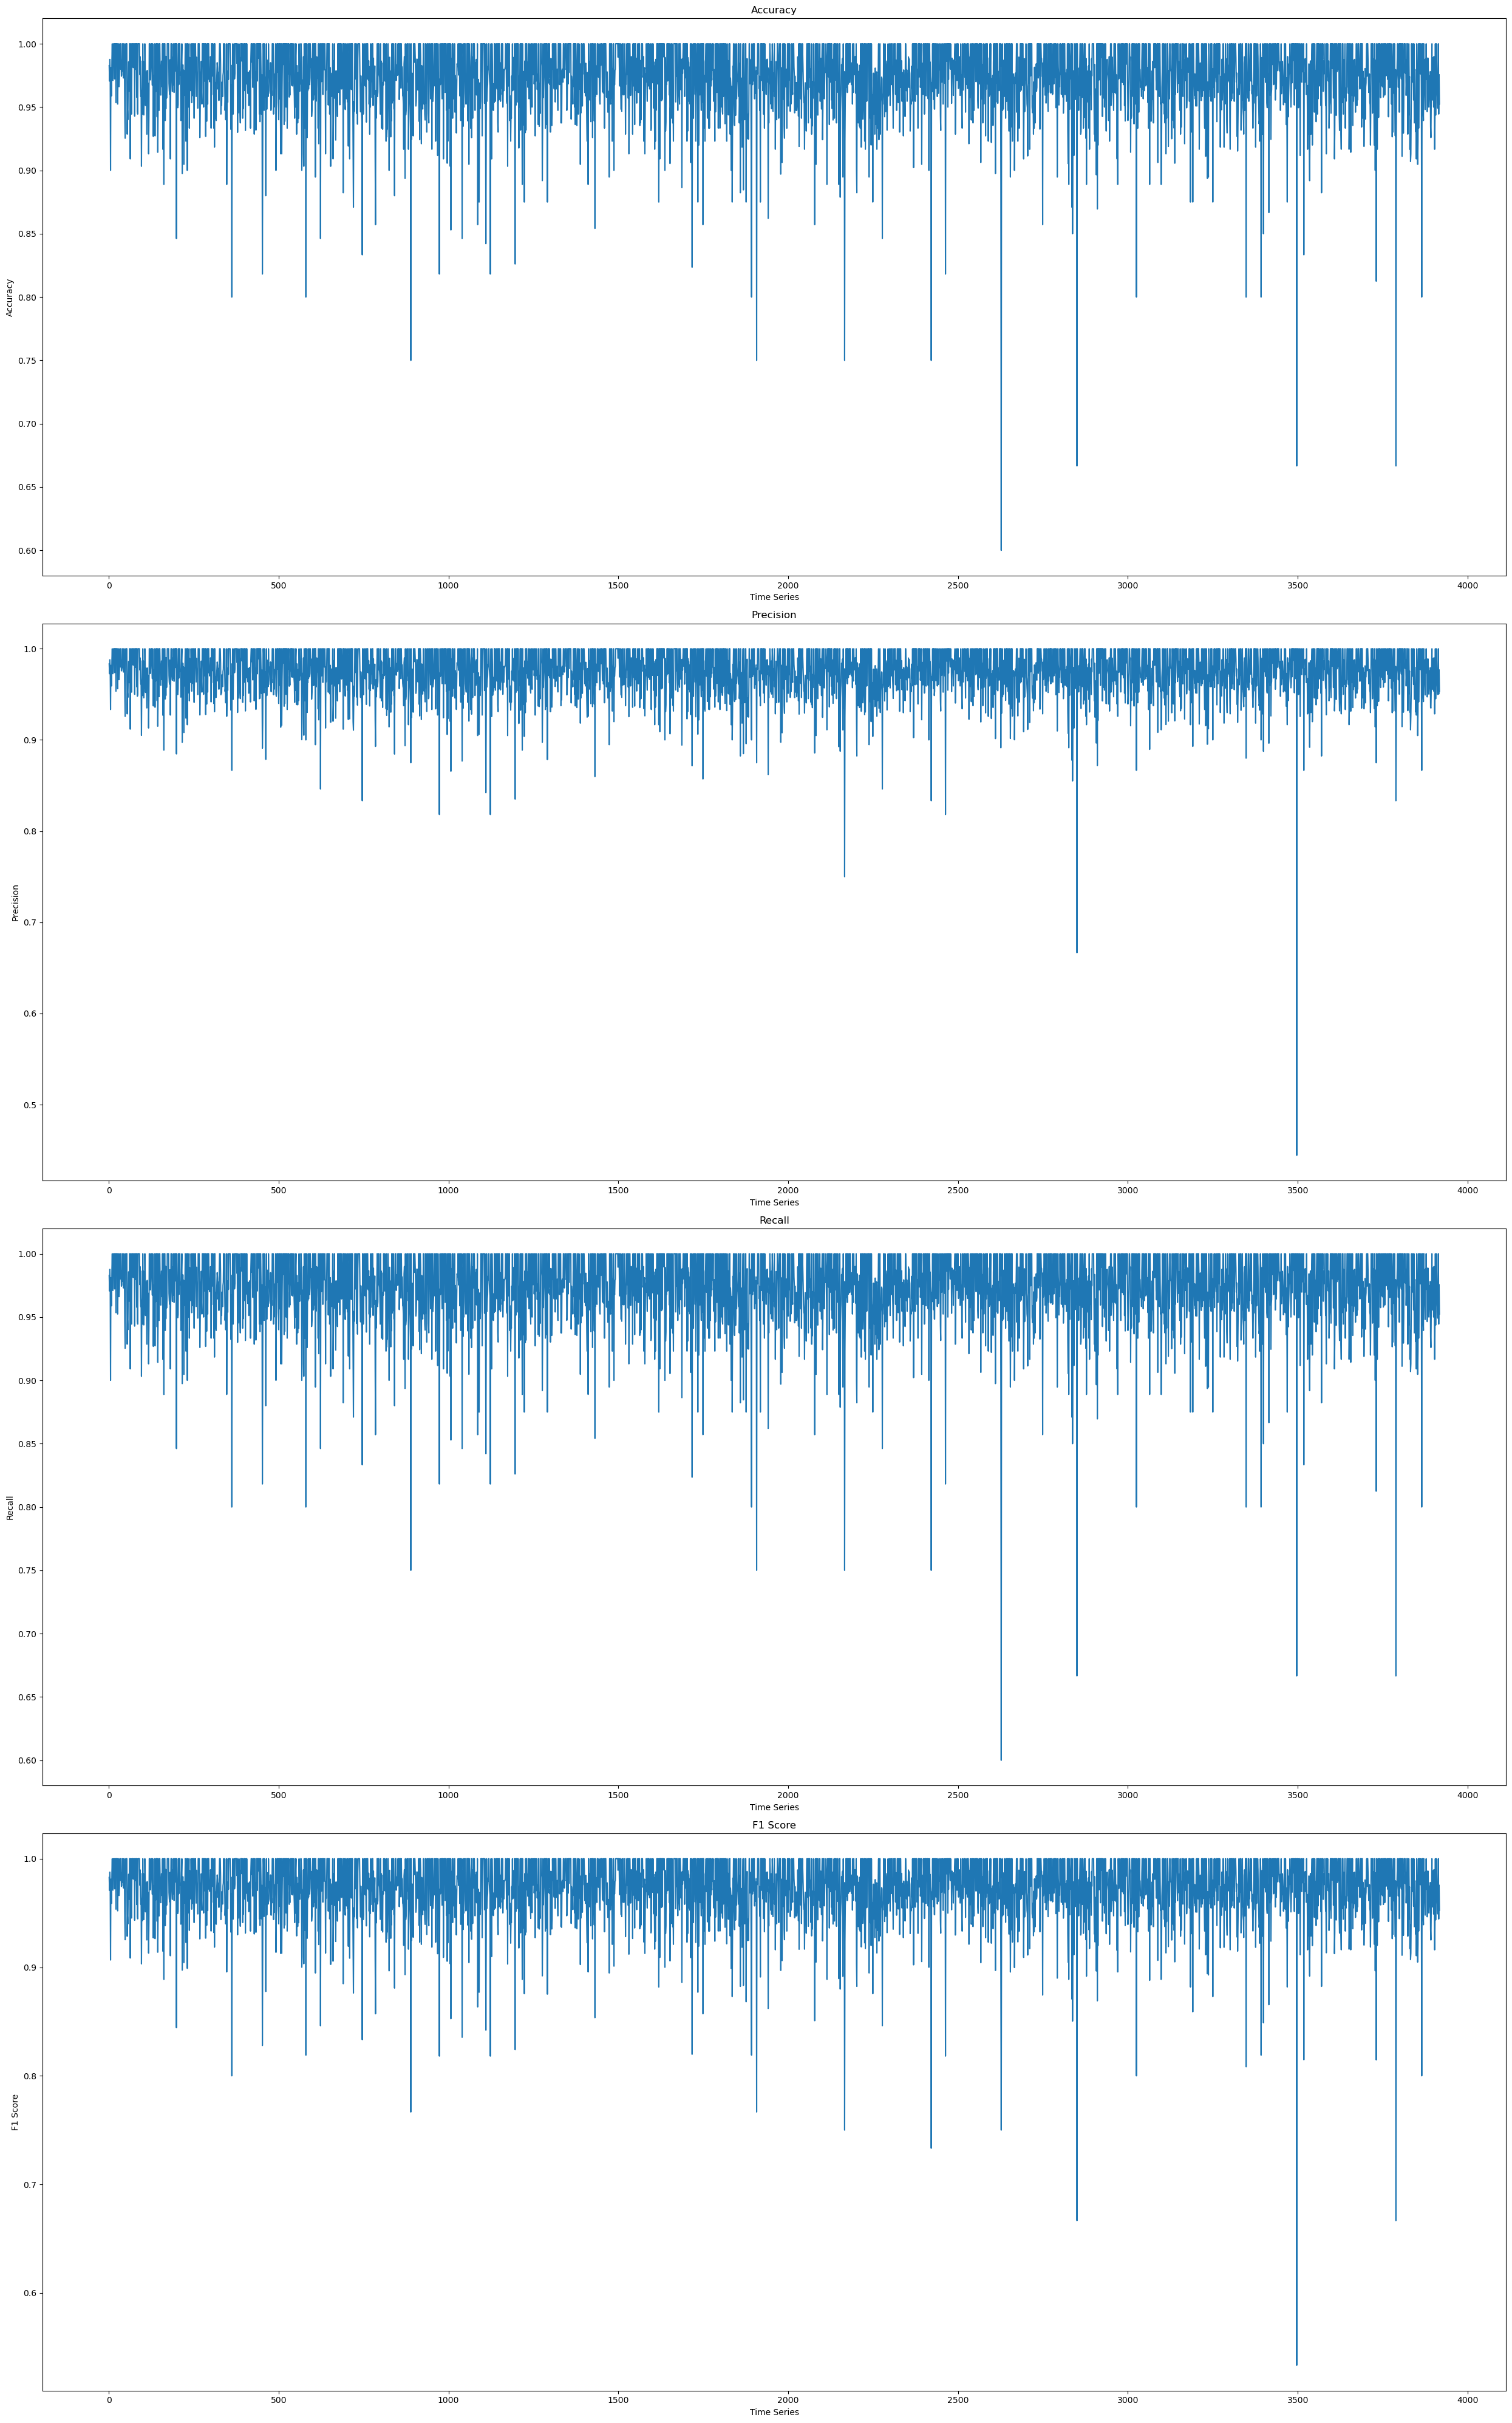

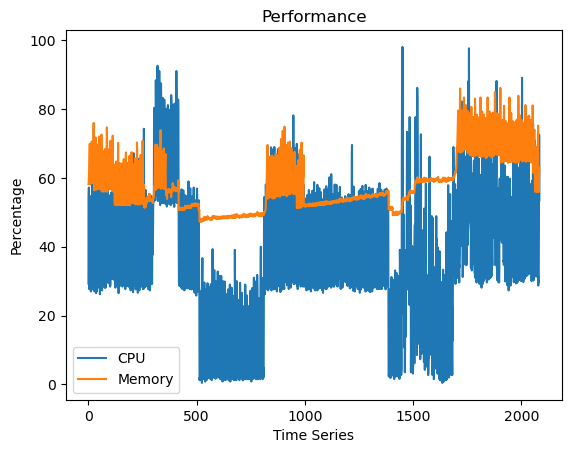

In [2]:
    x_axis = list(range(1, x))
    
    # Store metrics in a table
    metrics_table = pd.DataFrame(result)
    pd.set_option('display.max_rows', None)
    print(metrics_table)

    # Calculate mean, variance, and standard deviation
    mean_accuracy = np.mean(result['accuracy'])
    var_accuracy = np.var(result['accuracy'])
    std_accuracy = np.std(result['accuracy'])

    mean_precision = np.mean(result['precision'])
    var_precision = np.var(result['precision'])
    std_precision = np.std(result['precision'])

    mean_recall = np.mean(result['recall'])
    var_recall = np.var(result['recall'])
    std_recall = np.std(result['recall'])

    mean_f1 = np.mean(result['f1'])
    var_f1 = np.var(result['f1'])
    std_f1 = np.std(result['f1'])

    # Print the calculated values
    print("Accuracy - Mean:", mean_accuracy, "Variance:", var_accuracy, "Standard Deviation:", std_accuracy)
    print("Precision - Mean:", mean_precision, "Variance:", var_precision, "Standard Deviation:", std_precision)
    print("Recall - Mean:", mean_recall, "Variance:", var_recall, "Standard Deviation:", std_recall)
    print("F1-Score - Mean:", mean_f1, "Variance:", var_f1, "Standard Deviation:", std_f1)

    

    # Set the figure size
    #plt.figure(figsize=(25, 10))

    # Accuracy
    #plt.plot(x_axis, result['accuracy'], label="Accuracy")
    #plt.xlabel('Time Series')
    #plt.ylabel('Accuracy')
    #plt.title('Accuracy')


    # F1 Score
    #plt.plot(x_axis, result['f1'], label="F1 Score")
    #plt.xlabel('Time Series')
    #plt.ylabel('F1 Score')
    #plt.title('F1 Score')
    
    # Precision
    #plt.plot(x_axis, result['precision'], label="Precision")
    #plt.xlabel('Time Series')
    #plt.ylabel('Precision')
    #plt.title('Precision')

    # Recall
    #plt.plot(x_axis, result['recall'], label="Recall")
    #plt.xlabel('Time Series')
    #plt.ylabel('Percentage')
    #plt.title('Time Series Graph')
    #plt.legend()
    #plt.show()

    # Set the figure size
    fig, axes = plt.subplots(nrows=4, figsize=(25, 40))

    # Accuracy
    axes[0].plot(x_axis, result['accuracy'])
    axes[0].set_xlabel('Time Series')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy')

    # Precision
    axes[1].plot(x_axis, result['precision'])
    axes[1].set_xlabel('Time Series')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision')

    # Recall
    axes[2].plot(x_axis, result['recall'])
    axes[2].set_xlabel('Time Series')
    axes[2].set_ylabel('Recall')
    axes[2].set_title('Recall')

    # F1 Score
    axes[3].plot(x_axis, result['f1'])
    axes[3].set_xlabel('Time Series')
    axes[3].set_ylabel('F1 Score')
    axes[3].set_title('F1 Score')

    plt.tight_layout()
    plt.show()
    
    x_axis = list(range(1, z))
    plt.plot(x_axis, performance['cpu'], label="CPU")
    plt.plot(x_axis, performance['memory'], label="Memory")
    plt.xlabel('Time Series')
    plt.ylabel('Percentage')
    plt.title('Performance')
    plt.legend()
    plt.show()
    